<a href="https://colab.research.google.com/github/alexistran1/uniswap-data/blob/main/UniswapV2_story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\rule{800pt}{20pt}$

# Imports

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
# plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import os
import time

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.getcwd()

'/content'

In [ ]:
pd.__version__

'2.1.4'

In [ ]:
pd.show_versions()

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:32: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(



INSTALLED VERSIONS
------------------
commit              : a671b5a8bf5dd13fb19f0e88edc679bc9e15c673
python              : 3.10.12.final.0
python-bits         : 64
OS                  : Linux
OS-release          : 6.1.85+
Version             : #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
machine             : x86_64
processor           : x86_64
byteorder           : little
LC_ALL              : en_US.UTF-8
LANG                : en_US.UTF-8
LOCALE              : en_US.UTF-8

pandas              : 2.1.4
numpy               : 1.26.4
pytz                : 2024.2
dateutil            : 2.8.2
setuptools          : 71.0.4
pip                 : 24.1.2
Cython              : 3.0.11
pytest              : 7.4.4
hypothesis          : None
sphinx              : 5.0.2
blosc               : None
feather             : None
xlsxwriter          : None
lxml.etree          : 4.9.4
html5lib            : 1.1
pymysql             : None
psycopg2            : 2.9.9
jinja2              : 3.1.4
IPython    

In [ ]:
images_path = '/content/drive/MyDrive/DSO 545 - Visualization/1. Intro to Panda/Images'

data_dir = '/content/drive/MyDrive/DSO 545 - Visualization/1. Intro to Panda/Data/'

$\rule{800pt}{20pt}$

# A Framework For How To Think About Business Analytics Problems

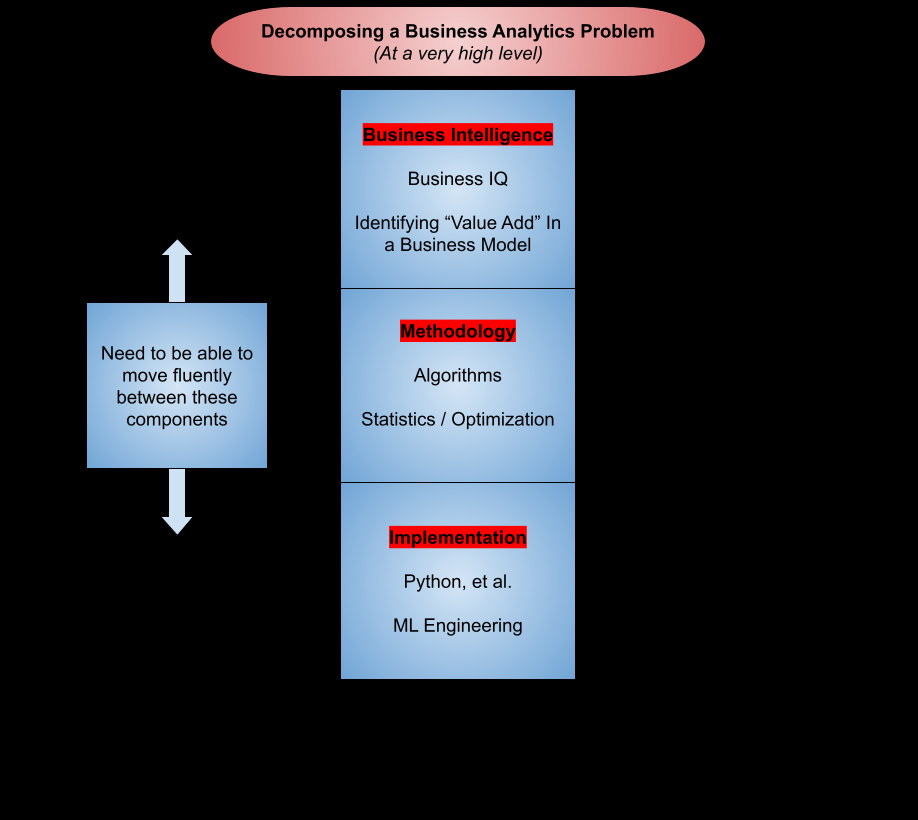

In [ ]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'Outline_for_Decomposing_Analytics_Problems.png'))

$\rule{800pt}{20pt}$

$\rule{800pt}{20pt}$

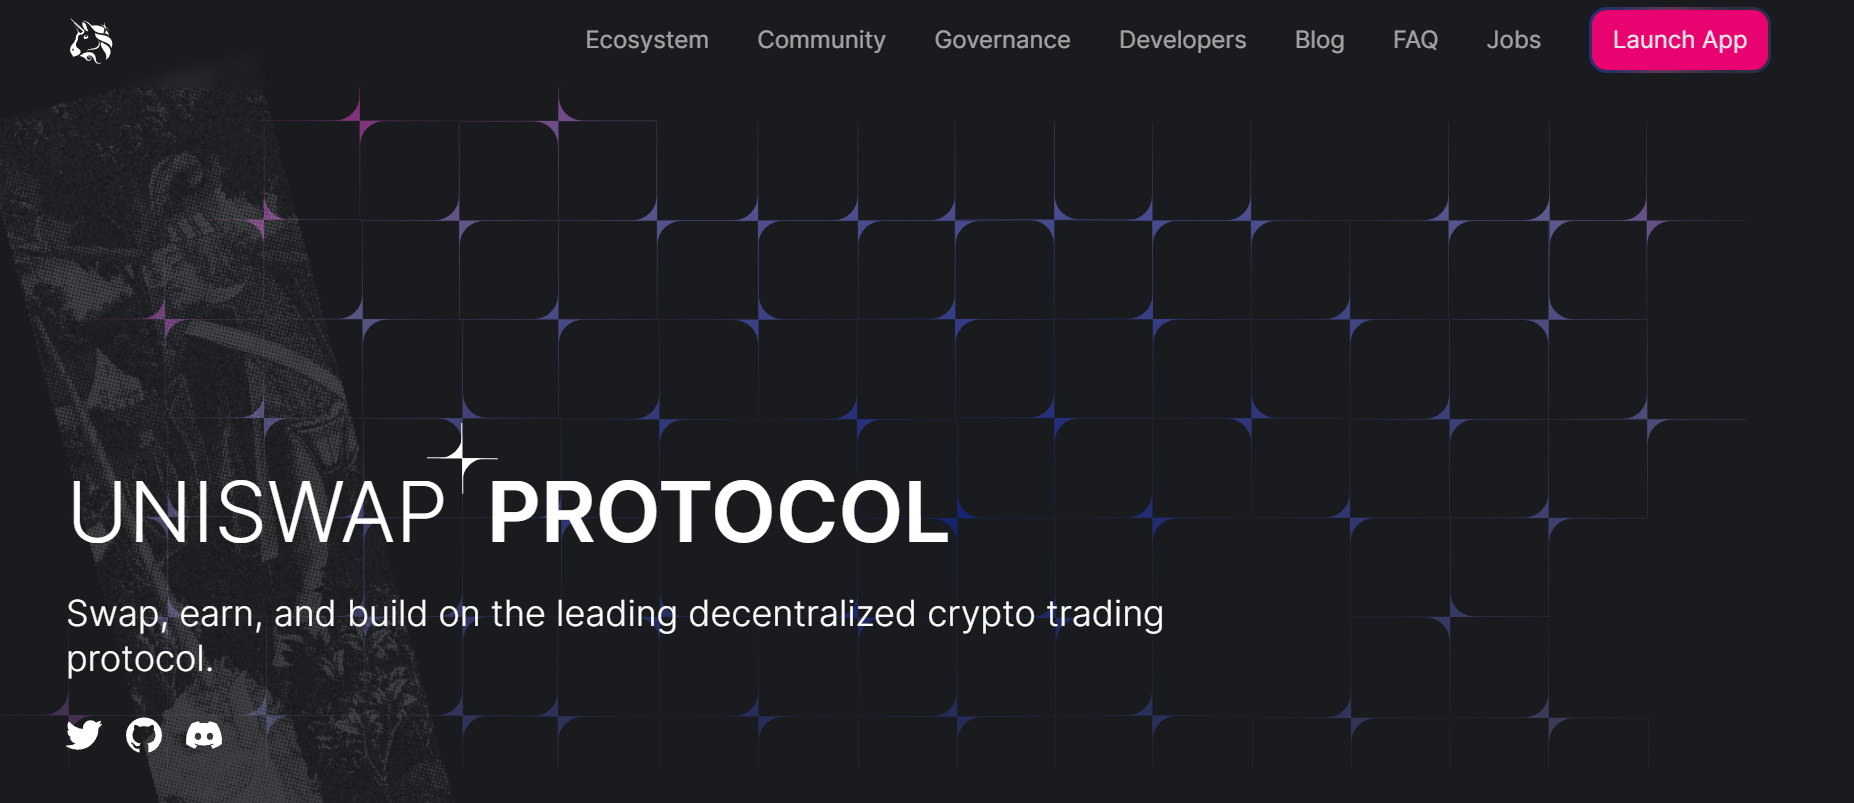

In [ ]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'uniswap_protocol.PNG'))

$\rule{800pt}{20pt}$

<img src="https://cryptorobin.com/wp-content/uploads/2021/06/img-amms-2.jpg">

# Business Objectives
<br>
<font size="+1">
    <ol>
        <li>Familiarize yourself with the datasets.</li>
        <br>
        <li>Understand Uniswap's business model.</li>
        <br>
        <li>Discover stylized facts in the data.</li>
        <br>
        <li>Get more information on Uniswap usage.</li>
        <br>
    </ol>
</font>

$\rule{800pt}{20pt}$

# Read In Data Sets
<br>
<font size="+1">
    <ul>
        <li>We will be working with Uniswap <a href="https://www.covalenthq.com/blog/dandd-uniswap-dataset-announcement/"> datasets</a>. </li>
        <br>
    <li><a href="https://www.covalenthq.com/docs/api/#overview">Covalent's Blockchain API</a> provides access to Uniswap's</li>
        <br>
    <ul>
        <li>transactions,</li>
        <br>
        <li>liquidity,</li>
        <br>
        <li>liquidity providers,</li>
        <br>
        <li>prices,</li>
        <br>
        <li>and more.</li>
        <br>
    </ul>
    <li>Please download the zipped CSV (comma separated values) files and place them in your current working directory.</li>
    </ul>
</font>

In [ ]:
data_dir = '/content/drive/MyDrive/DSO 545 - Visualization/1. Intro to Panda/Data/'

## Read CSV
<br>
<font size="+1">
    <ul>
<li>Now that we know which files we want to investigate, lets read one of the files and explore.</li>
<br>
    </ul>
</font>

### Uniswap Liquidity Actions
<br>
<font size="+1">
    <ul>
        <li>Burn and Mint refers to the process of destroying (burning) and creating (minting) tokens or coins, and there exists a desired "Burn and Mint Equilibrium" which is a token economic structure used by certain crypto networks.</li>
<br>
<li>The actions of burning and minting are considered <b>LIQUIDITY ACTIONS</b>, and are performed by liquidity providers.</li>
        <br>
    </ul>
</font>

In [ ]:
burn_mint = pd.read_csv(os.path.join(data_dir, "BurnMint.csv"))

### Uniswap Trades
<br>
<font size="+1">
    <ul>
        <li>A swap action is performed by a <b>TRADER</b>, where one coin is traded for another.</li>
        <br>
    </ul>
</font>

In [ ]:
swaps = pd.read_csv(os.path.join(data_dir, "Swaps.csv"))

### Uniswap Pool Token Holders
<br>
<font size="+1">
<ul>
    <li>DAI = a stablecoin cryptocurrency which aims to keep its value as close to one United States dollar as possible through an automated system of smart contracts on the Ethereum blockchain</li>
    <br>
    <li>ETH =  a decentralized, open-source blockchain with smart contract functionality; Ether is the native cryptocurrency of the platform</li>
    <br>
    <li>USDT = Tether is a cryptocurrency with tokens issued by Tether Limited, and is called a stablecoin because it was originally designed to always be worth \$1.00, maintaining \$1.00 in reserves for each tether issued</li>
    <br>
    <li>UNI = Uniswap is an Ethereum token that powers Uniswap, an automated liquidity provider that's designed to make it easy to exchange Ethereum tokens</li>
    <br>
    <li> USDC = USD Coin is a digital stablecoin that is pegged to the United States dollar and runs on the Ethereum blockchain</li>
    <br>
    <li>WBTC = stands for Wrapped Bitcoin and is simply an ERC-20 token that represents Bitcoin</li>
</ul>
<br>
<br>
<ul style="color:dodgerblue">
    <font color="dodgerblue"><li>The data contains single liquidity provider and their share of the liquidity pools for the following 5 pools, as of block height 11,100,000. </li>
    <br>
    <li>We should further note this data set has no time dimension, it is a snapshot at the end of our other two data sets.</li></font>
    <br>
    </ul>
</font>

$\square$

In [ ]:
dai_eth = pd.read_csv(os.path.join(data_dir, "DAI-ETH.csv"))
eth_usdt = pd.read_csv(os.path.join(data_dir, "ETH-USDT.csv"))
uni_eth = pd.read_csv(os.path.join(data_dir, "UNI-ETH.csv"))
usdc_eth = pd.read_csv(os.path.join(data_dir, "USDC-ETH.csv"))
wbtc_eth = pd.read_csv(os.path.join(data_dir, "WBTC-ETH.csv"))

$\rule{800pt}{20pt}$

## Clean Data Frames
<br>
<font size="+1">
    <ul>
        <li>We will organize the cleaning we did in the previous notebook.</li>
        <br>
    </ul>
</font>

In [ ]:
pools = [dai_eth, eth_usdt, uni_eth, usdc_eth, wbtc_eth]
pools_str = ['dai_eth', 'usdt_eth', 'uni_eth', 'usdc_eth', 'wbtc_eth']

In [ ]:
burn_mint.loc[:,'LOGGED_AMOUNT0'] = burn_mint.loc[:,'LOGGED_AMOUNT0'].astype(float) / np.power(10, burn_mint.loc[:,'TOKEN_0_DECIMALS'])
burn_mint.loc[:,'LOGGED_AMOUNT1'] = burn_mint.loc[:,'LOGGED_AMOUNT1'].astype(float) / np.power(10, burn_mint.loc[:,'TOKEN_1_DECIMALS'])

burn_mint.loc[:, 'BLOCK_SIGNED_AT'] = pd.to_datetime(burn_mint.loc[:, 'BLOCK_SIGNED_AT'])
burn_mint.loc[:,'BLOCK_SIGNED_AT_DAY'] = pd.to_datetime(pd.to_datetime(burn_mint.loc[:, 'BLOCK_SIGNED_AT']).dt.date)
burn_mint.loc[:,'token_pairs'] = burn_mint.loc[:,'TOKEN_0_TICKER_SYMBOL'] + "_" + burn_mint.loc[:,'TOKEN_1_TICKER_SYMBOL']

swaps.loc[:, 'AMOUNT0_IN'] = swaps.loc[:,'AMOUNT0_IN'].astype(float) /  np.power(10, swaps.loc[:,'TOKEN_0_DECIMALS'])
swaps.loc[:, 'AMOUNT0_OUT'] = swaps.loc[:,'AMOUNT0_OUT'].astype(float) /  np.power(10, swaps.loc[:,'TOKEN_0_DECIMALS'])
swaps.loc[:, 'AMOUNT1_IN'] = swaps.loc[:,'AMOUNT1_IN'].astype(float) /  np.power(10, swaps.loc[:,'TOKEN_1_DECIMALS'])
swaps.loc[:, 'AMOUNT1_OUT'] = swaps.loc[:,'AMOUNT1_OUT'].astype(float) /  np.power(10, swaps.loc[:,'TOKEN_1_DECIMALS'])

swaps.loc[:, 'BLOCK_SIGNED_AT'] = pd.to_datetime(swaps.loc[:, 'BLOCK_SIGNED_AT'])
swaps.loc[:,'BLOCK_SIGNED_AT_DAY'] = pd.to_datetime(pd.to_datetime(swaps.loc[:, 'BLOCK_SIGNED_AT']).dt.date)
swaps.loc[:,'token_pairs'] = swaps.loc[:,'TOKEN_0_TICKER_SYMBOL'] + "_" + swaps.loc[:,'TOKEN_1_TICKER_SYMBOL']

for pool in pools:
    pool.loc[:, 'BAL/TOT_SUP'] = pool['BALANCE'].astype(float) / pool['TOTAL_SUPPLY'].astype(float)
    pool.loc[:, 'BALANCE'] = pool.loc[:,'BALANCE'].astype(float) /  np.power(10, pool.loc[:,'CONTRACT_DECIMALS'])
    pool.loc[:, 'TOTAL_SUPPLY'] = pool.loc[:,'TOTAL_SUPPLY'].astype(float) /  np.power(10, pool.loc[:,'CONTRACT_DECIMALS'])


$\rule{800pt}{20pt}$

# Uniswap v2 Pool Descriptions
<br>
<font size="+1">
    <ul>
        <li>What are the microstructure mechanisms in these exchanges (automated markets)?</li>
        <br>
    </ul>
</font>

## Liquidity Providers
<br>

<img src="https://docs.uniswap.org/assets/images/lp-c0b1b03ef921f1325971fa8ab6e9a4f1.jpg" width="800" height="500" align="center"/>

## Traders
<br>

<img src="https://docs.uniswap.org/assets/images/trade-b19a05be2c43a62708ab498766dc6d13.jpg" width="800" height="500" align="center"/>

## Transaction Facilitation Mechanism Between LPs and Traders

<img src="https://docs.uniswap.org/assets/images/anatomy-d22fb7ab46013a1195f086ee672468c7.jpg" align="center"/>

$\rule{800pt}{20pt}$

# <a href="https://www.openblocklabs.com/research/driving-on-chain-liquidity-and-volume">Driving On-Chain Liquidity and Volume</a>

- Let's try to understand Uniswap from a platform perspective.

- Consider how the value of a platform increases with each additional user on that platform.

  - This is known as the <b>network effect</b>.

- Any decentralized finance (DeFi) ecosystem can be thought of as a <b>platform</b>, and so the <b>network effect</b> is of first-order importance.

- In order to maximize the network effect, it is important to have a <b>data-informed growth architecture</b> that concentrates on

  - user acquisition,

  - amplification of trading volume, and

  - liquidity augmentation

- An example of such a growth architecture is below.


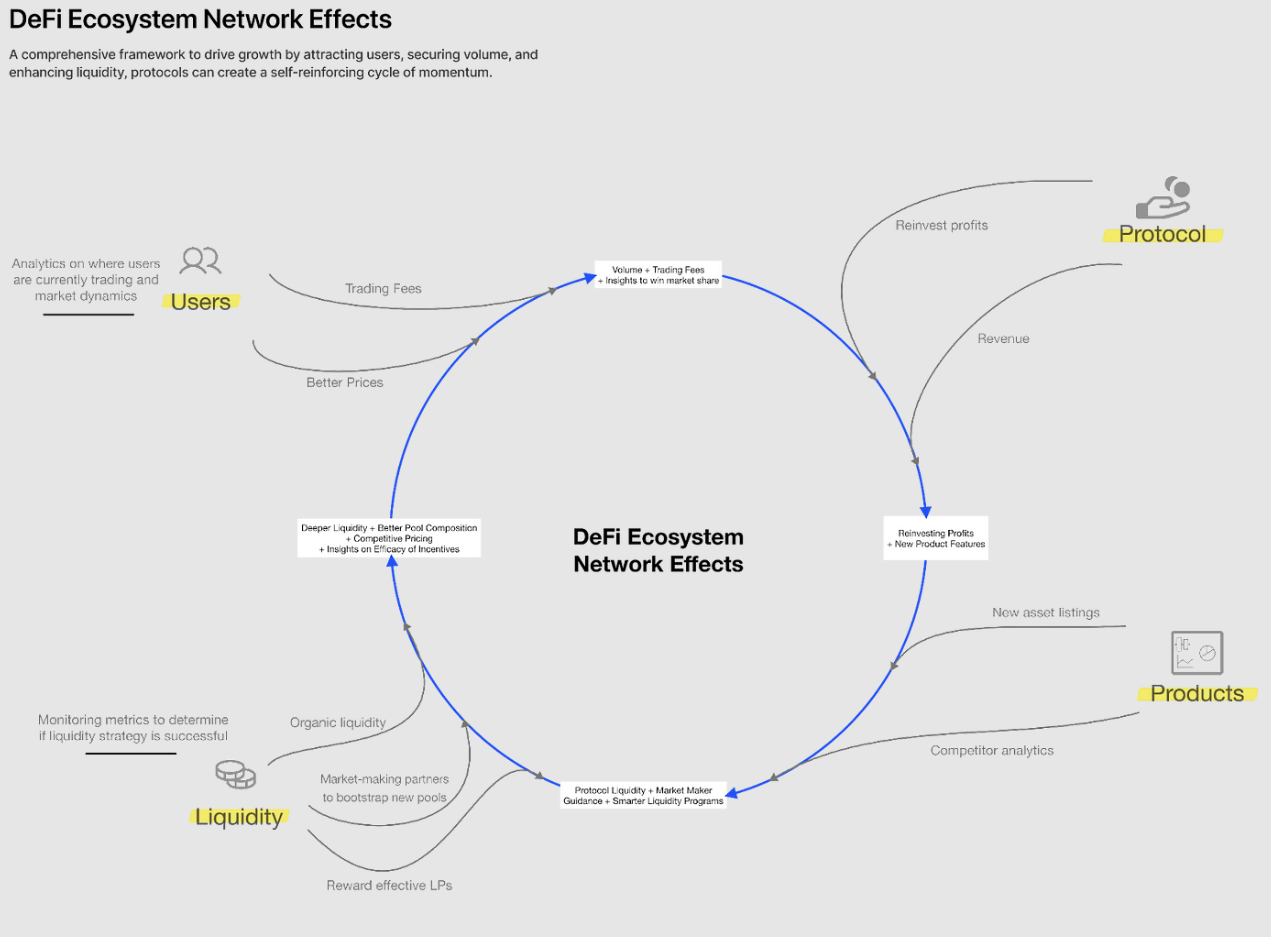

In [ ]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'on_chain_growth_1.png'))

## Securing Volume through Competitive Pricing

- In order to increase the market share of volume, you need to be able to analyze metrics across your protocol and competitors' platforms (DEXs and CEXs) such as:

  - trading pair data,

  - slippage,

  - pricing structures,

  - pool composition,

  - etc.

- Attracting and retaining users in the competitive DeFi landscape is closely tied to competitive pricing.

  - Users are increasingly price-sensitive and cost-aware, therefore they're naturally attracted to platforms that optimize their returns and decrease any transaction costs.

- <b>PROBLEM:</b> A token issuer should be able to provide deeper liquidity on DEXs on their own protocol, but this is not what we empirically observe.

  - Consider the trading volume of Optimism, a layer 2 solution, where we see centralized exchanges have higher trading volume than DEXs.

  - This shouldn't happen.

  - How can a DEX pull liquidity from centralized off-chain exchanges?

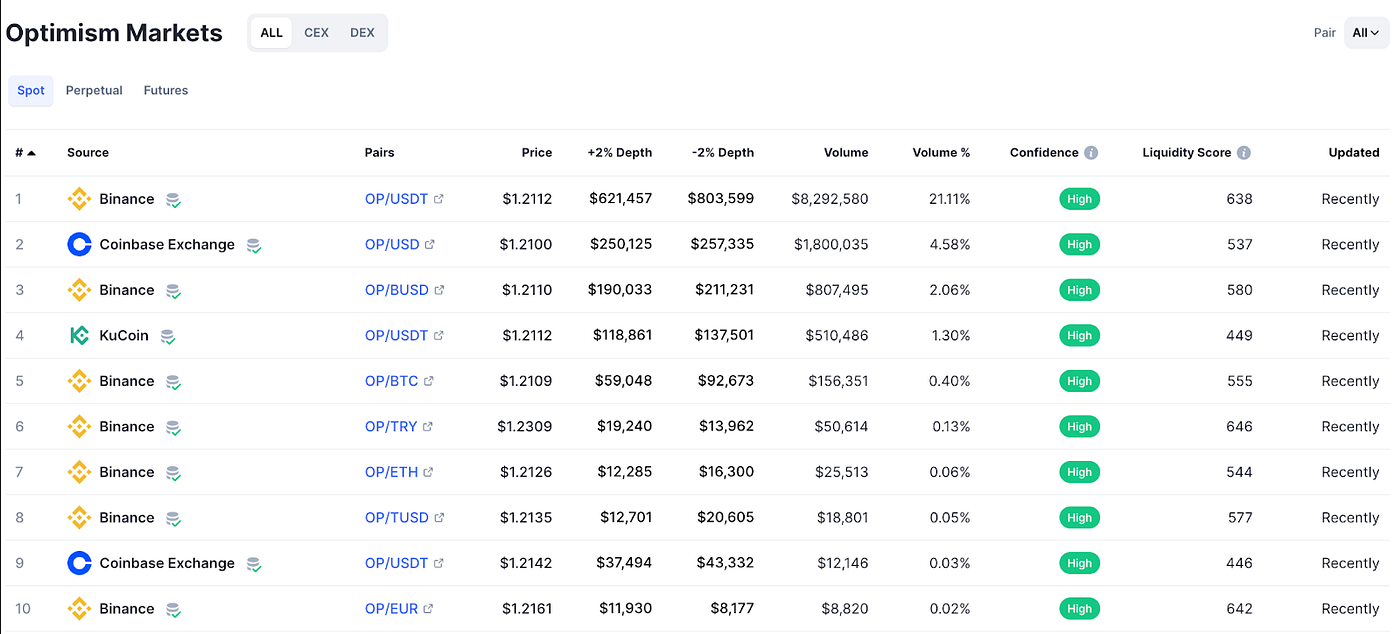

In [ ]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'on_chain_growth_problem_1.png'))

- One hopes they can stimulate a robust on-chain ecosystem by setting in motion a domino effect of engaging more lending/borrowing activities on-chain.

- The goal is to trigger a cascade of active engagements, such as

  - lending/borrowing, and
  
  - on-chain perpetual DEX trading, thereby fueling the on-chain economy.

---
---

- We see the same problem with Uniswap, despite it having one of the most sophisticated DEXs globally.

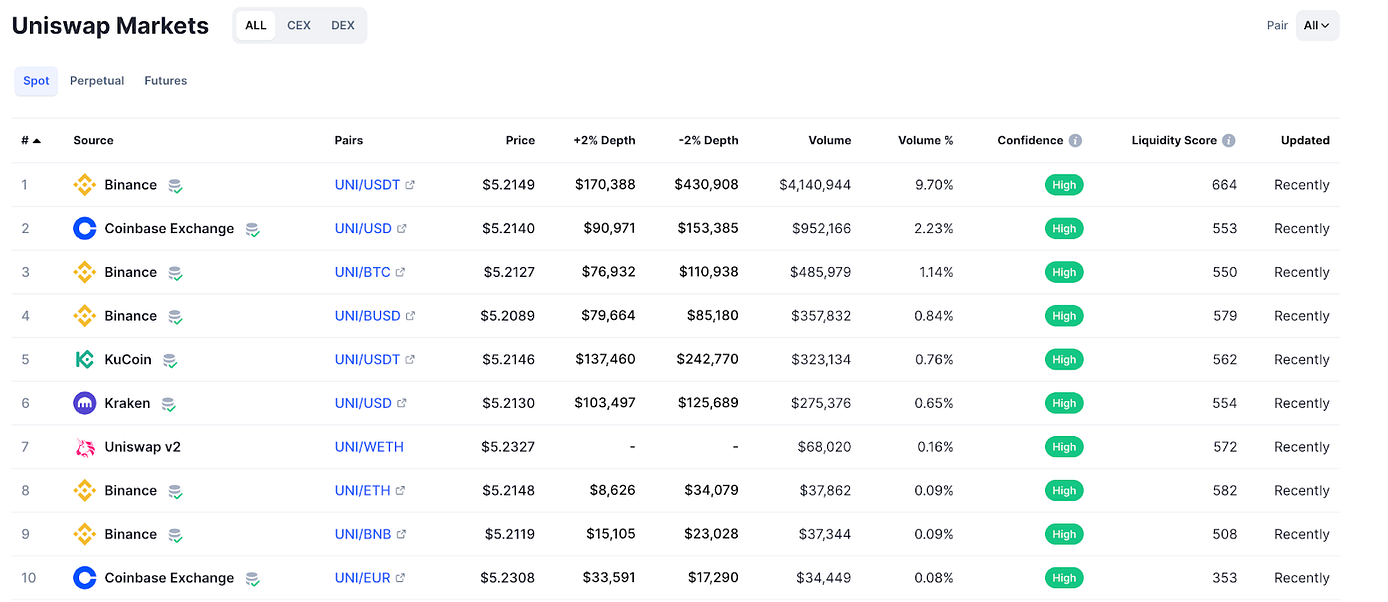

In [ ]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'on_chain_growth_problem_2.png'))

## Potential for a Shift from CEX Dominance to DEX Dominance

- What are the competitive dynamics between DEX liquidity and CEX liquidity?

  - We hope that answering this question will help in strategizing incentivization mechanisms aimed at enhancing the attractiveness and efficiency of DEXs.
  
  - The ultimate goal is to ensure that DEXs offer trade execution for various trade sizes that is as good as, if not better than, CEX execution.

---
---

There are a number of reasons why CEXs are out-competing DEXs:

  1. <b>Liquidity and Slippage:</b> CEXs often have higher liquidity and less price slippage due to larger user bases and order books.
  
    - This results in more efficient markets and better trading experiences.
    
    - DEXs and Layer 1/Layer 2 solutions should focus on incentivization strategies to attract more liquidity providers.

  2. <b>User Experience and Usability:</b> CEXs often provide a more user-friendly interface, which is crucial for new users who are not fully acquainted with blockchain technology.
  
    - They offer simpler processes for account setup, trading, and managing assets.
    
    - To compete, DEXs and Layer 1/Layer 2 protocols need to invest in improving user interface and experience, making onboarding and navigation as seamless as possible.

  3. <b>Speed and Scalability:</b> High-frequency trading is more viable on CEXs due to faster transaction times and the ability to handle large transaction volumes.
  
    - DEXs, especially those on Layer 1, often struggle with congestion and high gas fees.
    
    - Layer 2 solutions and other scaling techniques should be implemented to enhance transaction speed and capacity on DEXs.

  4. <b>Customer Support:</b> CEXs usually have dedicated customer service teams, which provide immediate help when users encounter issues.
  
    - DEXs, being decentralized, often lack this support.
    
    - While it might be challenging to provide traditional customer support on DEXs, they can establish robust online communities and resources to assist users and address their queries and concerns promptly.

  5. <b>Regulatory Compliance and Trust:</b> CEXs are typically regulated and must comply with KYC/AML laws, which can inspire trust among certain user groups.
  
    - While the anonymity of DEXs is attractive to some, it can also be a barrier for others.
    
    - DEXs could work towards establishing a balance between user privacy and regulatory compliance to attract a broader user base.

---
---

- How might this challenge be tackled?

  - Token issuers can effectively leverage their unique position to improve pricing dynamics by driving deeper liquidity through <b>incentives</b>.
  
    - the mounting regulatory pressures that are eroding the traditional strongholds of leading centralized exchanges, such as Binance and Coinbase,
    
    - the emergence of faster, more scalable blockchain technologies, highlighted by the ongoing Layer 2 wars,
    
    - the recent thrust toward enhancing user experience, with initiatives such as Uniswap's mobile application, — paint a promising picture.

---
---    

## Deeper Liquidity for Better Prices

- A platform's competitiveness comes from its ability to facilitate transactions, which relies on depth and concentration of its liquidity.

  - Superior liquidity is a well-optimized and concentrated collection of assets that ensures reduced slippage and more efficient transactions, it is not just a large quantity.

- A large quantity of volume, if not properly structured, can still lead to an inefficient trading experience.

  - For example, if the majority of liquidity is in positions that are away from where people want to trade, then transaction costs (<i>price impact / slippage</i>) can increase, resulting in less competitive prices.


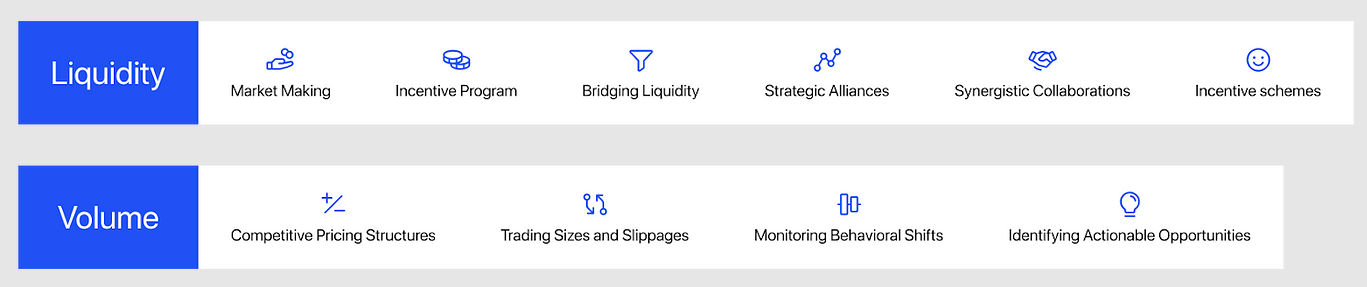

In [ ]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'on_chain_growth_2.png'))

$\rule{800pt}{20pt}$

$\rule{800pt}{20pt}$

# Some Thoughts

## What's the story?
<br>
<font size="+1">
    <ul>
        <li>As we go through these various summary statistics, we should, ideally, be crafting a story of what we can take away from the data.</li>
<br>
<li>Remember, analytics is meant to deliver insight to a practical problem, not just produce an abundance of charts and graphs.</li>
        <br>
        <li>We have to motivate why we're looking at a table or chart, and more importantly, what can we take away or infer from the data.</li>
<br>
        <li>To be honest, often times when we explore data, we are just looking around without precise things questions we're investigating. The precise questions come when we find something interesting and try to understand the observation.</li>
        <br>
    </ul>
</font>


## Always consider the units.
<br>
<font size="+1">
    <ul>
        <li>When investigating some measurement, or constructing a measure, a good practice is to consider the units of the measurement.</li>
        <br>
        <li>This provides clarity as to what you're doing, as well as how that measurement can be used in other contexts.</li>
        <br>
    </ul>
</font>

$\rule{800pt}{20pt}$

# Data Exploration - Univariate and Multivariate Analysis
<br>
<font size="+1">
<ul>
    <li>This is a, somewhat disparate, collection of stylized facts about Uniswap v2 DEX.</li>
    <br>
    <li>When initially learning about some phenomenon, or exploring new data, it is good practice to do some exploration without too rigid constraints into what you're investigating.</li>
    <br>
    <li>You'll be surprised what you might find and the puzzles you can discover.</li>
    <br>
    <font color="red"><li style="color:red">Be sure you are constantly digging in the data, and constantly questioning your findings along the way!</li></font>
    <br>
</ul>
</font>

$\rule{800pt}{20pt}$

## An Aside: What is Univariate Analysis?

<br>
<font size="+1">
  <ul>
    <li>Consider a variable $Y$, in isolation from other variables.</li>
    <br>
    <li>Univariate analyis is concerned with all things related to the probability distribution of $Y$, i.e. $\mathbb{P}(\#_1 \leq Y \leq \#_2)$.</li>
    <br>
    <li>This includes summary statistics such as: mean, median, standard deviation and variance, skewness, kurtosis, percentiles/quantiles, outliers, autocorrelations, etc.</li>
    <br>
    <li>Testing for normality using statistics like skewness and kurtosis or graphical methods like Q-Q plots, as well as more formal hypothesis tests like the <a href="https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test">KS-test</a>.</li>
    <br>
    <li>Transforming variables using functions like log transforms, standardization, or <a href="https://en.wikipedia.org/wiki/Power_transform#Box%E2%80%93Cox_transformation">Box-Cox / power transformations</a>. This can make non-normal data more normal.</li>
    <br>
    <li>Formal hypothesis tests that compare means of samples to a population hypothesis.</li>
    <br>
    <li>etc.</li>
    <br>
  </ul>
</font>

$\square$

## An Aside: What is Multivariate Analysis?

<br>
<font size="+1">
  <ul>
    <li>Consider multiple variables $(X_1, X_2, \dots, X_p, Y)$, jointly.</li>
    <br>
    <li>Multivariate analyis is concerned with all things related to the joint probability distribution of $(X_1, X_2, \dots, X_p, Y)$, i.e. $\mathbb{P}(X_1 \leq \#_1, \ X_2 \leq \#_2, \ \dots, \ X_p \leq \#_p, \ Y \leq \#_y)$.</li>
    <br>
    <li>This includes summary statistics such as: joint mean, covariance / correlation matrices, etc.</li>
    <br>
    <li>The analysis of principal components (PCA), factors, or group-wise clustering patters.</li>
    <br>
    <li>As well as analyzing scatterplots, using regression analysis to test hypotheses, and to make predictions.</li>
    <br>
    <li>etc.</li>
    <br>
  </ul>
</font>

$\square$

$\rule{800pt}{20pt}$

## What's the percentage of different liquidity actions on the Uniswap DEX?
<br>
<font size="+1">
    <ul>
        <li>Recall a liquidity action is a <i>burn</i> or a <i>mint</i>.</li>
        <br>
    </ul>
</font>

<Axes: title={'center': 'TITLE'}, xlabel='EVENT_TYPE'>

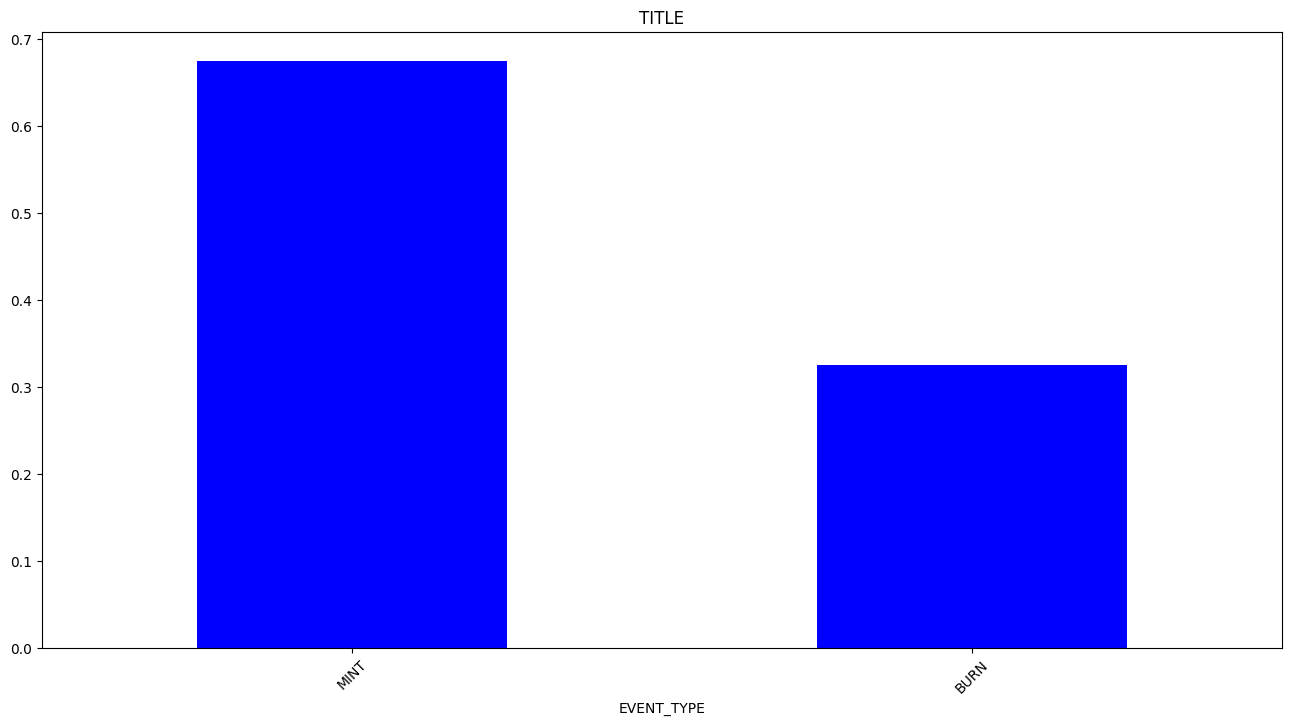

In [ ]:
(burn_mint['EVENT_TYPE'].value_counts() / burn_mint.shape[0]).plot(kind='bar',
                                                                   figsize=(16,8),
                                                                   color="blue",
                                                                   rot=45,
                                                                   title='TITLE')
# value_counts: count the number of times that each category happens in the sample
# burn_mint['EVENT_TYPE'].value_counts(normalize=True)
# need to know simple .plot for midterm
# if you dont say what kind of plot you want, a line plot is default
# kind = 'barh' gives a horizontal bar plot
# rot = rotate the x-axis labels 45 degrees


<br>
<font size="+1">
    <ul>
        <font color="red"><li style="color:red">What do we observe?</li></font>
        <br>
        <ul>
            <li>LPs were more interested in supplying liquidity rather than removing it.</li>
            <br>
            <li>Why?</li>
            <br>
            <li>Were they earning money and were acting rational? Or were they losing money, and acting foolishly?</li>
            <br>
        </ul>
    </ul>
</font>

$\rule{800pt}{20pt}$

## For every market, what's the percentage of burns, mints, and swaps on the Uniswap DEX?
<br>
<font size="+1">
    <ul>
        <li>How can we interpret this question?</li>
        <br>
        <ul>
            <li>What are some different ways to answer your interpretation?</li>
            <br>
            <li>The big question is what to put in the denominator of the percentage!</li>
            <br>
        </ul>
        <li>For the sake of concreteness, we would like to determine the percentage of burns per market (out of all burns), the percentage of mints per market (out of all mints), and the percentage of swaps per market (out of all swaps).</li>
        <br>
    </ul>
</font>

In [ ]:
burn_mint.head(5)

BLOCK_HEIGHT            BLOCK_SIGNED_AT EVENT_TYPE LOGGED_AMOUNT0  \
0      10020001  2020-05-07 22:47:25+00:00       BURN       0.003262   
1      10022981  2020-05-08 09:43:59+00:00       BURN       0.014189   
2      10053453  2020-05-13 03:18:50+00:00       BURN       0.781284   
3      10060873  2020-05-14 06:48:21+00:00       BURN       0.995309   
4      10064415  2020-05-14 19:58:48+00:00       BURN       0.010197   

  LOGGED_AMOUNT1                                POOL_ADDRESS  POOL_DECIMALS  \
0       0.000016  0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc             18   
1        0.00007  0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc             18   
2       0.006539  0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc             18   
3       0.004114  0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc             18   
4        0.00005  0xa478c2975ab1ea89e8196811f51a7b7ade33eb11             18   

    POOL_NAME POOL_TICKER_SYMBOL                                     TOKEN_0  \
0  Uniswap V2             UNI-V2  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
1  Uniswap V2             UNI-V2  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
2  Uniswap V2             UNI-V2  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
3  Uniswap V2             UNI-V2  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
4  Uniswap V2             UNI-V2  0x6b175474e89094c44da98b954eedeac495271d0f   

   TOKEN_0_DECIMALS    TOKEN_0_NAME TOKEN_0_TICKER_SYMBOL  \
0                 6        USD Coin                  USDC   
1                 6        USD Coin                  USDC   
2                 6        USD Coin                  USDC   
3                 6        USD Coin                  USDC   
4                18  Dai Stablecoin                   DAI   

                                      TOKEN_1  TOKEN_1_DECIMALS  \
0  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2                18   
1  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2                18   
2  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2                18   
3  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2                18   
4  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2                18   

    TOKEN_1_NAME TOKEN_1_TICKER_SYMBOL  \
0  Wrapped Ether                  WETH   
1  Wrapped Ether                  WETH   
2  Wrapped Ether                  WETH   
3  Wrapped Ether                  WETH   
4  Wrapped Ether                  WETH   

                                             TX_HASH BLOCK_SIGNED_AT_DAY  \
0  0x4113cf142204202124affdbf911b28fcb78ea5bd853e...          2020-05-07   
1  0xf390b8084310b213bc922244206b98558e09c1c1c78e...          2020-05-08   
2  0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...          2020-05-13   
3  0x21047e47b1c3c92d6acb0e642773d5ca6542becf7e8e...          2020-05-14   
4  0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...          2020-05-14   

  token_pairs  
0   USDC_WETH  
1   USDC_WETH  
2   USDC_WETH  
3   USDC_WETH  
4    DAI_WETH

In [ ]:
# Technique 1

burn_mint.groupby(['token_pairs', 'EVENT_TYPE'])\
['EVENT_TYPE']\
.apply(len)\
.unstack(level='EVENT_TYPE')

#for each, for every, per group = group bys

EVENT_TYPE    BURN   MINT
token_pairs              
DAI_WETH     11672  26449
UNI_WETH      6263  14513
USDC_WETH     9669  17663
WBTC_WETH     5169  13247
WETH_USDT    14265  25725

In [ ]:
# Technique 2

burn_mint.groupby(['token_pairs'])\
['EVENT_TYPE']\
.value_counts()\
.unstack(level='EVENT_TYPE')

EVENT_TYPE    BURN   MINT
token_pairs              
DAI_WETH     11672  26449
UNI_WETH      6263  14513
USDC_WETH     9669  17663
WBTC_WETH     5169  13247
WETH_USDT    14265  25725

In [ ]:
# Technique 3 - not advised

burn_mint.pivot_table(index=['token_pairs'],
                     columns=['EVENT_TYPE'],
                     values=['BLOCK_HEIGHT'],
                     aggfunc=len)\
         .astype(int)

BLOCK_HEIGHT       
EVENT_TYPE          BURN   MINT
token_pairs                    
DAI_WETH           11672  26449
UNI_WETH            6263  14513
USDC_WETH           9669  17663
WBTC_WETH           5169  13247
WETH_USDT          14265  25725

In [ ]:
# What's the total number of burns and mints?

burn_mint.groupby(['token_pairs', 'EVENT_TYPE'])\
['EVENT_TYPE']\
.apply(len)\
.unstack()\
.sum()

EVENT_TYPE
BURN    47038
MINT    97597
dtype: int64

In [ ]:
# What's the percentage of burns and mints, per market, out of all liquidity actions?

# ((burn_mint.groupby(['token_pairs'])\
# ['EVENT_TYPE']\
# .value_counts())\
# / (burn_mint.shape[0]))\
# .unstack(level='EVENT_TYPE')

((burn_mint.groupby(['token_pairs'])\
['EVENT_TYPE']\
.value_counts()\
 .unstack(level='EVENT_TYPE'))\
/ (burn_mint['EVENT_TYPE'].value_counts()))

EVENT_TYPE       BURN      MINT
token_pairs                    
DAI_WETH     0.248140  0.271002
UNI_WETH     0.133148  0.148703
USDC_WETH    0.205557  0.180979
WBTC_WETH    0.109890  0.135732
WETH_USDT    0.303265  0.263584

In [ ]:
# Assign the statistics to a variable

#.get_group(('DAI_WETH', 'BURN'))
burn_mint_token_pair_percentage = \
((burn_mint.groupby(['token_pairs'])\
['EVENT_TYPE']\
.value_counts()\
 .unstack(level='EVENT_TYPE'))\
/ (burn_mint['EVENT_TYPE'].value_counts()))

In [ ]:
swaps_token_pair_percentage = \
(swaps.groupby(['token_pairs'])['EVENT_TYPE'].value_counts() / \
(swaps.shape[0]))\
.unstack(level='EVENT_TYPE')

In [ ]:
# Concatenate the liquidity maker/taker statistics

burn_mint_swap_token_pair_percentage = \
pd.concat([burn_mint_token_pair_percentage, swaps_token_pair_percentage], axis=1)

burn_mint_swap_token_pair_percentage

EVENT_TYPE       BURN      MINT      SWAP
token_pairs                              
DAI_WETH     0.248140  0.271002  0.178260
UNI_WETH     0.133148  0.148703  0.131323
USDC_WETH    0.205557  0.180979  0.273426
WBTC_WETH    0.109890  0.135732  0.030405
WETH_USDT    0.303265  0.263584  0.386586

In [ ]:
# Sanity check
burn_mint_swap_token_pair_percentage.sum()

EVENT_TYPE
BURN    1.0
MINT    1.0
SWAP    1.0
dtype: float64

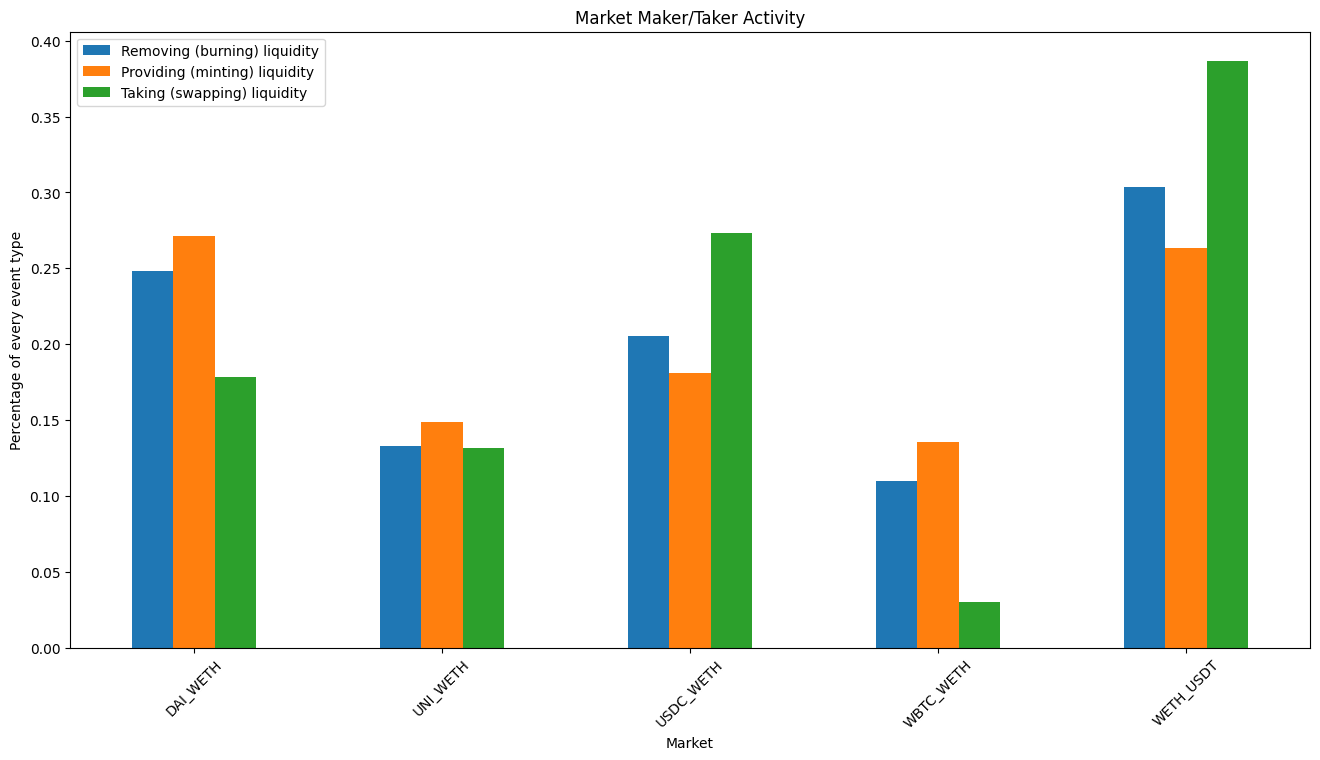

In [ ]:
# Plot a bar graph of the liquidity maker/taker statistics

burn_mint_swap_token_pair_percentage\
.plot(kind='bar', figsize=(16,8), rot=45)

plt.xlabel('Market')
plt.ylabel('Percentage of every event type')
plt.title('Market Maker/Taker Activity')
plt.legend(['Removing (burning) liquidity',
            'Providing (minting) liquidity',
            'Taking (swapping) liquidity'])

<br>
<font size="+1">
    <ul>
        <font color="red"><li style="color:red"><b>What do we observe?</b></li></font>
        <br>
        <li>The two markets with the highest amount of trading (swaps), have more burning rather than minting.</li>
        <br>
        <li>Is there a causal relation, or is there a confounding explanation? That is, does the removal of liquidity lead to more trading or does the more trading lead to more removal of liquidity? Or, could ilt be some other factor that is driving these stylized facts? It is hard to determine with this particular analysis.</li>
<br>
        <li>Additionally, in the markets with higher minting relative to burning, we see less swapping.</li>
        <br>
        <li>What are some possible explanations for these statistics?</li>
        <br>
    <ul>
        <li>Possibly because of opportunity costs (impermanent loss) from price swings in the market?</li>
        <br>
        <li>On the other hand, the other markets have more liquidity actions compared to swaps. </li>
        <br>
    </ul>
        <li>We also observe when burns are less than mints, we have low swaps compared to liquidity actions.</li>
        <br>
        <li>Similarly, when burns are larger than mints, we have higher swaps compared to liquidity actions.</li>
        <br>
        <li>What is causing this relation?</li>
        <br>
    <ul>
        <li>Is it the large number of swaps that creates the relation between burns and mints?</li>
        <br>
        <li>Or is it the relationship between the burns and mints that causes the swaps?</li>
        <br>
    </ul>
        <font color="red"><li style="color:red">How else might we rationalize this pattern?</li></font>
        <br>
        <li>Further analysis is warranted.</li>
        <br>
    </ul>
</font>

$\rule{800pt}{20pt}$

## How many liquidity providers are in each market?
<br>
<font size="+1">
    <ul>
        <li>This question requires you to work with multiple data frames.</li>
        <br>
    </ul>
</font>

In [ ]:
pools_str

['dai_eth', 'usdt_eth', 'uni_eth', 'usdc_eth', 'wbtc_eth']

In [ ]:
pools_str[0]

'dai_eth'

In [ ]:
total_num_liq_providers = pd.DataFrame(index=pools_str, columns=['total_LPs'])

for j in range(len(pools)):
    total_num_liq_providers.loc[pools_str[j],:] = len(pools[j].iloc[:-1,-1])

In [ ]:
total_num_liq_providers

total_LPs
dai_eth      17360
usdt_eth     17112
uni_eth       9382
usdc_eth     10784
wbtc_eth      8444

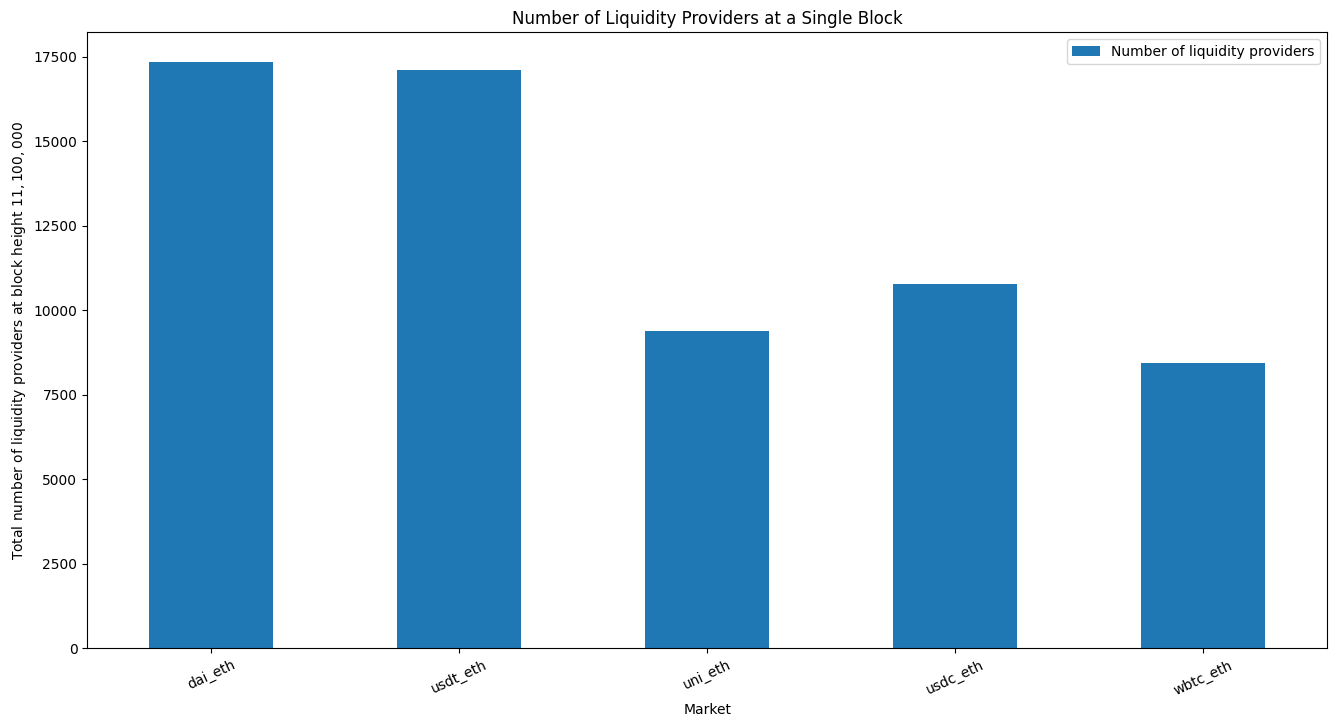

In [ ]:
total_num_liq_providers.plot(kind='bar', figsize=(16,8), rot=25)


plt.xlabel('Market')
plt.ylabel('Total number of liquidity providers at block height $11,100,000$')
plt.title('Number of Liquidity Providers at a Single Block')
plt.legend(['Number of liquidity providers'])

<br>
<font size="+1">
    <ul>
        <font color="red"><li style="color:red"><b>What do we observe?</b></li></font>
        <br>
    </ul>
</font>

$\rule{800pt}{20pt}$

## Who are the top five liquidity providers of every market, and what percentage of the market is being supplied by them?
<br>
<font size="+1">
    <ul>
        <font color="red"><li style="color:red">This solution involves some new(ish) techniques, and is mildly complicated.</li></font>
        <br>
    </ul>
</font>

In [ ]:
#multi_merge = pd.merge(pools[4],pd.merge(pools[3],pd.merge(pools[2],pd.merge(pools[0], pools[1], on='ADDRESS'), on='ADDRESS'), on='ADDRESS'), on='ADDRESS')
#multi_merge.iloc[:-1, -1].sum()

In [ ]:
pools_str

['dai_eth', 'usdt_eth', 'uni_eth', 'usdc_eth', 'wbtc_eth']

In [ ]:
pools[0].iloc[:-1,[0,-1]].sort_values(by = 'BAL/TOT_SUP', ascending = False).head(5)

ADDRESS  BAL/TOT_SUP
0  0xa1484c3aa22a66c62b77e0ae78e15258bd0cb711     0.963308
1  0x307e2752e8b8a9c29005001be66b1c012ca9cdb7     0.011394
2  0x590c6d733aa428dfe58ed0fd15c821fc92eeb564     0.006808
3  0x79317fc0fb17bc0ce213a2b50f343e4d4c277704     0.001349
4  0x36e5a96c8d01803d2c48756aa7bde1c01d7d9f8a     0.001170

In [ ]:
# Create a dictionary whose keys are markets,
# and whose values are the statistics we want to collect

top_liq_providers = {}

for j in range(len(pools)):
    top_liq_providers[pools_str[j]] = pools[j]\
                                        .iloc[:-1, [0,-1]]\
                                        .sort_values(by='BAL/TOT_SUP', ascending=False)\
                                        .head(5)

In [ ]:
top_liq_providers

{'dai_eth':                                       ADDRESS  BAL/TOT_SUP
 0  0xa1484c3aa22a66c62b77e0ae78e15258bd0cb711     0.963308
 1  0x307e2752e8b8a9c29005001be66b1c012ca9cdb7     0.011394
 2  0x590c6d733aa428dfe58ed0fd15c821fc92eeb564     0.006808
 3  0x79317fc0fb17bc0ce213a2b50f343e4d4c277704     0.001349
 4  0x36e5a96c8d01803d2c48756aa7bde1c01d7d9f8a     0.001170,
 'usdt_eth':                                       ADDRESS  BAL/TOT_SUP
 0  0x6c3e4cb2e96b01f4b866965a91ed4437839a121a     0.964284
 1  0x7ddc3fff0612e75ea5ddc0d6bd4e268f70362cff     0.017898
 2  0xd2db6c5e613c0e1ce63c7a15045e8d163a3fc576     0.001284
 3  0xfc874c95afbafb9966dee3764a9a35f475829f97     0.000968
 4  0x609e0f0cb16e53878ba5e959a22fc7fcd81b124a     0.000674,
 'uni_eth':                                       ADDRESS  BAL/TOT_SUP
 0  0x5c8960c7f56878ae3769bf7145b0147f83bfdf58     0.163240
 1  0x2c03d6aba12b3f33655184488492f164aeff6098     0.104958
 2  0xbc64bde4c3b70147c47c16dd9277a6aaef7e0f02     0.042331
 3  

In [ ]:
pd.concat(top_liq_providers,axis=0)\
.reset_index()\
.drop('level_1', axis=1)\
.rename(columns={'level_0':'pool'})

pool                                     ADDRESS  BAL/TOT_SUP
0    dai_eth  0xa1484c3aa22a66c62b77e0ae78e15258bd0cb711     0.963308
1    dai_eth  0x307e2752e8b8a9c29005001be66b1c012ca9cdb7     0.011394
2    dai_eth  0x590c6d733aa428dfe58ed0fd15c821fc92eeb564     0.006808
3    dai_eth  0x79317fc0fb17bc0ce213a2b50f343e4d4c277704     0.001349
4    dai_eth  0x36e5a96c8d01803d2c48756aa7bde1c01d7d9f8a     0.001170
5   usdt_eth  0x6c3e4cb2e96b01f4b866965a91ed4437839a121a     0.964284
6   usdt_eth  0x7ddc3fff0612e75ea5ddc0d6bd4e268f70362cff     0.017898
7   usdt_eth  0xd2db6c5e613c0e1ce63c7a15045e8d163a3fc576     0.001284
8   usdt_eth  0xfc874c95afbafb9966dee3764a9a35f475829f97     0.000968
9   usdt_eth  0x609e0f0cb16e53878ba5e959a22fc7fcd81b124a     0.000674
10   uni_eth  0x5c8960c7f56878ae3769bf7145b0147f83bfdf58     0.163240
11   uni_eth  0x2c03d6aba12b3f33655184488492f164aeff6098     0.104958
12   uni_eth  0xbc64bde4c3b70147c47c16dd9277a6aaef7e0f02     0.042331
13   uni_eth  0x1d933fd71ff07e69f066d50b39a7c34eb3b69f05     0.035739
14   uni_eth  0x3078f22015436d621062f7cc8334774eb5685e97     0.033963
15  usdc_eth  0x7fba4b8dc5e7616e59622806932dbea72537a56b     0.960965
16  usdc_eth  0xa79a083fdd87f73c2f983c5551ec974685d6bb36     0.022350
17  usdc_eth  0x95beaeb2701736dd9bf1930d569231e78ca386ec     0.001942
18  usdc_eth  0xed7f11435cc09d51739f91f9b6fca9272d795279     0.001261
19  usdc_eth  0xd80490fddad5b4d57fed5b649167c6b8259b63e3     0.001130
20  wbtc_eth  0xca35e32e7926b96a9988f61d510e038108d8068e     0.961911
21  wbtc_eth  0x01112a60f427205dca6e229425306923c3cc2073     0.025604
22  wbtc_eth  0xf2d373481e1da4a8ca4734b28f5a642d55fda7d3     0.002673
23  wbtc_eth  0x1554d34d46842778999cb4eb1381b19f651e4a9d     0.001282
24  wbtc_eth  0xa6bfedc4bf9bdb3f09a448518206023e8c009ddf     0.001131

In [ ]:
top_liq_providers = pd.concat(top_liq_providers,axis=0).reset_index().drop('level_1', axis=1).rename(columns={'level_0':'pool'})

In [ ]:
top_liq_providers_and_total_num = \
pd.merge(top_liq_providers, total_num_liq_providers, \
         left_on='pool', right_index=True)\
.set_index(['pool', 'ADDRESS'])

top_liq_providers_and_total_num

BAL/TOT_SUP total_LPs
pool     ADDRESS                                                          
dai_eth  0xa1484c3aa22a66c62b77e0ae78e15258bd0cb711     0.963308     17360
         0x307e2752e8b8a9c29005001be66b1c012ca9cdb7     0.011394     17360
         0x590c6d733aa428dfe58ed0fd15c821fc92eeb564     0.006808     17360
         0x79317fc0fb17bc0ce213a2b50f343e4d4c277704     0.001349     17360
         0x36e5a96c8d01803d2c48756aa7bde1c01d7d9f8a     0.001170     17360
usdt_eth 0x6c3e4cb2e96b01f4b866965a91ed4437839a121a     0.964284     17112
         0x7ddc3fff0612e75ea5ddc0d6bd4e268f70362cff     0.017898     17112
         0xd2db6c5e613c0e1ce63c7a15045e8d163a3fc576     0.001284     17112
         0xfc874c95afbafb9966dee3764a9a35f475829f97     0.000968     17112
         0x609e0f0cb16e53878ba5e959a22fc7fcd81b124a     0.000674     17112
uni_eth  0x5c8960c7f56878ae3769bf7145b0147f83bfdf58     0.163240      9382
         0x2c03d6aba12b3f33655184488492f164aeff6098     0.104958      9382
         0xbc64bde4c3b70147c47c16dd9277a6aaef7e0f02     0.042331      9382
         0x1d933fd71ff07e69f066d50b39a7c34eb3b69f05     0.035739      9382
         0x3078f22015436d621062f7cc8334774eb5685e97     0.033963      9382
usdc_eth 0x7fba4b8dc5e7616e59622806932dbea72537a56b     0.960965     10784
         0xa79a083fdd87f73c2f983c5551ec974685d6bb36     0.022350     10784
         0x95beaeb2701736dd9bf1930d569231e78ca386ec     0.001942     10784
         0xed7f11435cc09d51739f91f9b6fca9272d795279     0.001261     10784
         0xd80490fddad5b4d57fed5b649167c6b8259b63e3     0.001130     10784
wbtc_eth 0xca35e32e7926b96a9988f61d510e038108d8068e     0.961911      8444
         0x01112a60f427205dca6e229425306923c3cc2073     0.025604      8444
         0xf2d373481e1da4a8ca4734b28f5a642d55fda7d3     0.002673      8444
         0x1554d34d46842778999cb4eb1381b19f651e4a9d     0.001282      8444
         0xa6bfedc4bf9bdb3f09a448518206023e8c009ddf     0.001131      8444

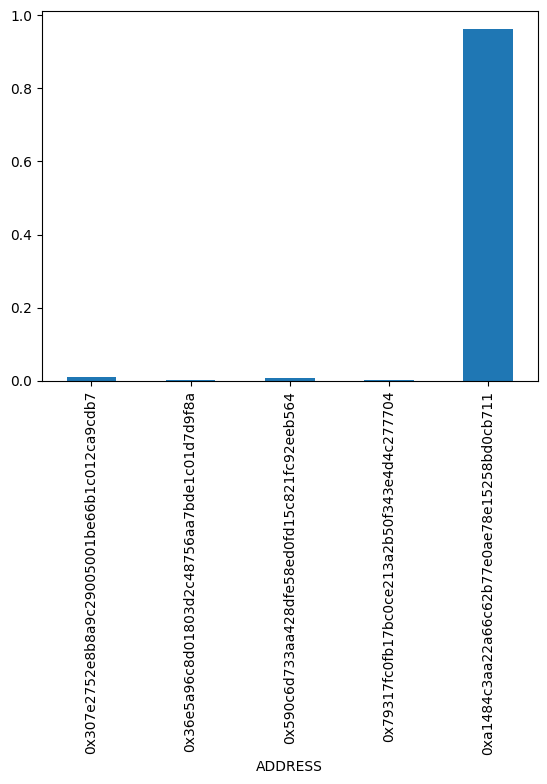

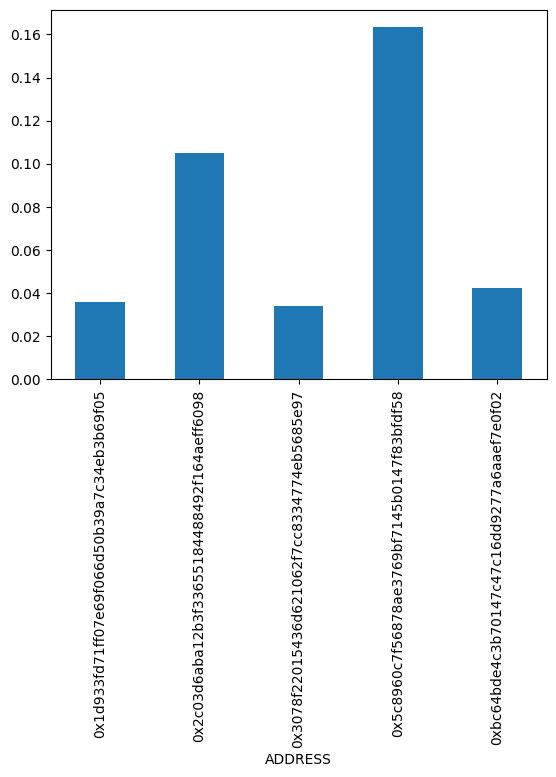

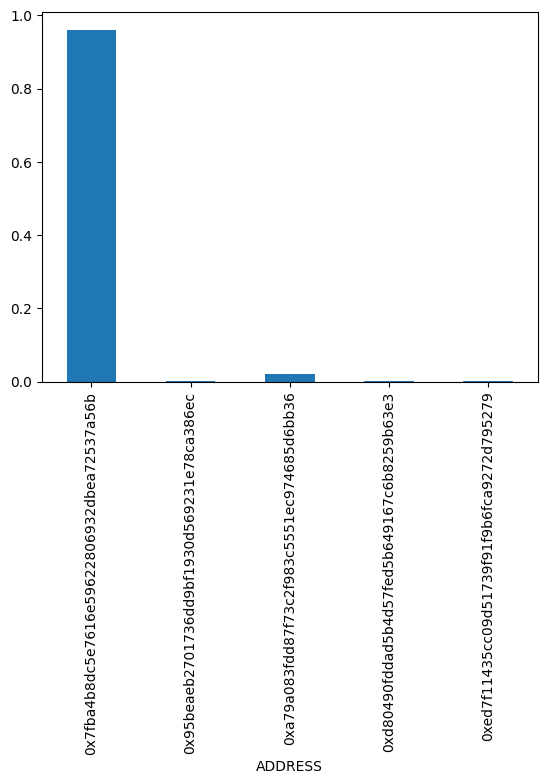

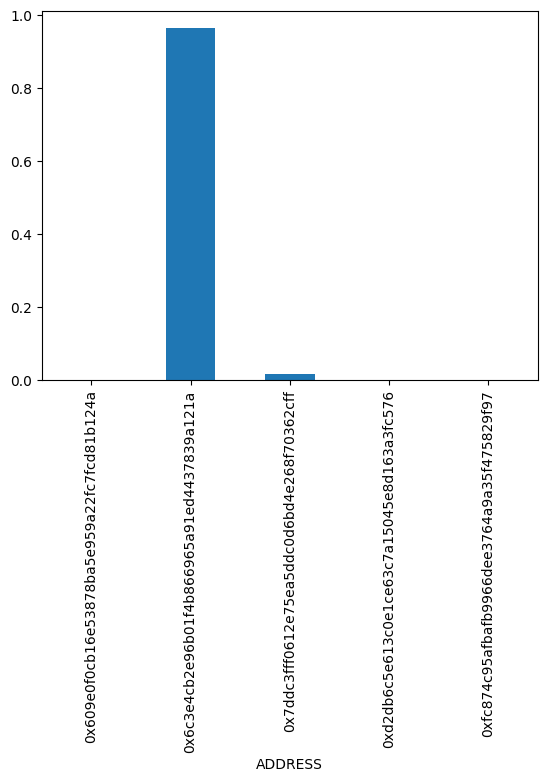

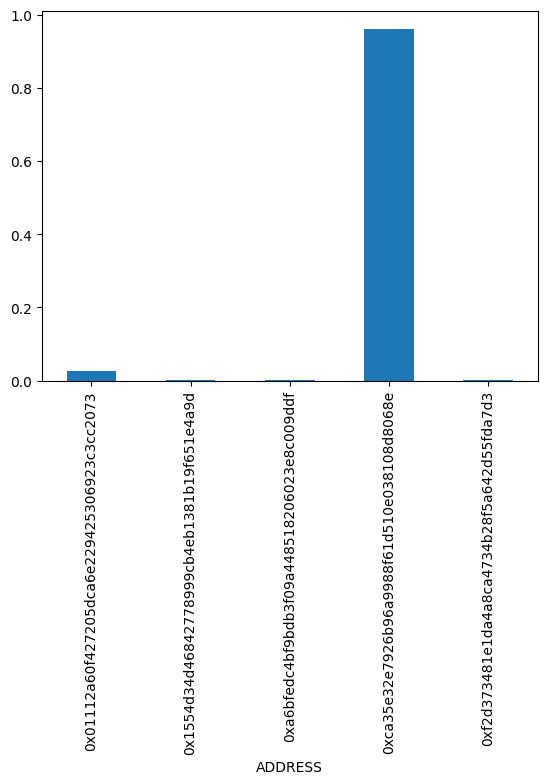

In [ ]:
for j in range(5):
    plt.figure()

    top_liq_providers_and_total_num['BAL/TOT_SUP']\
    .unstack(level='pool')\
    .iloc[:, j]\
    .dropna()\
    .plot(kind='bar', rot=90)

    plt.show()

Text(0.5, 1.0, 'Percentage of Ownership of Top Liquidity Providers at a Single Block')

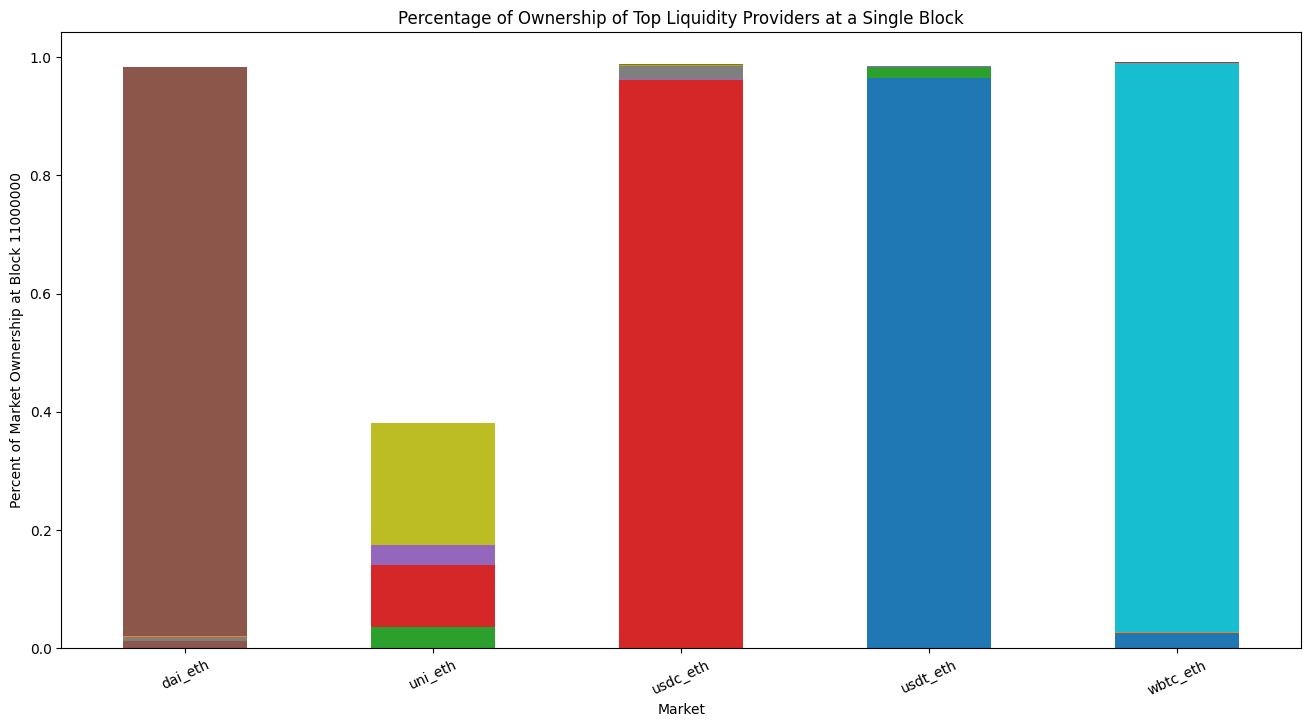

In [ ]:
top_liq_providers_and_total_num['BAL/TOT_SUP']\
.unstack(level='ADDRESS')\
.plot(kind='bar', stacked=True, legend=False, figsize=(16,8), rot=25)

plt.xlabel('Market')
plt.ylabel('Percent of Market Ownership at Block 11000000')
plt.title('Percentage of Ownership of Top Liquidity Providers at a Single Block')

<br>
<font size="+1">
    <ul>
        <font color="red"><li style="color:red"><b>What do we observe?</b></li></font>
        <br>
       <li> We see, in the five markets from our datasets, that all but one (UNI-ETH) are dominated by one major liquidity provider that provides approximately 96% of the entire pool.</li>
        <br>
        <li> Further, three markets have between 8-10 thousand liquidity providers, and two pools have approximately 17 thousand liquidity providers at the fixed block height of 11,100,000.</li>
        <br>
        <font color="blue"><li style="color:blue">What else can we infer about the liquidity providers in the various markets? </li></font>
        <br>
        <ul style="color:blue">
            <font color="blue"><li>We might be limited to what we can say because this data is for a fixed block height.</li>
            <br>
            <li>We can't see how this ownership percentage changes over time, or relates to other variables.</li></font>
            <br>
        </ul>
        <li>What market property is related to these imbalances in ownership percentages?</li>
        <br>
        <ul>
            <li>We see the concentrated pools are DAI, USDT, USDC, WBTC (Bitcoin), and the pool with distributed ownership is UNI, the Uniswap coin.</li>
            <br>
            <li>DAI, USDT, and USDC are all stable coins and you can read about their differences <a href="https://www.tastycrypto.com/blog/usdt-vs-usdc-vs-dai/#:~:text=USDT%20(Tether)%2C%20USDC%20(,over%2Dcollateralized%20by%20various%20cryptocurrencies.">here</a>.</li>
            <br>
            <li>Among the stable coins, DAI and USDT have more liquidity providers than the other, USDC.</li>
            <br>
        </ul>
        <font color="blue"><li style="color:blue"><b>Follow-up question:</b> How are these pools the "largest"?</li></font>
        <br>
        <ul style="color:blue">
            <font color="blue"><li>I believe it is measured by the total dollar value of assets in the pool <a href="https://www.fool.com/investing/2021/09/29/what-is-total-value-locked/">(TVL = total value locked)</a>.</li></font>
            <br>
        </ul>
    </ul>
</font>

$\square$

$\rule{800pt}{20pt}$

## How many transactions are occurring daily?
<br>
<font size="+1">
    <ul>
        <li>We are interested in how this decentralized marketplace behaves per day.</li>
        <br>
        <li>Specifically, as a first metric, we are interested in how many <b>transactions</b> are occurring on the exchange on a daily basis.</li>
        <br>
        <li>At this point, we want to work with a dataset of burns, mints, and swaps $\implies$ we need to merge.</li>
        <br>
    </ul>
</font>

$\square$

### Merging Transactions and Cleaning

In [ ]:
# #step 1: merge burn_mint and swaps
# step 2: create a single date column( ffill and bfill)
# step 3: froup data by dat & look at single group (i.e.  a single date)
# step 4: figure out how to compute total number of transactions
# step 5: compute total number of transactions by counting non-null events
# step 6: remove the single group and calculate the whole

In [ ]:
liquidity_actions_swaps = pd.merge(burn_mint, swaps, on='BLOCK_HEIGHT',
                                   how='outer', suffixes=('_lp', '_swaps'))

In [ ]:
liquidity_actions_swaps\
.loc[:,['BLOCK_SIGNED_AT_DAY_lp', 'BLOCK_SIGNED_AT_DAY_swaps']]

BLOCK_SIGNED_AT_DAY_lp BLOCK_SIGNED_AT_DAY_swaps
0                   2020-05-07                       NaT
1                   2020-05-08                       NaT
2                   2020-05-13                2020-05-13
3                   2020-05-14                       NaT
4                   2020-05-14                2020-05-14
...                        ...                       ...
2297969                    NaT                2020-10-21
2297970                    NaT                2020-10-21
2297971                    NaT                2020-10-21
2297972                    NaT                2020-10-21
2297973                    NaT                2020-10-21

[2297974 rows x 2 columns]

In [ ]:
liquidity_actions_swaps\
.loc[:,['BLOCK_SIGNED_AT_DAY_lp', 'BLOCK_SIGNED_AT_DAY_swaps']]\
.ffill(axis=1)\
.bfill(axis=1)

BLOCK_SIGNED_AT_DAY_lp BLOCK_SIGNED_AT_DAY_swaps
0                   2020-05-07                2020-05-07
1                   2020-05-08                2020-05-08
2                   2020-05-13                2020-05-13
3                   2020-05-14                2020-05-14
4                   2020-05-14                2020-05-14
...                        ...                       ...
2297969             2020-10-21                2020-10-21
2297970             2020-10-21                2020-10-21
2297971             2020-10-21                2020-10-21
2297972             2020-10-21                2020-10-21
2297973             2020-10-21                2020-10-21

[2297974 rows x 2 columns]

In [ ]:
liquidity_actions_swaps.loc[:, 'BLOCK_SIGNED_AT_DAY'] = \
pd.to_datetime(liquidity_actions_swaps.loc[:,['BLOCK_SIGNED_AT_DAY_lp', 'BLOCK_SIGNED_AT_DAY_swaps']]\
                                                                       .ffill(axis=1)\
                                                                       .bfill(axis=1)\
                                                                       .loc[:,'BLOCK_SIGNED_AT_DAY_lp'])

In [ ]:
pd.to_datetime(liquidity_actions_swaps.loc[:,['BLOCK_SIGNED_AT_DAY_lp', 'BLOCK_SIGNED_AT_DAY_swaps']]\
                                                                       .ffill(axis=1)\
                                                                       .bfill(axis=1)\
                                                                       .loc[:,'BLOCK_SIGNED_AT_DAY_lp'])

0         2020-05-07
1         2020-05-08
2         2020-05-13
3         2020-05-14
4         2020-05-14
             ...    
2297969   2020-10-21
2297970   2020-10-21
2297971   2020-10-21
2297972   2020-10-21
2297973   2020-10-21
Name: BLOCK_SIGNED_AT_DAY_lp, Length: 2297974, dtype: datetime64[ns]

In [ ]:
liquidity_actions_swaps.loc[:, 'event_type'] = \
liquidity_actions_swaps\
.loc[:,['EVENT_TYPE_lp', 'EVENT_TYPE_swaps']]\
.ffill(axis=1)\
.bfill(axis=1)\
.loc[:,'EVENT_TYPE_lp']

In [ ]:
liquidity_actions_swaps.loc[:, 'token_pairs'] = \
liquidity_actions_swaps.loc[:,['token_pairs_lp', 'token_pairs_swaps']]\
                                                       .ffill(axis=1)\
                                                       .bfill(axis=1)\
                                                       .loc[:,'token_pairs_lp']

In [ ]:
liquidity_actions_swaps.columns

Index(['BLOCK_HEIGHT', 'BLOCK_SIGNED_AT_lp', 'EVENT_TYPE_lp', 'LOGGED_AMOUNT0',
       'LOGGED_AMOUNT1', 'POOL_ADDRESS_lp', 'POOL_DECIMALS_lp', 'POOL_NAME_lp',
       'POOL_TICKER_SYMBOL_lp', 'TOKEN_0_lp', 'TOKEN_0_DECIMALS_lp',
       'TOKEN_0_NAME_lp', 'TOKEN_0_TICKER_SYMBOL_lp', 'TOKEN_1_lp',
       'TOKEN_1_DECIMALS_lp', 'TOKEN_1_NAME_lp', 'TOKEN_1_TICKER_SYMBOL_lp',
       'TX_HASH_lp', 'BLOCK_SIGNED_AT_DAY_lp', 'token_pairs_lp',
       'ADDRESS_FROM', 'ADDRESS_TO', 'AMOUNT0_IN', 'AMOUNT0_OUT', 'AMOUNT1_IN',
       'AMOUNT1_OUT', 'BLOCK_SIGNED_AT_swaps', 'EVENT_TYPE_swaps',
       'POOL_ADDRESS_swaps', 'POOL_DECIMALS_swaps', 'POOL_NAME_swaps',
       'POOL_TICKER_SYMBOL_swaps', 'TOKEN_0_swaps', 'TOKEN_0_DECIMALS_swaps',
       'TOKEN_0_NAME_swaps', 'TOKEN_0_TICKER_SYMBOL_swaps', 'TOKEN_1_swaps',
       'TOKEN_1_DECIMALS_swaps', 'TOKEN_1_NAME_swaps',
       'TOKEN_1_TICKER_SYMBOL_swaps', 'TX_HASH_swaps',
       'BLOCK_SIGNED_AT_DAY_swaps', 'token_pairs_swaps', 'BLOCK_SIGNED_AT_DAY'

In [ ]:
liquidity_actions_swaps

BLOCK_HEIGHT         BLOCK_SIGNED_AT_lp EVENT_TYPE_lp LOGGED_AMOUNT0  \
0            10020001  2020-05-07 22:47:25+00:00          BURN       0.003262   
1            10022981  2020-05-08 09:43:59+00:00          BURN       0.014189   
2            10053453  2020-05-13 03:18:50+00:00          BURN       0.781284   
3            10060873  2020-05-14 06:48:21+00:00          BURN       0.995309   
4            10064415  2020-05-14 19:58:48+00:00          BURN       0.010197   
...               ...                        ...           ...            ...   
2297969      11099999                        NaN           NaN            NaN   
2297970      11099999                        NaN           NaN            NaN   
2297971      11100000                        NaN           NaN            NaN   
2297972      11100000                        NaN           NaN            NaN   
2297973      11100000                        NaN           NaN            NaN   

        LOGGED_AMOUNT1                             POOL_ADDRESS_lp  \
0             0.000016  0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc   
1              0.00007  0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc   
2             0.006539  0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc   
3             0.004114  0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc   
4              0.00005  0xa478c2975ab1ea89e8196811f51a7b7ade33eb11   
...                ...                                         ...   
2297969            NaN                                         NaN   
2297970            NaN                                         NaN   
2297971            NaN                                         NaN   
2297972            NaN                                         NaN   
2297973            NaN                                         NaN   

         POOL_DECIMALS_lp POOL_NAME_lp POOL_TICKER_SYMBOL_lp  \
0                    18.0   Uniswap V2                UNI-V2   
1                    18.0   Uniswap V2                UNI-V2   
2                    18.0   Uniswap V2                UNI-V2   
3                    18.0   Uniswap V2                UNI-V2   
4                    18.0   Uniswap V2                UNI-V2   
...                   ...          ...                   ...   
2297969               NaN          NaN                   NaN   
2297970               NaN          NaN                   NaN   
2297971               NaN          NaN                   NaN   
2297972               NaN          NaN                   NaN   
2297973               NaN          NaN                   NaN   

                                         TOKEN_0_lp  ...  \
0        0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48  ...   
1        0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48  ...   
2        0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48  ...   
3        0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48  ...   
4        0x6b175474e89094c44da98b954eedeac495271d0f  ...   
...                                             ...  ...   
2297969                                         NaN  ...   
2297970                                         NaN  ...   
2297971                                         NaN  ...   
2297972                                         NaN  ...   
2297973                                         NaN  ...   

                                      TOKEN_1_swaps TOKEN_1_DECIMALS_swaps  \
0                                               NaN                    NaN   
1                                               NaN                    NaN   
2        0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2                   18.0   
3                                               NaN                    NaN   
4        0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2                   18.0   
...                                             ...                    ...   
2297969  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2                   18.0   
2297970  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2                   18.0   
229

### What's happening on a sample day?

In [ ]:
liquidity_actions_swaps.groupby('BLOCK_SIGNED_AT_DAY')\
.get_group('2020-05-14')\
[['BLOCK_HEIGHT','EVENT_TYPE_lp','EVENT_TYPE_swaps']]

BLOCK_HEIGHT EVENT_TYPE_lp EVENT_TYPE_swaps
3           10060873          BURN              NaN
4           10064415          BURN             SWAP
5           10064794          BURN             SWAP
6           10064798          BURN             SWAP
365185      10060807          MINT              NaN
365186      10060850          MINT              NaN
365187      10060958          MINT              NaN
365188      10062519          MINT             SWAP
365189      10064118          MINT             SWAP
365190      10064410          MINT             SWAP
365191      10064418          MINT             SWAP
365192      10064447          MINT             SWAP
365193      10064790          MINT             SWAP
365194      10064792          MINT             SWAP
365195      10065209          MINT             SWAP
862437      10060520           NaN             SWAP
862438      10060752           NaN             SWAP
862439      10060820           NaN             SWAP
862440      10060922           NaN             SWAP
862441      10060952           NaN             SWAP
862442      10060952           NaN             SWAP

### How can we measure the number of transactions that are occurring daily?

<br>
<font size="+1">
  <ul>
    <li>We need to count the non-null event types!</li>
    <br>
    <li>We can use the Pandas <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html">.count()</a> method.</li>
    <br>
  </ul>
</font>

In [ ]:
liquidity_actions_swaps.groupby('BLOCK_SIGNED_AT_DAY')\
.get_group('2020-05-14')\
[['EVENT_TYPE_lp','EVENT_TYPE_swaps']]

EVENT_TYPE_lp EVENT_TYPE_swaps
3               BURN              NaN
4               BURN             SWAP
5               BURN             SWAP
6               BURN             SWAP
365185          MINT              NaN
365186          MINT              NaN
365187          MINT              NaN
365188          MINT             SWAP
365189          MINT             SWAP
365190          MINT             SWAP
365191          MINT             SWAP
365192          MINT             SWAP
365193          MINT             SWAP
365194          MINT             SWAP
365195          MINT             SWAP
862437           NaN             SWAP
862438           NaN             SWAP
862439           NaN             SWAP
862440           NaN             SWAP
862441           NaN             SWAP
862442           NaN             SWAP

In [ ]:
liquidity_actions_swaps.groupby('BLOCK_SIGNED_AT_DAY')\
.get_group('2020-05-14')\
[['EVENT_TYPE_lp','EVENT_TYPE_swaps']].count()

EVENT_TYPE_lp       15
EVENT_TYPE_swaps    17
dtype: int64

In [ ]:
liquidity_actions_swaps.groupby('BLOCK_SIGNED_AT_DAY')\
.get_group('2020-05-14')\
[['EVENT_TYPE_lp','EVENT_TYPE_swaps']].count().sum()

32

In [ ]:
liquidity_actions_swaps.groupby('BLOCK_SIGNED_AT_DAY')\
[['EVENT_TYPE_lp','EVENT_TYPE_swaps']].count()

EVENT_TYPE_lp  EVENT_TYPE_swaps
BLOCK_SIGNED_AT_DAY                                 
2020-05-06                       1                 3
2020-05-07                       2                 1
2020-05-08                       2                 0
2020-05-09                       3                 0
2020-05-11                       0                 2
...                            ...               ...
2020-10-17                    4783             18976
2020-10-18                    4684             18942
2020-10-19                    5193             23466
2020-10-20                    6442             26895
2020-10-21                    4759             20009

[168 rows x 2 columns]

In [ ]:
liquidity_actions_swaps.groupby('BLOCK_SIGNED_AT_DAY')\
[['EVENT_TYPE_lp','EVENT_TYPE_swaps']].count().sum(axis=1)

BLOCK_SIGNED_AT_DAY
2020-05-06        4
2020-05-07        3
2020-05-08        2
2020-05-09        3
2020-05-11        2
              ...  
2020-10-17    23759
2020-10-18    23626
2020-10-19    28659
2020-10-20    33337
2020-10-21    24768
Length: 168, dtype: int64

#### An Alternative Noisy Measure

In [ ]:
liquidity_actions_swaps.groupby('BLOCK_SIGNED_AT_DAY')\
 ['BLOCK_HEIGHT']\
 .size()

BLOCK_SIGNED_AT_DAY
2020-05-06        4
2020-05-07        3
2020-05-08        2
2020-05-09        3
2020-05-11        2
              ...  
2020-10-17    19044
2020-10-18    19026
2020-10-19    23520
2020-10-20    26935
2020-10-21    20055
Name: BLOCK_HEIGHT, Length: 168, dtype: int64

               noisy_measure  true_measure
noisy_measure       1.000000      0.987469
true_measure        0.987469      1.000000


<Axes: xlabel='BLOCK_SIGNED_AT_DAY'>

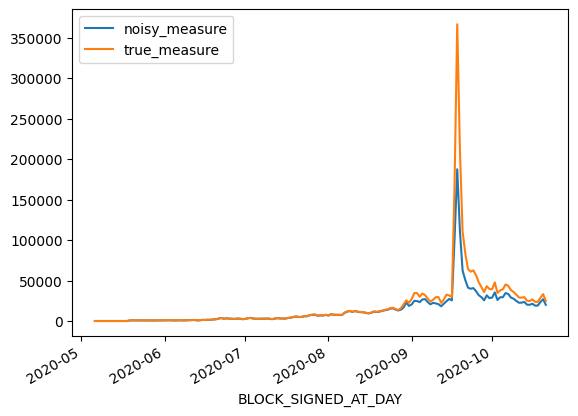

In [ ]:
#noisy proxy for time-series of number of transactions per day
measures_for_num_transactions_per_day = \
pd.concat([liquidity_actions_swaps.groupby('BLOCK_SIGNED_AT_DAY')['BLOCK_HEIGHT'].size(),
           liquidity_actions_swaps.groupby('BLOCK_SIGNED_AT_DAY')[['EVENT_TYPE_lp','EVENT_TYPE_swaps']].count().sum(axis=1)],
          axis=1)

measures_for_num_transactions_per_day.columns = ['noisy_measure', 'true_measure']

print(measures_for_num_transactions_per_day.corr())

measures_for_num_transactions_per_day.plot()

#### Back to the True Measure

In [ ]:
#time-series of number of transactions per day
num_transactions_per_day_ts = \
liquidity_actions_swaps.groupby('BLOCK_SIGNED_AT_DAY')\
[['EVENT_TYPE_lp','EVENT_TYPE_swaps']]\
.count().sum(axis=1)

<Axes: xlabel='BLOCK_SIGNED_AT_DAY'>

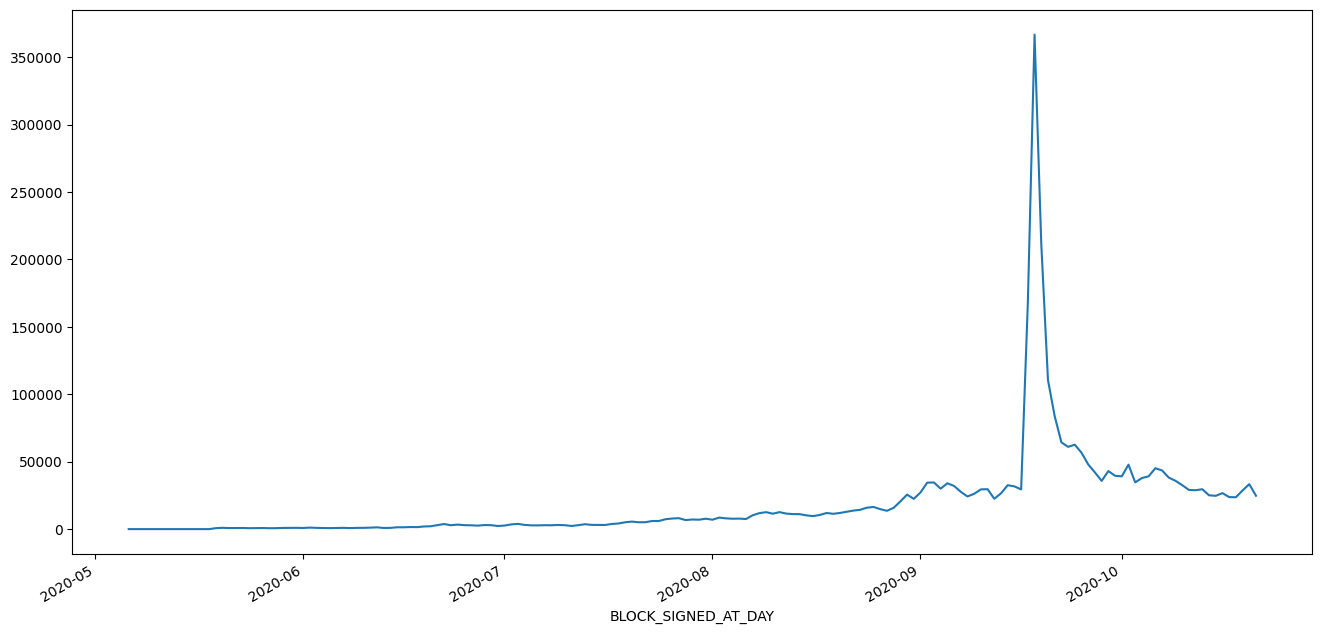

In [ ]:
num_transactions_per_day_ts.plot(figsize=(16,8))

In [ ]:
def histogram_stats(data, index_name):
    if type(data) == pd.Series:
        df = pd.DataFrame([{'min':data.min(),
              'median':data.median(),
              'mean':data.mean(),
              'SD':data.std(),
              'skew':data.skew(),
              'kurtosis':data.kurtosis(),
              'max':data.max()}], index=[index_name])
    elif type(data) == pd.DataFrame:
        df = pd.DataFrame({'min':data.min(),
              'median':data.median(),
              'mean':data.mean(),
              'SD':data.std(),
              'skew':data.skew(),
              'kurtosis':data.kurtosis(),
              'max':data.max()}, index=data.columns)
    return df

In [ ]:
histogram_stats(num_transactions_per_day_ts, 'num_transactions_per_day')

min  median      mean            SD      skew  \
num_transactions_per_day    2  7417.0  18773.75  37575.613475  6.145681   

                           kurtosis     max  
num_transactions_per_day  48.827662  366781

<br>
<font size="+1">
    <ul>
        <li><b>Recall:</b> skewness of a normal distribution is zero, and kurtosis is three.</li>
        <br>
    </ul>
</font>

<Axes: >

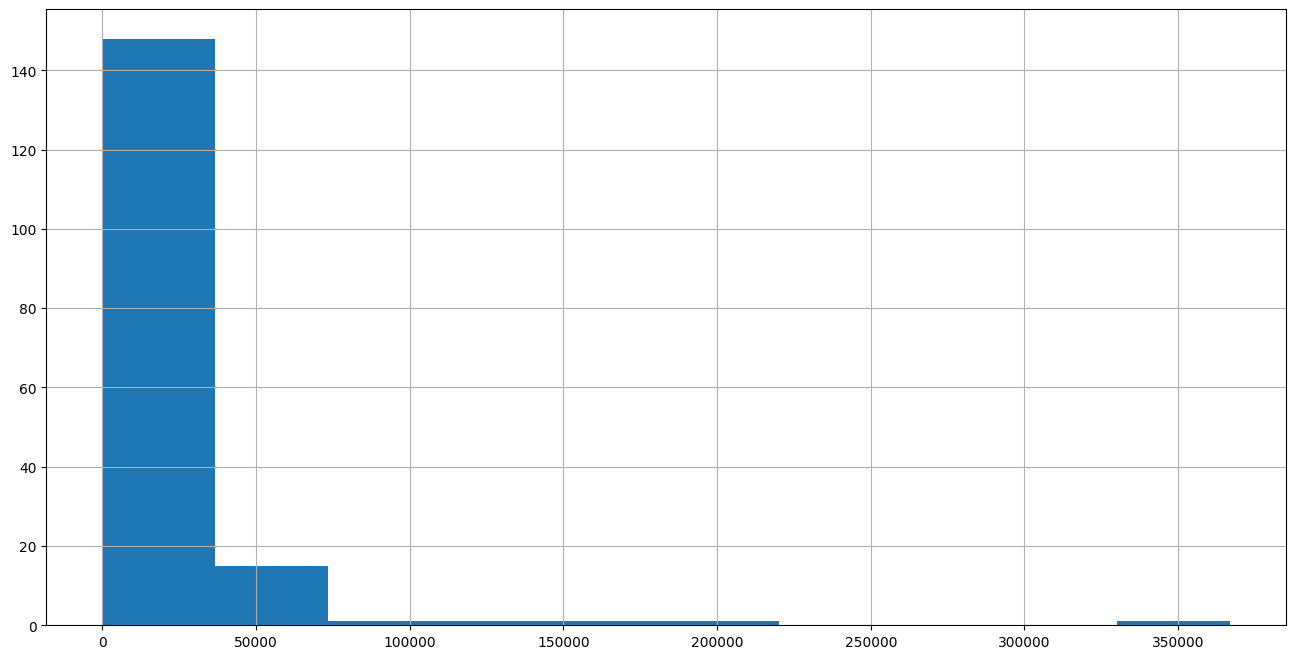

In [ ]:
num_transactions_per_day_ts.hist(figsize=(16,8))

<Axes: >

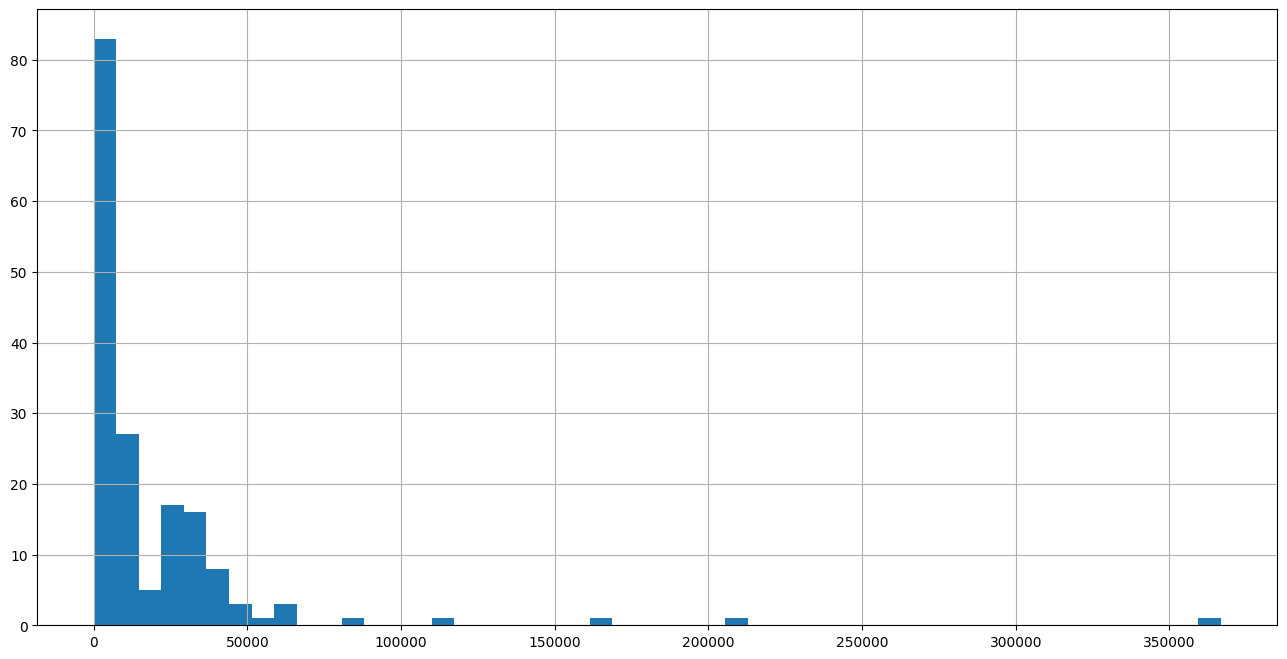

In [ ]:
num_transactions_per_day_ts.hist(figsize=(16,8), bins=50)

<Axes: ylabel='Density'>

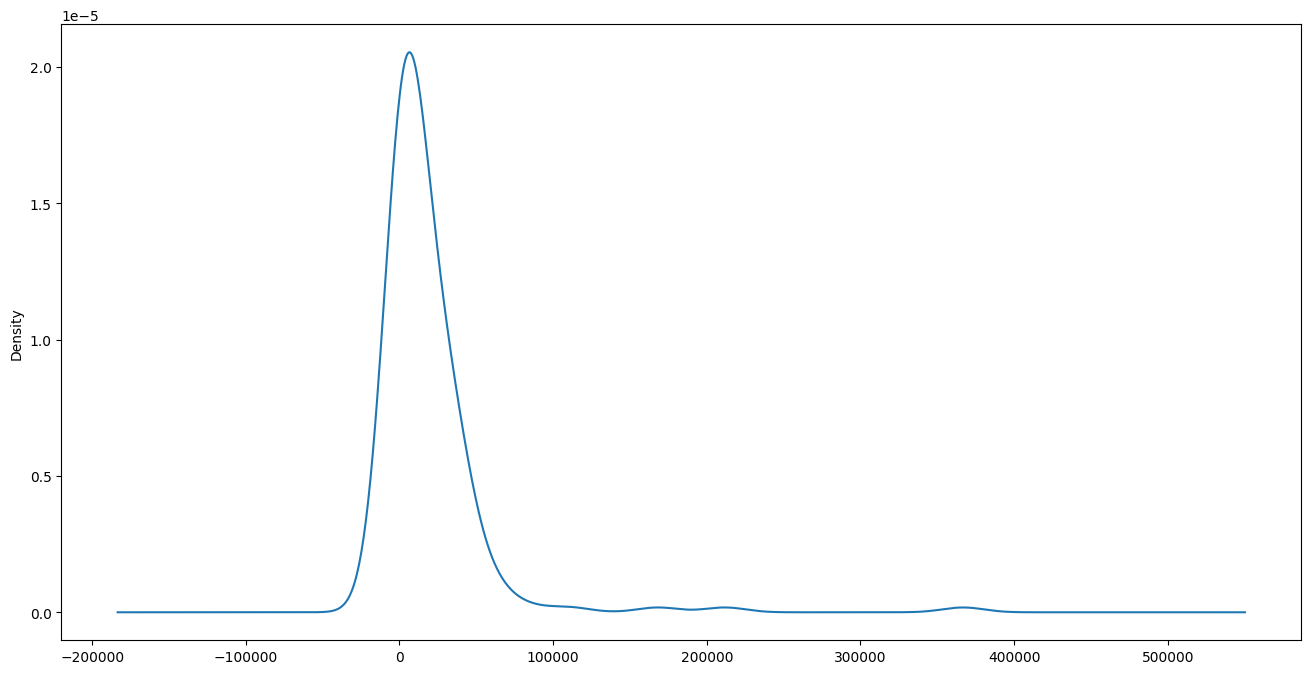

In [ ]:
num_transactions_per_day_ts.plot.kde(figsize=(16,8))

<font size="+1">
    <ul>
        <li>You can use <a href="https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot">Seaborn's <i>displot</i></a> or <a href="https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot"><i>histplot</i></a> method to visualize distributions of data.</li>
        <br>
        <li>When using open source code that is still in active development, things can change in your code and you have to be prepared for these events.</li>
        <br>
    </ul>
</font>

<ipython-input-71-8fe8fa165dd9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_transactions_per_day_ts,


<Axes: ylabel='Density'>

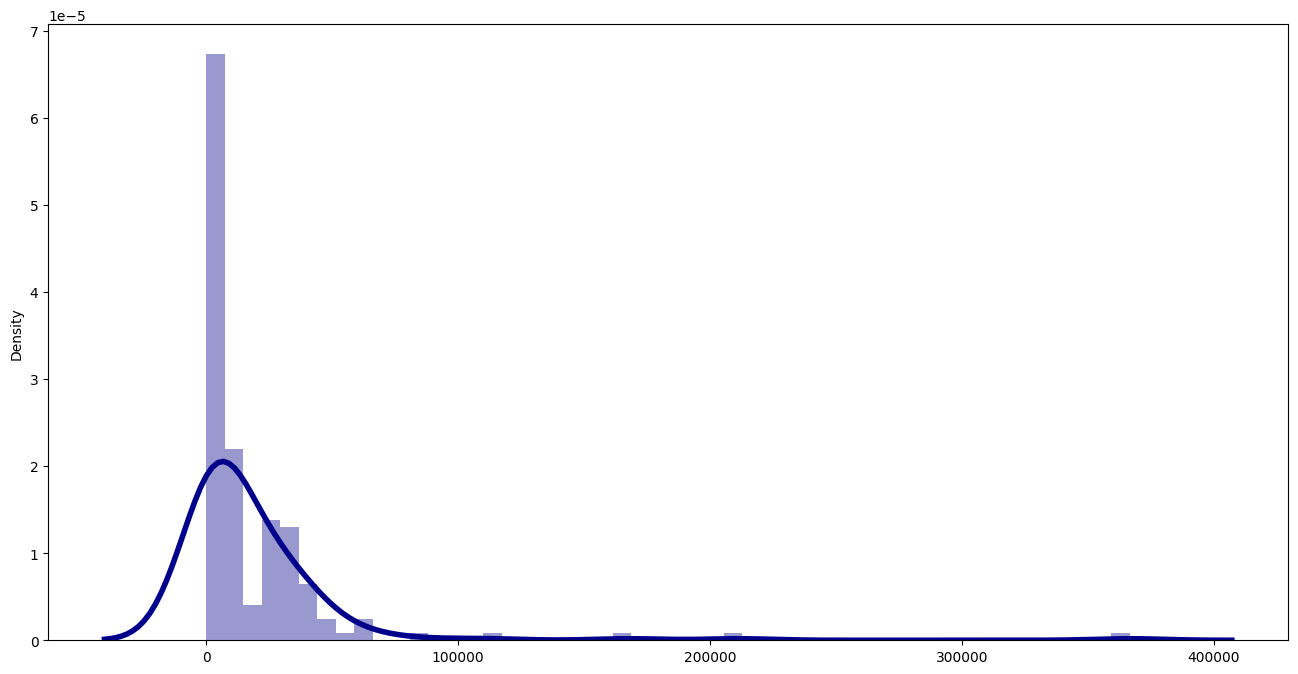

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,8))

sns.distplot(num_transactions_per_day_ts,
             kde=True,
             hist=True,
             bins=50,
             color='darkblue',
             kde_kws={'linewidth': 4})

<Axes: ylabel='Count'>

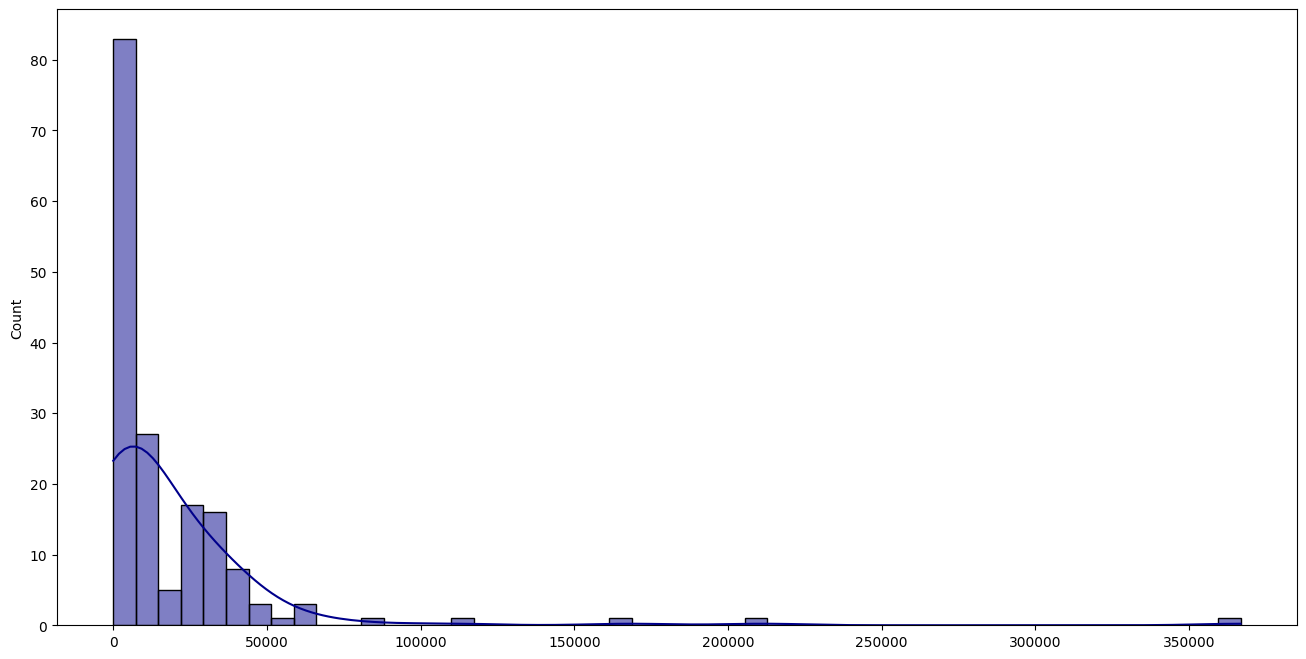

In [ ]:
plt.figure(figsize=(16,8))

sns.histplot(num_transactions_per_day_ts,
             kde=True,
             bins=50,
             color='darkblue')

<br>
<font size="+1">
    <ul>
        <font color="red"><li style="color:red"><b>What do we observe?</b></li></font>
        <br>
        <li>We observe a very <i>"wild"</i> distribution of the number of transactions per day.</li>
        <br>
        <li>It is highly skewed and leptokurtic (high kurtosis).</li>
        <br>
        <li>In the time series, we see a moderate trend, dominated by a large jump up, and then a subsequent reversal, back to a somewhat normal trend.</li>
        <br>
        <font color="blue"><li style="color:blue">What caused this massive spike in the transactions per day?</li>
        <br>
        <li style="color:blue">Should we disaggregate based on liquidity provider actions and swaps?</li>
        <br>
        <li style="color:blue">How can we explain this jump?</li></font>
        <br>
        <font color="red"><li style="color:red">Can we make sense of the trend without the jump?</li></font>
        <br>
    </ul>
</font>

<br>
<font size="+1">
    <ul>
        <li>We can think of this jump as an outlier.</li>
        <br>
        <li>Outliers are a bit tricky and there isn't a unique way to do things.</li>
        <br>
        <li>Possible solutions would be to look at </li>
            <br>
            <ul>
                <li>the range,</li>
                <br>
                <li>histograms,</li>
                <br>
                <li>box plots,</li>
                <br>
                <li>scatter plots,</li>
                <br>
                <li>z-scores,</li>
                <br>
                <li>quantiles,</li>
                <br>
                <li>IQR (inter-quantile range),</li>
                <br>
                <li><b>truncation</b></li>
                <br>
                <li><b><a href="https://en.wikipedia.org/wiki/Winsorizing#:~:text=Winsorizing%20or%20winsorization%20is%20the,as%20clipping%20in%20signal%20processing.">winsorization</a></b></li>
                <br>
                <li>etc.</li>
                <br>
            </ul>
        <br>
    </ul>
</font>

<Axes: xlabel='BLOCK_SIGNED_AT_DAY'>

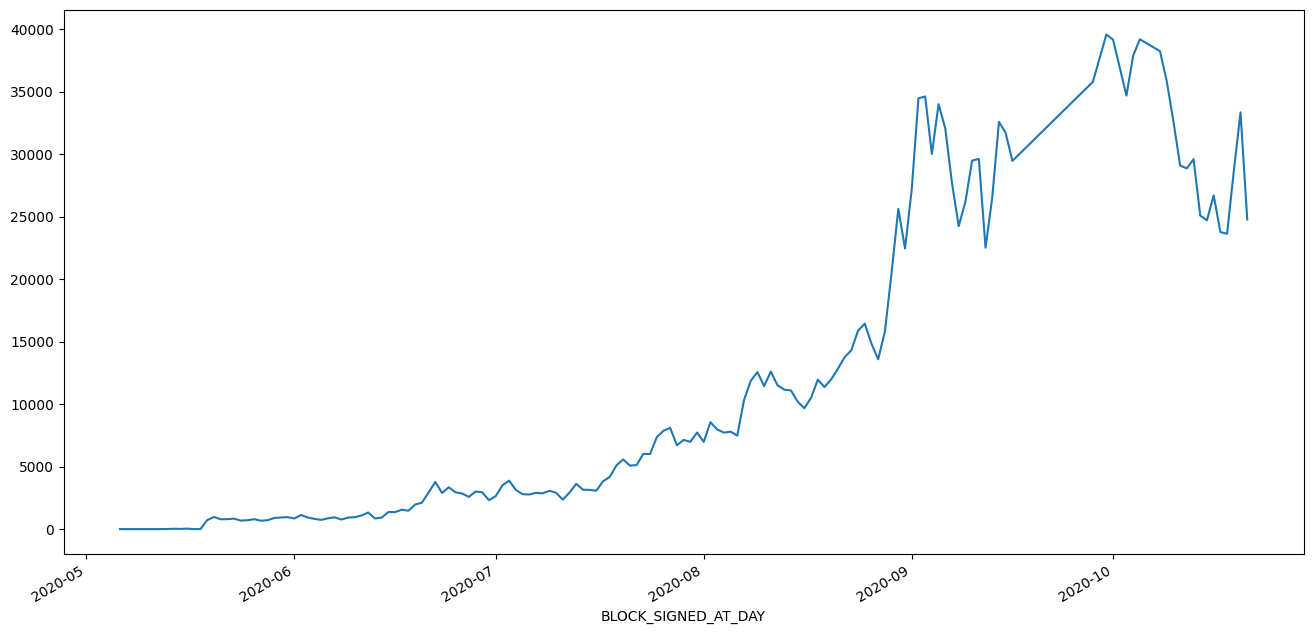

In [ ]:
#time-series of number of transactions per day

transactions_ts = \
liquidity_actions_swaps.groupby('BLOCK_SIGNED_AT_DAY')\
[['EVENT_TYPE_lp','EVENT_TYPE_swaps']]\
.count().sum(axis=1)

transactions_ts.loc[transactions_ts < 40000].plot(figsize=(16,8))

In [ ]:
truncated_num_transactions_per_day_ts = transactions_ts.loc[transactions_ts < 40000]

In [ ]:
histogram_stats(truncated_num_transactions_per_day_ts, 'truncated_num_transactions_per_day')

min  median          mean            SD  \
truncated_num_transactions_per_day    2  5579.0  11103.803922  12074.945369   

                                        skew  kurtosis    max  
truncated_num_transactions_per_day  0.980981 -0.468246  39558

In [ ]:
histogram_stats(num_transactions_per_day_ts, 'num_transactions_per_day')

min  median      mean            SD      skew  \
num_transactions_per_day    2  7417.0  18773.75  37575.613475  6.145681   

                           kurtosis     max  
num_transactions_per_day  48.827662  366781

<Axes: >

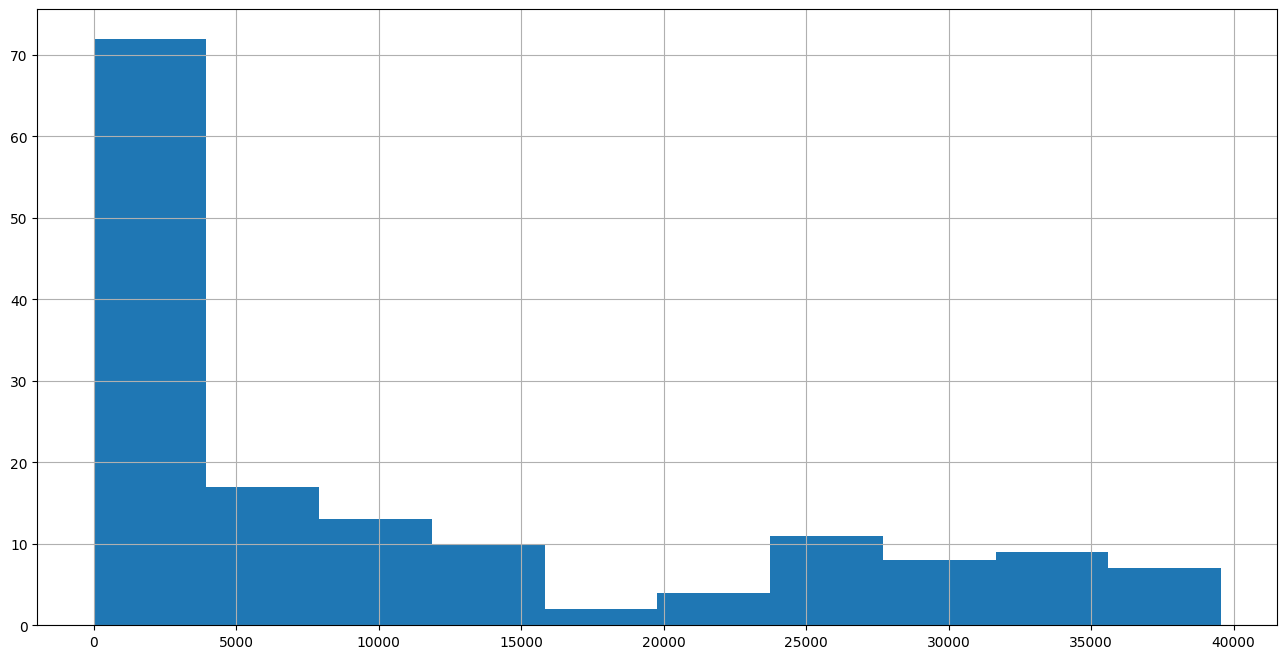

In [ ]:
truncated_num_transactions_per_day_ts.hist(figsize=(16,8))

<Axes: >

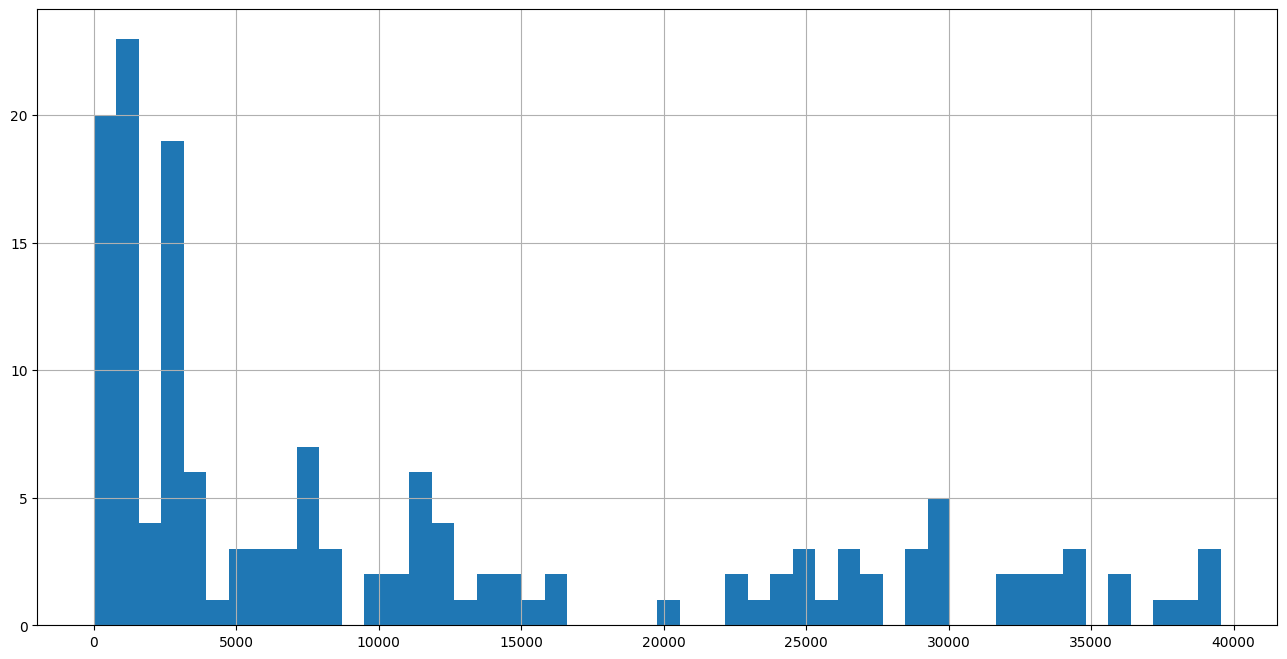

In [ ]:
truncated_num_transactions_per_day_ts.hist(figsize=(16,8), bins=50)

<Axes: ylabel='Density'>

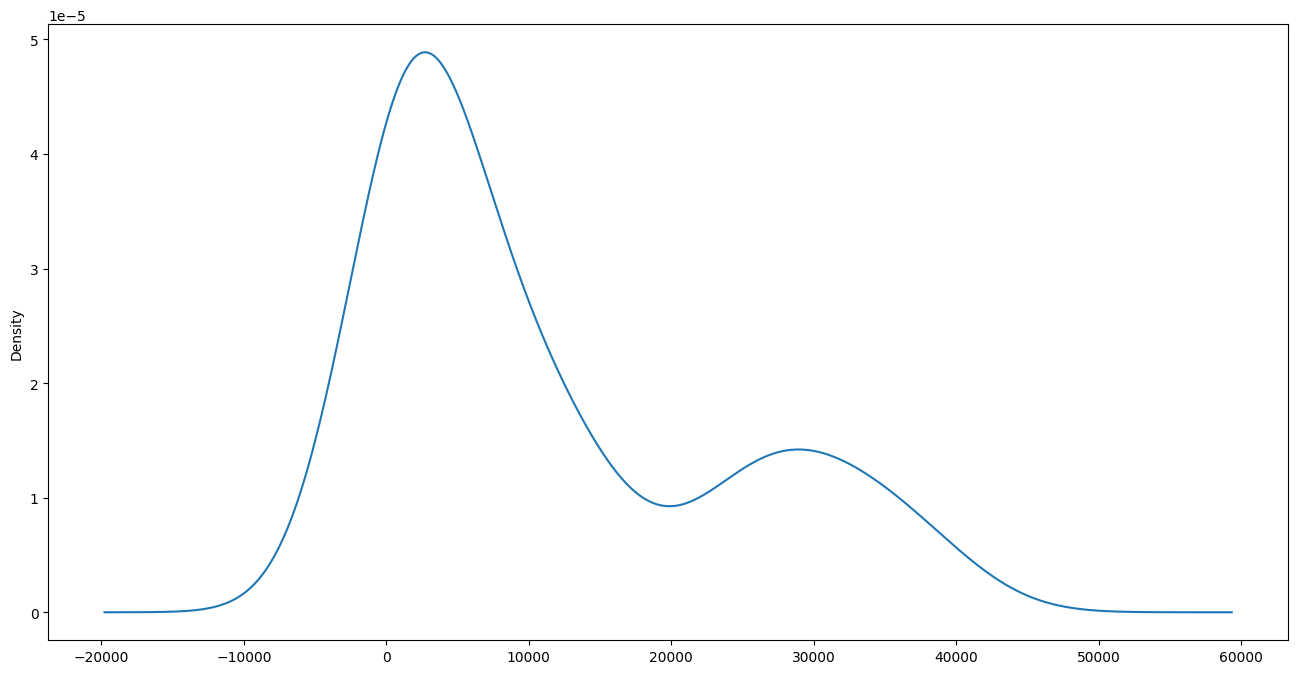

In [ ]:
truncated_num_transactions_per_day_ts.plot.kde(figsize=(16,8))

<Axes: ylabel='Count'>

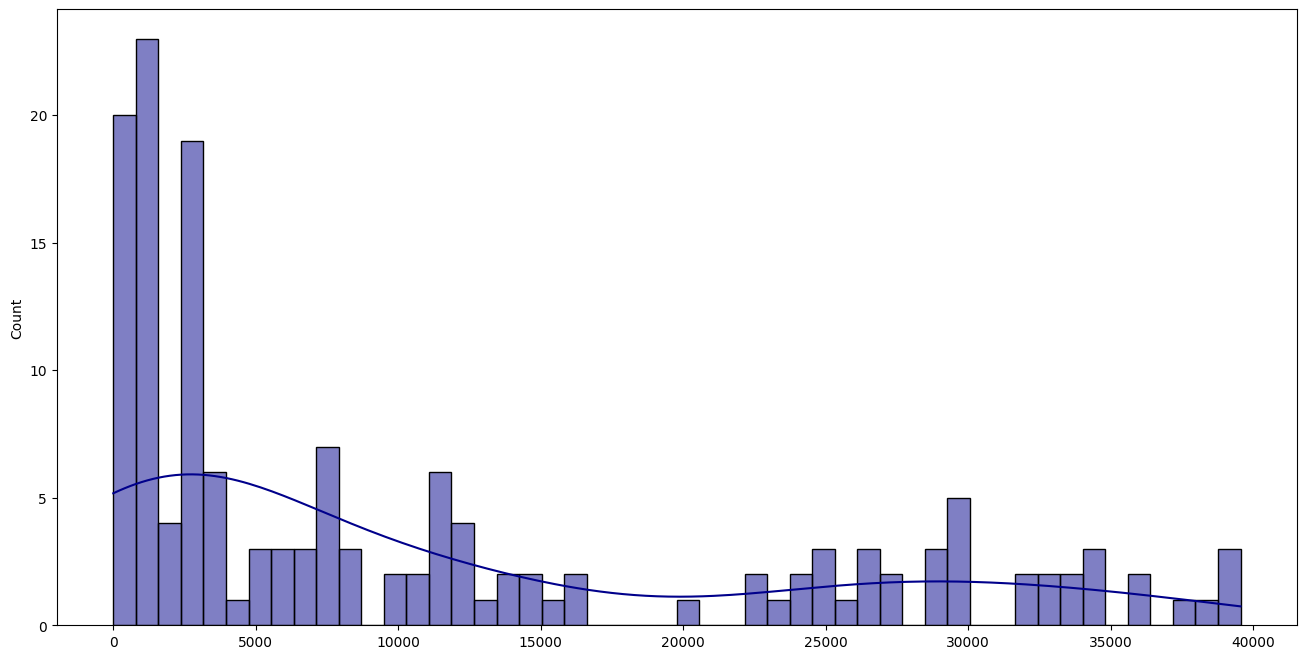

In [ ]:
import seaborn as sns

# plt.figure(figsize=(16,8))

# sns.distplot(truncated_num_transactions_per_day_time_series,
#              kde=True, hist=True,
#              color='darkblue',
#             kde_kws={'linewidth': 4})

plt.figure(figsize=(16,8))

sns.histplot(truncated_num_transactions_per_day_ts,
             kde=True,
             bins=50,
             color='darkblue')

<br>
<font size="+1">
    <ul>
        <li style="color:red"><b>What do we observe?</b></li>
        <br>
        <li>Can we make sense of the trend without the jump?</li>
        <br>
<li>We see a bi-modal distribution, which tells us there is some sort of regime change or structural break in the Uniswap pool facility. <b style="color:blue">What might have caused this?</b></li>
<br>
        <li>To model regime changes, from Two Sigma, using a Gaussian Mixture Modeling technique, see <a href="https://www.twosigma.com/articles/a-machine-learning-approach-to-regime-modeling/">here</a>.</li>
        <br>
        <font color="red"><li>Note, this is done at the Uniswap DEX facility level, not at the individual pool level.</li></font>
        <br>
        <font color="blue"><li>Does the individual pool level tell us a different story, or do we observe this phenomenon in all individual pools?</li></blue>
        <br>
    </ul>
</font>

### Making Our Measure More Granular, i.e. Disaggregated at the Pool Level

In [ ]:
liquidity_actions_swaps.groupby(['BLOCK_SIGNED_AT_DAY', 'token_pairs'])\
 [['EVENT_TYPE_lp','EVENT_TYPE_swaps']]\
 .count().sum(axis=1)\
 .unstack()

token_pairs          DAI_WETH  UNI_WETH  USDC_WETH  WBTC_WETH  WETH_USDT
BLOCK_SIGNED_AT_DAY                                                     
2020-05-06                NaN       NaN        4.0        NaN        NaN
2020-05-07                NaN       NaN        3.0        NaN        NaN
2020-05-08                NaN       NaN        2.0        NaN        NaN
2020-05-09                NaN       NaN        3.0        NaN        NaN
2020-05-11                NaN       NaN        2.0        NaN        NaN
...                       ...       ...        ...        ...        ...
2020-10-17             5055.0    3190.0     4824.0     2522.0     8168.0
2020-10-18             4865.0    3256.0     4971.0     3198.0     7336.0
2020-10-19             5352.0    5938.0     5741.0     2711.0     8917.0
2020-10-20             6305.0    5255.0     7303.0     4413.0    10061.0
2020-10-21             4814.0    2911.0     5535.0     4135.0     7373.0

[168 rows x 5 columns]

In [ ]:
#time-series of number of transactions per day, per individual pool

num_transactions_per_day_per_pool_ts = \
liquidity_actions_swaps.groupby(['BLOCK_SIGNED_AT_DAY', 'token_pairs'])\
 [['EVENT_TYPE_lp','EVENT_TYPE_swaps']]\
 .count().sum(axis=1)\
 .unstack()

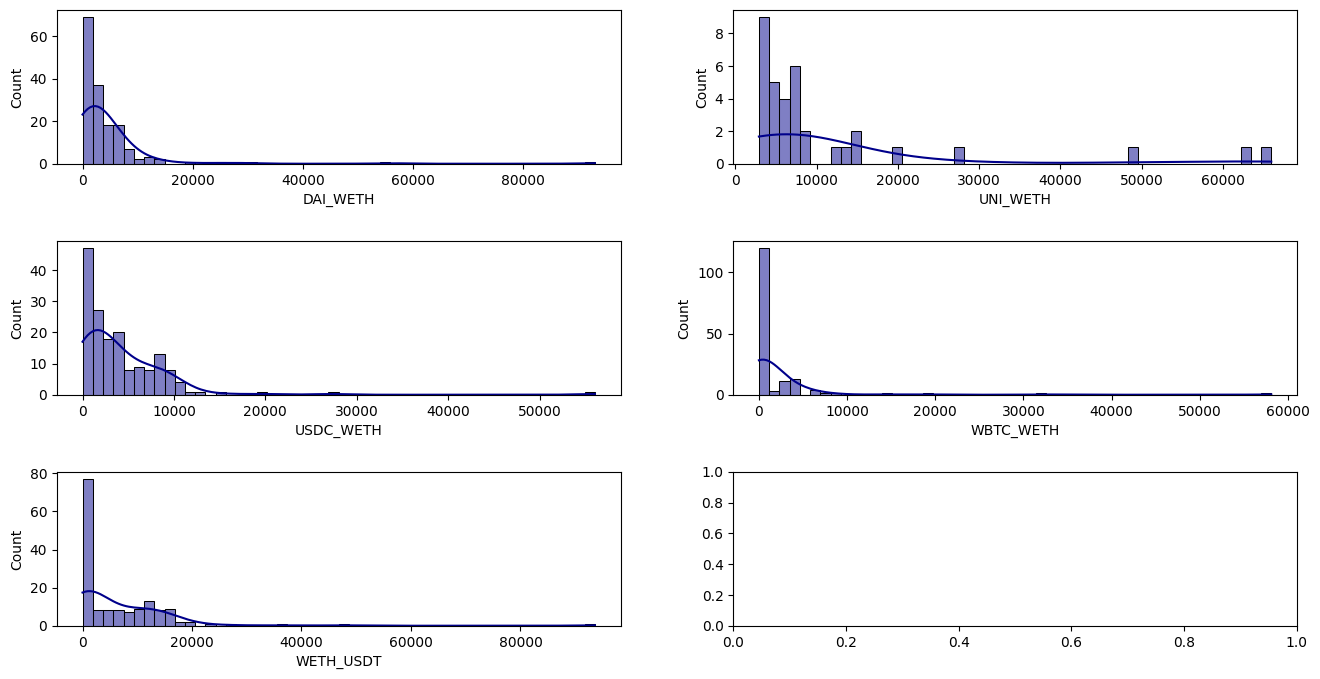

In [ ]:
import seaborn as sns

fig, axs = plt.subplots(3, 2, figsize=(16,8))

plt.subplots_adjust(hspace=0.5)

axs = axs.flatten()

for j in range(num_transactions_per_day_per_pool_ts.shape[1]):
    sns.histplot(num_transactions_per_day_per_pool_ts.iloc[:, j],
                         kde=True, bins=50,
                         color='darkblue',
                         ax = axs[j])

<br>
<font size="+1">
    <ul>
        <li><a href="https://engineeringfordatascience.com/posts/matplotlib_subplots/">For more on plotting subplots in a loop, see here.</a></li>
        <br>
        <li>If we didn't want that empty subplot, we would have to add subplots one at a time, or change the shape of our display.</li>
        <br>
    </ul>
</font>

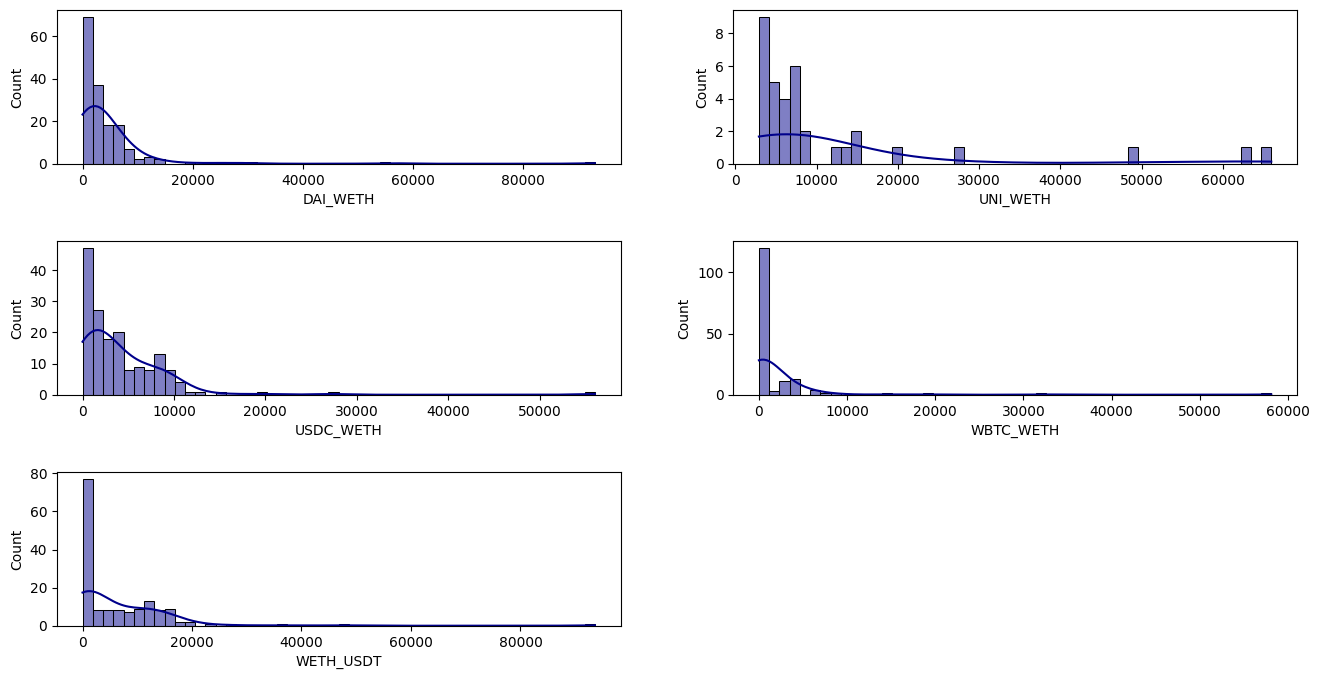

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(16,8))

plt.subplots_adjust(hspace=0.5)

for j in range(num_transactions_per_day_per_pool_ts.shape[1]):

    axs = plt.subplot(3, 2, j+1)

    sns.histplot(num_transactions_per_day_per_pool_ts.iloc[:, j],
                         kde=True, bins=50,
                         color='darkblue',
                         ax = axs)

<br>
<font size="+1">
    <ul>
        <font color="red"><li style="color:red"><b>What do we observe?</b></li></font>
        <br>
        <li>We observe lots of bimodal distributions indicating different regimes of activity, per pool.</li>
        <br>
    </ul>
</font>

<Axes: xlabel='BLOCK_SIGNED_AT_DAY'>

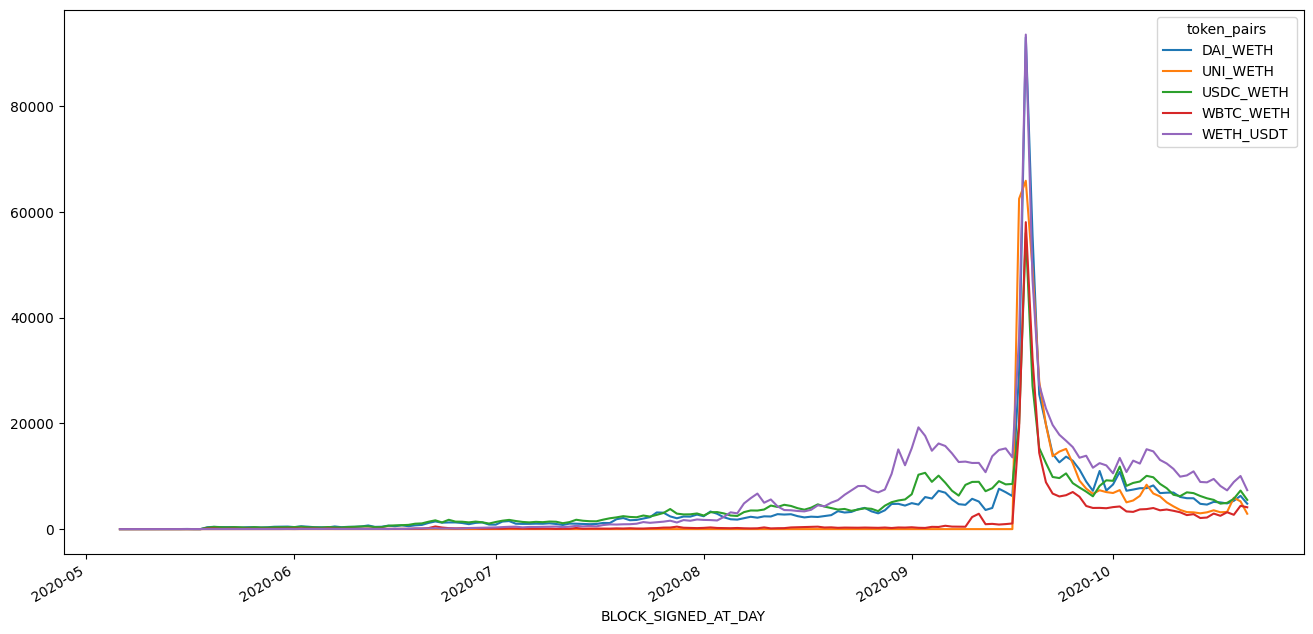

In [ ]:
#time-series of number of transactions per day, per individual pool
num_transactions_per_day_per_pool_ts.fillna(0).plot(figsize=(16,8))

<font size="+1">
    <ul>
        <li><b>Note:</b> The Uniswap coin, UNI, was released on 9/16/2020, with more information <a href="https://uniswap.org/blog/uni/">here</a>.</li>
        <br>
    </ul>
</font>

In [ ]:
histogram_stats(num_transactions_per_day_ts, 'num_transactions_per_day')

min  median      mean            SD      skew  \
num_transactions_per_day    2  7417.0  18773.75  37575.613475  6.145681   

                           kurtosis     max  
num_transactions_per_day  48.827662  366781

In [ ]:
histogram_stats(num_transactions_per_day_per_pool_ts, 'num_block_per_day_per_pool')

min  median          mean            SD      skew   kurtosis  \
token_pairs                                                                    
DAI_WETH        1.0  2337.0   4452.385093   9199.207062  6.999442  59.783888   
UNI_WETH     2911.0  6691.0  12041.914286  15731.731516  2.658852   6.452649   
USDC_WETH       1.0  2790.5   4233.476190   5683.726738  5.200392  42.164470   
WBTC_WETH       1.0   216.0   1803.261146   5727.273499  7.425754  65.300261   
WETH_USDT       3.0  2648.0   6547.134615  10225.328196  4.701562  34.688383   

                 max  
token_pairs           
DAI_WETH     93087.0  
UNI_WETH     65935.0  
USDC_WETH    56058.0  
WBTC_WETH    58096.0  
WETH_USDT    93605.0

array([[<Axes: title={'center': 'DAI_WETH'}>,
        <Axes: title={'center': 'UNI_WETH'}>],
       [<Axes: title={'center': 'USDC_WETH'}>,
        <Axes: title={'center': 'WBTC_WETH'}>],
       [<Axes: title={'center': 'WETH_USDT'}>, <Axes: >]], dtype=object)

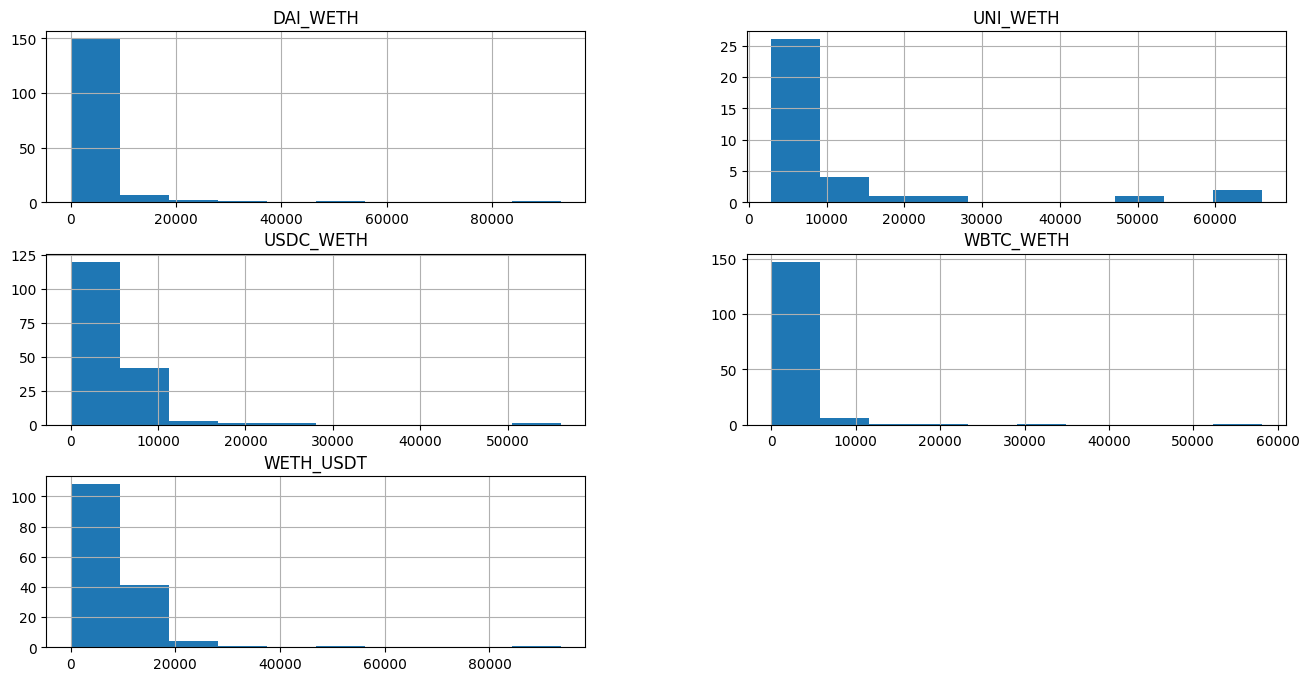

In [ ]:
num_transactions_per_day_per_pool_ts.hist(figsize=(16,8))

array([[<Axes: title={'center': 'DAI_WETH'}>,
        <Axes: title={'center': 'UNI_WETH'}>],
       [<Axes: title={'center': 'USDC_WETH'}>,
        <Axes: title={'center': 'WBTC_WETH'}>],
       [<Axes: title={'center': 'WETH_USDT'}>, <Axes: >]], dtype=object)

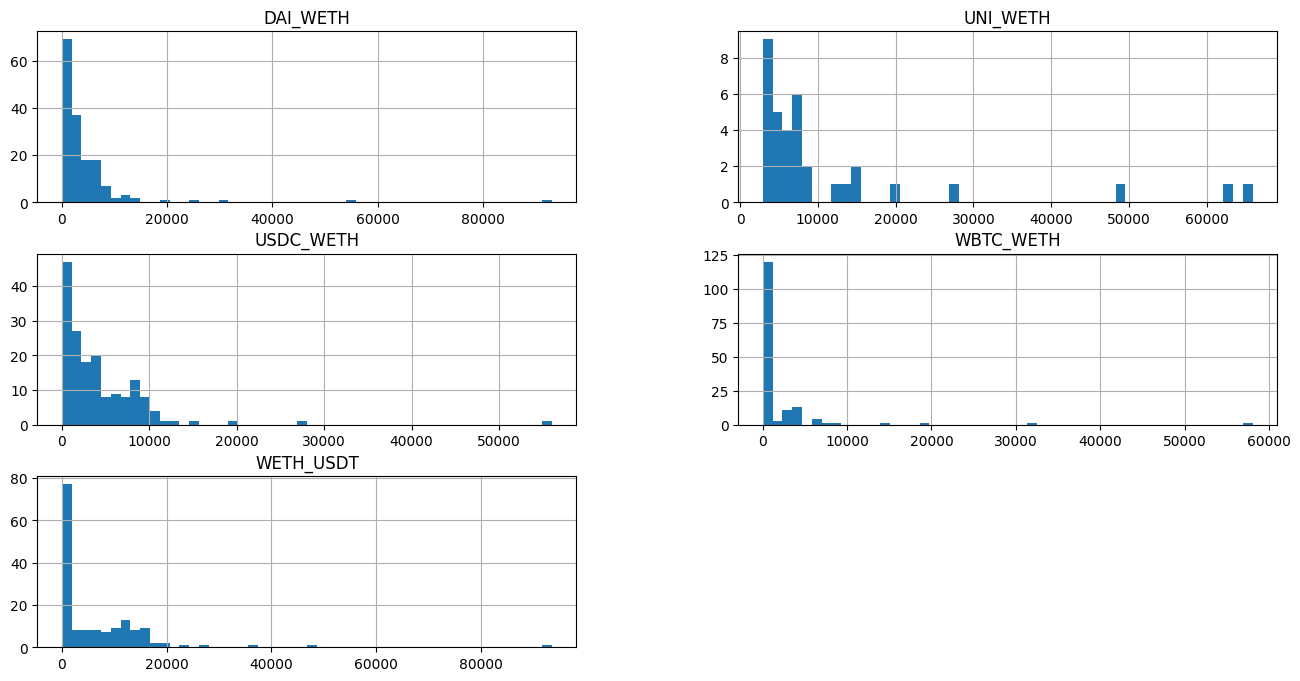

In [ ]:
num_transactions_per_day_per_pool_ts.hist(figsize=(16,8), bins=50)

<Axes: ylabel='Density'>

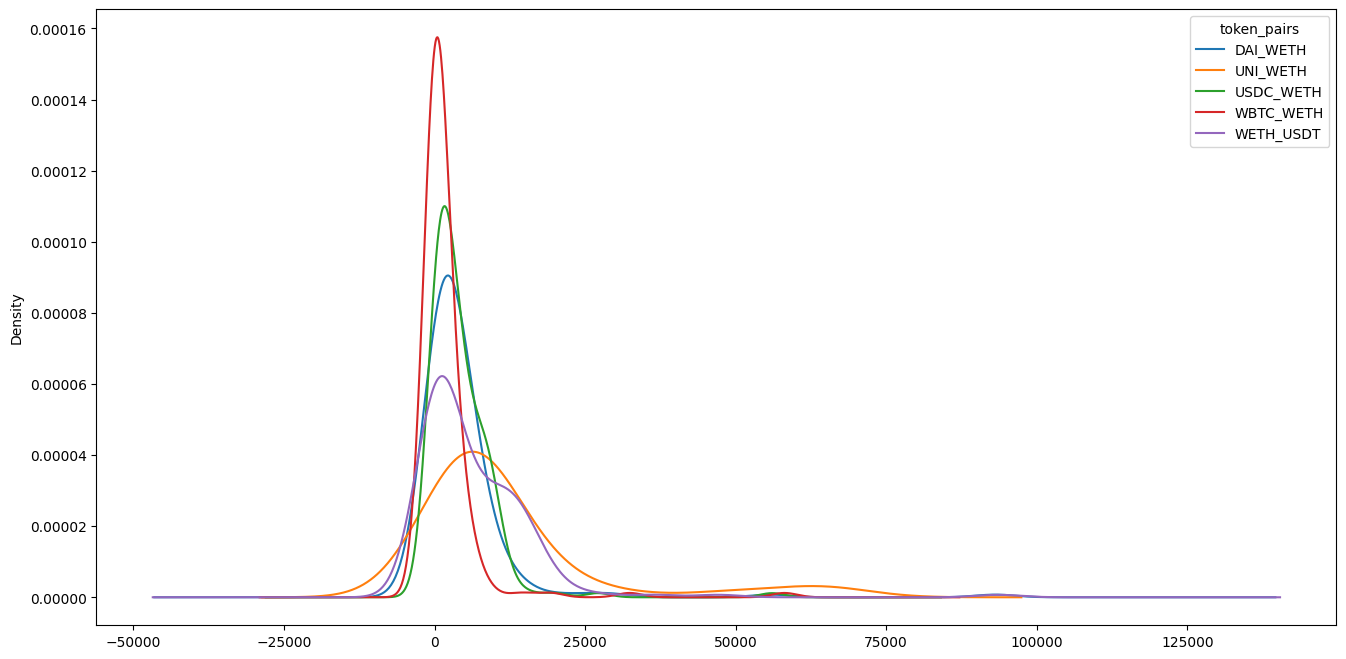

In [ ]:
num_transactions_per_day_per_pool_ts.plot.kde(figsize=(16,8))

<br>
<font size="+1">
    <ul>
        <font color="red"><li style="color:red"><b>What do we observe?</b></li></font>
        <br>
        <li>It looks like the introduction of Uniswap is related to the spikes across all pools.</li>
    <br>
        <li>What causes the bimodal distribution?</li>
    <br>
        <li>What business questions might a product manager at Uniswap care about?</li>
        <br>
    </ul>
</font>


$\rule{800pt}{20pt}$

# Web 3.0
<br>
<font size="+1">
    <ul>
        <li>Web 1.0 (1990 - 2000s) was the era of information distribution; that is, the internet was mostly static web pages where users were reading content, similar to one big Wikipedia all hyperlinked together. </li>
        <br>
        <ul>
            <li>That is, static pages, form fields, and passive content.</li>
            <br>
        </ul>
        <li>Web 2.0 (2000s - present) is the era of e-commerce, targeted advertisements, and users as products. Centralized companies began creating technology on top of the open sourced internet, while collecting user data keep users on their platform, and then sell user data to advertisers. This is the interactive era of the web that paralleled the rise in analytics.</li>
        <br>
        <ul>
            <li>That is, dynamic pages, interactive fields, and user-generated content.</li>
            <br>
        </ul>
        <li>Web 3.0 (present - ?) is the beginning of the era of owning your own content and data, built on blockchain database technology, as well as the ideas associated with decentralization. It is in the extremely nascent stages.</li>
        <br>
        <ul>
            <li>That is, data generated from the previous two generations is returned, monetized, and controlled by the user.</li>
            <br>
            <li>What this future will look like us unclear, but some characteristics are emerging and scaffolding for Web3 technology is being built today.</li>
            <br>
            <li>At this point, no single blockchain system design reigns supreme.</li>
            <br>
        </ul>
    </ul>
</font>

$\rule{800pt}{20pt}$

# What Do The Observations Tell Us and How Are They Related to Web 3.0?
<br>
<font size="+1">
    <ul>
        <li>It turns out the Uniswap coin, UNI, was released on 9/16/2020.</li>
        <br>
        <li>It appears the introduction of Uniswap's own coin UNI is related to the spikes across all markets.</li>
        <br>
        <ul>
            <li>That is, Uniswap releasing their company coin for trading created excess trading activity in the other markets on Uniswap and a jolt in company coin value, as well value to other markets. </li>
            <br>
            <li>It turns out this phenomenon generalizes across many companies related to the Web 3.0 ecosystem, and is a feature rather than a bug.</li>
            <br>
        </ul>
        <li>Full Circle Back to Web 3.0</li>
        <br>
        <ul>
            <li>This observation is representative of a general trend in Web 3.0-based business economics.</li>
            <br>
            <li>A basic premise of Web 3.0 is that every product is simultaneously an investment opportunity.</li>
            <br>
            <li>If you sign up for a Web 3.0-based video game or trading venue, you will receive some of that company's tokens that will allow you to participate in the video game or exchange, as well as the governance of the company.</li>
            <br>
            <li>Users, who also have some form of ownership through the project's tokens, hope the project gains popularity in order to increase the value of the tokens they own.</li>
            <br>
            <li>These governance tokens are rewards to incentivize early adopters, and their release declines over time on a pre-defined schedule. </li>
            <br>
            <li>The number of users tends to dramatically spike upon the initial release of the platform's coin. This is what we observed in the Uniswap data.</li>
            <br>
            <li>People who use the platform a lot on the first week get a lot of governance tokens, people who use it a lot the second week get fewer, people who use it in the sixth month get even fewer, etc.</li>
            <br>
            <li>It’s as if being an early user of Facebook or Uber also automatically made you a shareholder of Facebook or Uber, and when those services got huge you got rich.</li>
            <br>
        </ul>
        <li>Proponents of this structure claim it aligns economic incentives of users and companies and allows users to own their content.</li>
            <br>
            <li>Critics of this structure claim it adds an element of irrational exuberance and Ponzi-type behavior of users.</li>
            <br>
    </ul>
</font>

$\rule{800pt}{20pt}$

$\rule{800pt}{20pt}$

# Linear Regression as a Tool for Descriptive Analytics
<br>
<font size="+1">
    <ul>
        <li>Linear regression: $$Y = \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p + \varepsilon$$ can be used to formally test questions about your data (hypotheses), investigate correlations, determine causal links, etc.</li>
        <br>
        <li>Recall: \begin{cases} H_o: & \beta_i = 0 \\ H_a: & \beta_i \neq 0 \end{cases}</li>
        <br>
        <li>Recall the different tests: z-test, t-test, F-test, $\chi^2$-test, etc.</li>
        <br>
        <li>Commonly, you will need to form a guess (hypothesis) about something in your data.</li>
        <br>
        <ul>
          <li>Usually, it is a relationship between a group of variables, either cross-sectionally, over time, or a combination of the two.</li>
          <br>
          <li>In the case of a bivariate hypothesis, you can test the answers to questions about the relationships of</li>
          <br>
          <ul>
            <li>$(X_i, X_j)$ - cross-sectional</li>
            <br>
            <li>$(X_{t-h}, X_t)$ - time-series</li>
            <br>
            <li>$(X_{i, t-h}, X_{j, t})$ - panel</li>
            <br>
          </ul>
        </ul>
        <font color="red"><li>We will investigate cross-sectional correlation statistics and regressions on data representing the number of transactions per day per pool.</li></font>
        <br>
    </ul>
</font>

$\square$

In [ ]:
#time-series of number of transactions per day, per individual pool

num_transactions_per_day_per_pool_ts = \
liquidity_actions_swaps.groupby(['BLOCK_SIGNED_AT_DAY', 'token_pairs'])\
 [['EVENT_TYPE_lp','EVENT_TYPE_swaps']]\
 .count().sum(axis=1)\
 .unstack()

In [ ]:
# days with NaN value means there was no transaction in that pool on that day

num_transactions_per_day_per_pool_ts.fillna(0, inplace=True)

num_transactions_per_day_per_pool_ts

token_pairs          DAI_WETH  UNI_WETH  USDC_WETH  WBTC_WETH  WETH_USDT
BLOCK_SIGNED_AT_DAY                                                     
2020-05-06                0.0       0.0        4.0        0.0        0.0
2020-05-07                0.0       0.0        3.0        0.0        0.0
2020-05-08                0.0       0.0        2.0        0.0        0.0
2020-05-09                0.0       0.0        3.0        0.0        0.0
2020-05-11                0.0       0.0        2.0        0.0        0.0
...                       ...       ...        ...        ...        ...
2020-10-17             5055.0    3190.0     4824.0     2522.0     8168.0
2020-10-18             4865.0    3256.0     4971.0     3198.0     7336.0
2020-10-19             5352.0    5938.0     5741.0     2711.0     8917.0
2020-10-20             6305.0    5255.0     7303.0     4413.0    10061.0
2020-10-21             4814.0    2911.0     5535.0     4135.0     7373.0

[168 rows x 5 columns]

## Cross-Sectional Correlation

In [ ]:
num_transactions_per_day_per_pool_ts.corr()

token_pairs  DAI_WETH  UNI_WETH  USDC_WETH  WBTC_WETH  WETH_USDT
token_pairs                                                     
DAI_WETH     1.000000  0.910701   0.949204   0.985974   0.941734
UNI_WETH     0.910701  1.000000   0.833003   0.924093   0.837268
USDC_WETH    0.949204  0.833003   1.000000   0.907193   0.984962
WBTC_WETH    0.985974  0.924093   0.907193   1.000000   0.895648
WETH_USDT    0.941734  0.837268   0.984962   0.895648   1.000000

<Axes: xlabel='token_pairs', ylabel='token_pairs'>

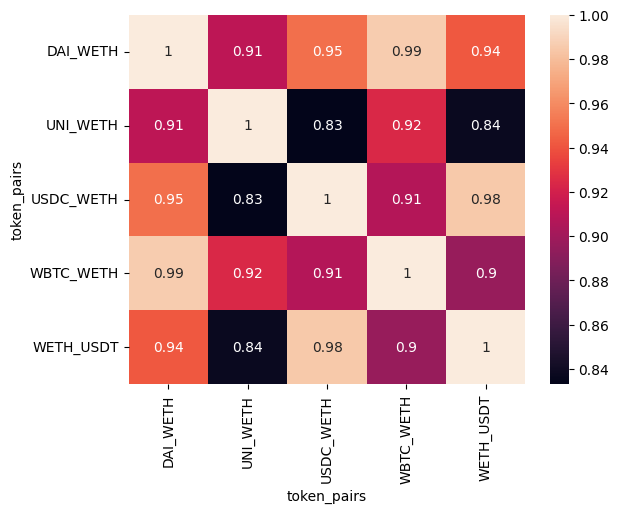

In [ ]:
sns.heatmap(num_transactions_per_day_per_pool_ts.corr(), annot=True)

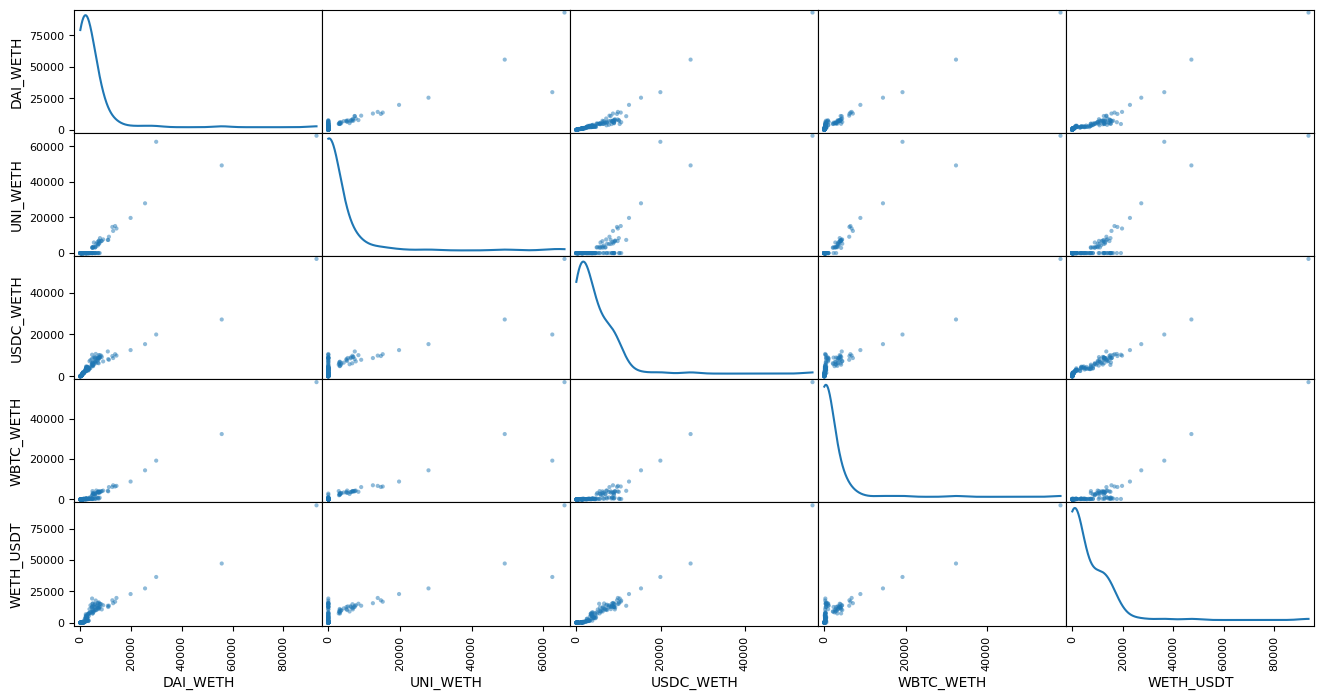

In [ ]:
pd.plotting.scatter_matrix(num_transactions_per_day_per_pool_ts,
                           figsize=(16,8),
                           diagonal='kde');

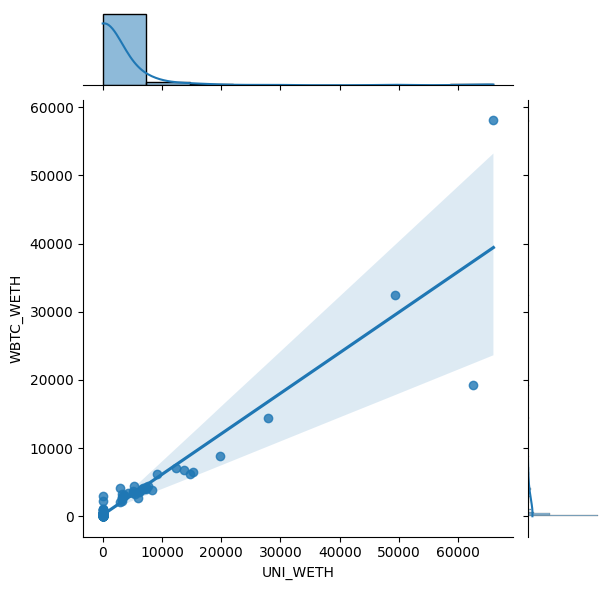

In [ ]:
sns.jointplot(data=num_transactions_per_day_per_pool_ts,
              x='UNI_WETH',
              y='WBTC_WETH',
              kind='reg')

## <a href="https://en.wikipedia.org/wiki/Winsorizing">Winsorization</a>
<br>
<font size="+1">
    <ul>
        <li>Winsorization, named after the biostatistician Charles Winsor from the early 1900s, is a <i>transformation</i> of a sequence of numbers (or a random variable) that limits extreme values in order to <b>reduce the effect of possibly spurious outliers</b>.</li>
        <br>
        <ul>
            <li>The outliers may be spurious if they are caused by chance or confounding, that is, caused by something else or some lurking variable.</li>
            <br>
        </ul>
        <li>Winsorization is equivalent to <i>clipping</i> in signal processing or truncation
            $$\tilde{X} = c_1 \mathbb{1}_{\{X < c_1\}} + X \mathbb{1}_{\{c_1 \leq X \leq c_2\}} + c_2 \mathbb{1}_{\{X > c_2\}}.$$</li>
        <br>
        <li>This is different than dropping, removing, or excluding observations that are abnormally or unexpectedly large.</li>
        <br>
        <li>Mathematically, this can be written as $$\tilde{X}^p = F^{\leftarrow}(p) \mathbb{1}_{\{X < F^{\leftarrow}(p)\}} + X \mathbb{1}_{\{F^{\leftarrow}(p) \leq X \leq F^{\leftarrow}(1-p)\}} + F^{\leftarrow}(1-p) \mathbb{1}_{\{X > F^{\leftarrow}(1-p)\}},$$ where $F^{\leftarrow}$ is the inverse CDF, when it exists, or the <a href="https://en.wikipedia.org/wiki/Quantile_function">quantile function</a>, and $$F^{\leftarrow}(p) := \inf\{y | F(y) \geq p \}.$$
        <li><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html">Scipy's Winsorization implementation</a> doesn't play too well with Pandas objects</li>
        <br>
        <li>Note, we could also construct the function from scratch using the Pandas <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.clip.html">clip</a> method.</li>
        <br>
    </ul>
</font>

$\square$

In [ ]:
num_transactions_per_day_per_pool_ts[['UNI_WETH', 'WBTC_WETH']]

token_pairs          UNI_WETH  WBTC_WETH
BLOCK_SIGNED_AT_DAY                     
2020-05-06                0.0        0.0
2020-05-07                0.0        0.0
2020-05-08                0.0        0.0
2020-05-09                0.0        0.0
2020-05-11                0.0        0.0
...                       ...        ...
2020-10-17             3190.0     2522.0
2020-10-18             3256.0     3198.0
2020-10-19             5938.0     2711.0
2020-10-20             5255.0     4413.0
2020-10-21             2911.0     4135.0

[168 rows x 2 columns]

In [ ]:
from scipy.stats.mstats import winsorize

winsorized_uni_eth = winsorize(num_transactions_per_day_per_pool_ts['UNI_WETH'].values,
                               limits=[0.1, 0.1])


winsorized_btc_eth = winsorize(num_transactions_per_day_per_pool_ts['WBTC_WETH'].values,
                               limits=[0.1, 0.1])


winsorized_num_transactions_per_day_per_pool_ts = pd.DataFrame({'UNI_WETH': winsorized_uni_eth,
                                                                'WBTC_WETH': winsorized_btc_eth})

winsorized_num_transactions_per_day_per_pool_ts

UNI_WETH  WBTC_WETH
0         0.0       47.0
1         0.0       47.0
2         0.0       47.0
3         0.0       47.0
4         0.0       47.0
..        ...        ...
163    3190.0     2522.0
164    3256.0     3198.0
165    5938.0     2711.0
166    5255.0     4006.0
167    2911.0     4006.0

[168 rows x 2 columns]

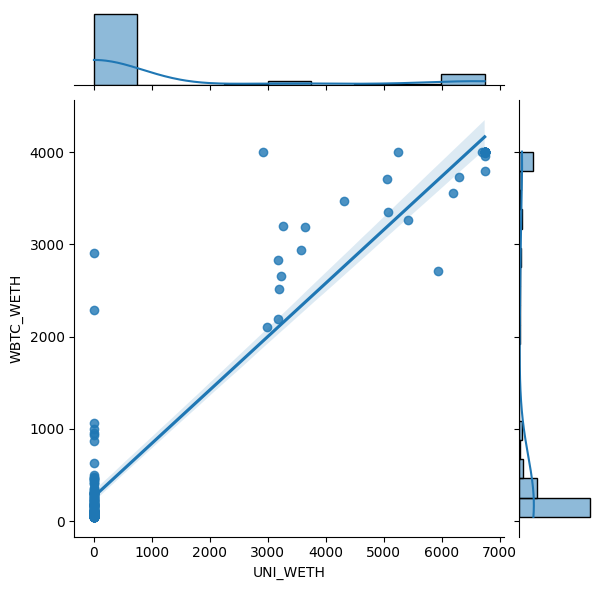

In [ ]:
sns.jointplot(data=winsorized_num_transactions_per_day_per_pool_ts,
              x='UNI_WETH',
              y='WBTC_WETH',
              kind='reg')

In [ ]:
# Winsorize the data at the 2.5 percentile and 97.5 percentile

# lower = 0.025
# upper = 0.975

# num_transactions_per_day_per_pool_ts[['UNI_WETH', 'WBTC_WETH']].apply(lambda x: x.clip(lower=x.quantile(lower), upper=x.quantile(upper)))

## Does one pool's total transactions influence another pool's total transactions?

<br>
<font size="+1">
  <ul>
    <li>Let $X_{i t}$ be the total number of transactions in pool $i$ at time $t$.</li>
    <br>
    <li>We're trying to investigate the question: <font color="blue">Does the total number of transactions of one pool $i$ influence the total number of transactions in another pool $j$?</font></li>
    <br>
    <li>As an example, we will investigate this relationship for the Uniswap-Ethereum and Bitcoin-Ethereum pools.</li>
    <br>
    <li>To formalize this relationship, we will need to use a (contemporaneous) linear regression model.</li>
    <br>
    <font color="red"><li>It will be a good idea to test this realtionship with and without winsorized data in order to see the impact of outliers.</li></font>
    <br>
  </ul>
</font>

$\square$

<br>
<font size="+1">
    <ul>
        <li><a href="https://www.statsmodels.org/stable/index.html">Statsmodels</a> is Python package for conducting traditional statistical tests, estimating regressions, and working with some time series models (though <a href="https://unit8co.github.io/darts/">DARTS</a> might be better for time series).</li>
        <br>
    </ul>
</font>

In [ ]:
import statsmodels.api as sm

### Regression Using Raw Data

In [ ]:
#s m.OLS(y, X)
fitted_reg_model = \
sm.OLS(num_transactions_per_day_per_pool_ts['WBTC_WETH'],
       sm.add_constant(num_transactions_per_day_per_pool_ts['UNI_WETH']))\
.fit()

In [ ]:
print(fitted_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              WBTC_WETH   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     970.6
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           3.01e-71
Time:                        07:19:34   Log-Likelihood:                -1524.8
No. Observations:                 168   AIC:                             3054.
Df Residuals:                     166   BIC:                             3060.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        193.0315    171.078      1.128      0.2

In [ ]:
fitted_reg_model.params

const       193.031526
UNI_WETH      0.594786
dtype: float64

<ipython-input-105-7883342a2e3a>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fitted_reg_model.params[0] +
<ipython-input-105-7883342a2e3a>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fitted_reg_model.params[1]*num_transactions_per_day_per_pool_ts['UNI_WETH'])


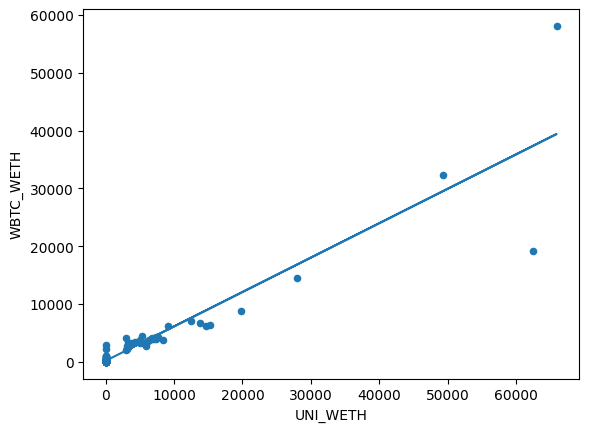

In [ ]:
num_transactions_per_day_per_pool_ts.plot.scatter(x='UNI_WETH', y='WBTC_WETH')

plt.plot(num_transactions_per_day_per_pool_ts['UNI_WETH'],
        fitted_reg_model.params[0] +
         fitted_reg_model.params[1]*num_transactions_per_day_per_pool_ts['UNI_WETH'])

In [ ]:
# num_transactions_per_day_per_pool_ts.plot.scatter(x='UNI_WETH', y='WBTC_WETH')

# plt.plot(num_transactions_per_day_per_pool_ts['UNI_WETH'],
#         fitted_reg_model.params[0] + fitted_reg_model.params[1]*num_transactions_per_day_per_pool_ts['UNI_WETH'],
#          '.')

### Regression Using Winsorized Data

In [ ]:
#s m.OLS(y, X)
fitted_reg_model = \
sm.OLS(winsorized_num_transactions_per_day_per_pool_ts['WBTC_WETH'],
       sm.add_constant(winsorized_num_transactions_per_day_per_pool_ts['UNI_WETH']))\
.fit()

In [ ]:
print(fitted_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              WBTC_WETH   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1908.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           6.16e-93
Time:                        07:19:34   Log-Likelihood:                -1245.4
No. Observations:                 168   AIC:                             2495.
Df Residuals:                     166   BIC:                             2501.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        266.0334     34.686      7.670      0.0

In [ ]:
fitted_reg_model.params

const       266.033443
UNI_WETH      0.578404
dtype: float64

<ipython-input-110-6c1eca136a3d>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fitted_reg_model.params[0] +
<ipython-input-110-6c1eca136a3d>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fitted_reg_model.params[1]*winsorized_num_transactions_per_day_per_pool_ts['UNI_WETH'])


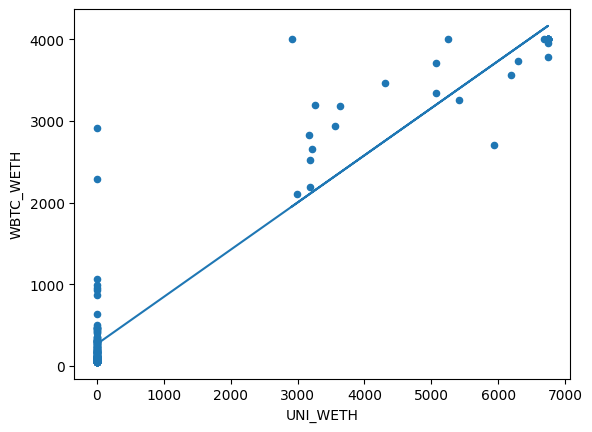

In [ ]:
winsorized_num_transactions_per_day_per_pool_ts.plot.scatter(x='UNI_WETH', y='WBTC_WETH')

plt.plot(winsorized_num_transactions_per_day_per_pool_ts['UNI_WETH'],
        fitted_reg_model.params[0] +
         fitted_reg_model.params[1]*winsorized_num_transactions_per_day_per_pool_ts['UNI_WETH'])

## Creating Lagged Variables
<br>
<font size="+1">
  <ul>
    <li>When we have time series data, we can represent the data as a sequence $\{Y_t\}_{t \geq 1}$.</li>
    <br>
    <li>We frequently want to compare copies of $Y$ with shifted (lagged) values of itself.</li>
    <br>
    <li>In other words, at time $t$ we frequently want to compare the data  $Y_t$ with its lagged values $Y_{t-1}, Y_{t-2}, \dots, Y_{t-h} \ $.</li>
    <br>
    <li>To create these lagged copies of the data, we use the <b>.shift(h)</b> operator.</li>
    <br>
    <li>Let's investigate the total number of transactions occurring in Ether-<a href="https://tether.to/en/transparency/#usdt">Tether</a> (WETH-USDT) market, and create some lagged values of this variable.</li>
    <br>
  </ul>
</font>

$\square$

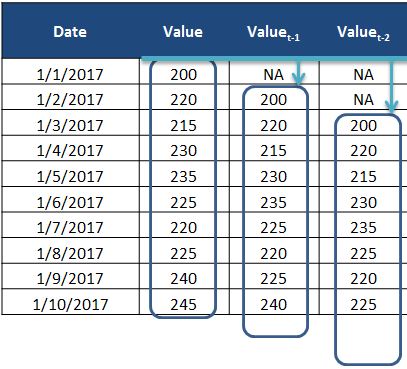

In [ ]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'lagged_data.png'))

In [ ]:
# #time-series of number of transactions per day, per individual pool

num_transactions_per_day_per_pool_ts = \
liquidity_actions_swaps.groupby(['BLOCK_SIGNED_AT_DAY', 'token_pairs'])\
 [['EVENT_TYPE_lp','EVENT_TYPE_swaps']]\
 .count().sum(axis=1)\
 .unstack()

In [ ]:
# slice the time series I care about

eth_usdt_ts = num_transactions_per_day_per_pool_ts['WETH_USDT'].dropna().to_frame()

eth_usdt_ts

WETH_USDT
BLOCK_SIGNED_AT_DAY           
2020-05-19                 3.0
2020-05-20                 4.0
2020-05-21                 4.0
2020-05-22                14.0
2020-05-23                17.0
...                        ...
2020-10-17              8168.0
2020-10-18              7336.0
2020-10-19              8917.0
2020-10-20             10061.0
2020-10-21              7373.0

[156 rows x 1 columns]

In [ ]:
# create 25 days of lags

num_lags = 25

for lag in range(1, num_lags+1):
  eth_usdt_ts[f'WETH_USDT_lag_{lag}d'] = eth_usdt_ts['WETH_USDT'].shift(lag)


eth_usdt_ts.head(20)

WETH_USDT  WETH_USDT_lag_1d  WETH_USDT_lag_2d  \
BLOCK_SIGNED_AT_DAY                                                  
2020-05-19                 3.0               NaN               NaN   
2020-05-20                 4.0               3.0               NaN   
2020-05-21                 4.0               4.0               3.0   
2020-05-22                14.0               4.0               4.0   
2020-05-23                17.0              14.0               4.0   
2020-05-24                19.0              17.0              14.0   
2020-05-25                11.0              19.0              17.0   
2020-05-26                21.0              11.0              19.0   
2020-05-27                12.0              21.0              11.0   
2020-05-28                15.0              12.0              21.0   
2020-05-29                13.0              15.0              12.0   
2020-05-30                13.0              13.0              15.0   
2020-05-31                25.0              13.0              13.0   
2020-06-01                12.0              25.0              13.0   
2020-06-02                33.0              12.0              25.0   
2020-06-03                28.0              33.0              12.0   
2020-06-04                27.0              28.0              33.0   
2020-06-05                29.0              27.0              28.0   
2020-06-06                49.0              29.0              27.0   
2020-06-07                27.0              49.0              29.0   

                     WETH_USDT_lag_3d  WETH_USDT_lag_4d  WETH_USDT_lag_5d  \
BLOCK_SIGNED_AT_DAY                                                         
2020-05-19                        NaN               NaN               NaN   
2020-05-20                        NaN               NaN               NaN   
2020-05-21                        NaN               NaN               NaN   
2020-05-22                        3.0               NaN               NaN   
2020-05-23                        4.0               3.0               NaN   
2020-05-24                        4.0               4.0               3.0   
2020-05-25                       14.0               4.0               4.0   
2020-05-26                       17.0              14.0               4.0   
2020-05-27                       19.0              17.0              14.0   
2020-05-28                       11.0              19.0              17.0   
2020-05-29                       21.0              11.0              19.0   
2020-05-30                       12.0              21.0              11.0   
2020-05-31                       15.0              12.0              21.0   
2020-06-01                       13.0              15.0              12.0   
2020-06-02                       13.0              13.0              15.0   
2020-06-03                       25.0              13.0              13.0   
2020-06-04                       12.0              25.0              13.0   
2020-06-05                       33.0              12.0              25.0   
2020-06-06                       28.0              33.0              12.0   
2020-06-07                       27.0              28.0              33.0   

                     WETH_USDT_lag_6d  WETH_USDT_lag_7d  WETH_USDT_lag_8d  \
BLOCK_SIGNED_AT_DAY                                                         
2020-05-19                        NaN               NaN               NaN   
2020-05-20                        NaN               NaN               NaN   
2020-05-21                        NaN               NaN               NaN   
2020-05-22                        NaN               NaN               NaN   
2020-05-23                        NaN               NaN               NaN   
2020-05-24                        NaN               NaN               NaN   
2020-05-25                        3.0               NaN               NaN   
2020-05-26                        4.0               3.0               NaN   
2020-05-27     

## Time-Series Correlation $\iff$ <a href="https://en.wikipedia.org/wiki/Autocorrelation">Autocorrelation</a>

<br>
<font size="+1">
  <ul>
    <li>Autocorrelation is just the correlation of a variable with its previous values.</li>
    <br>
    <li>For more on the interpretation of autocorrelation plots, see <a href="https://www.alpharithms.com/autocorrelation-time-series-python-432909/">here</a>.</li>
    <br>
    <li>For robustness, we will show a few different ways to compute this function.</li>
    <br>
  </ul>
</font>

$\square$

In [ ]:
eth_usdt_ts

WETH_USDT  WETH_USDT_lag_1d  WETH_USDT_lag_2d  \
BLOCK_SIGNED_AT_DAY                                                  
2020-05-19                 3.0               NaN               NaN   
2020-05-20                 4.0               3.0               NaN   
2020-05-21                 4.0               4.0               3.0   
2020-05-22                14.0               4.0               4.0   
2020-05-23                17.0              14.0               4.0   
...                        ...               ...               ...   
2020-10-17              8168.0            9499.0            8853.0   
2020-10-18              7336.0            8168.0            9499.0   
2020-10-19              8917.0            7336.0            8168.0   
2020-10-20             10061.0            8917.0            7336.0   
2020-10-21              7373.0           10061.0            8917.0   

                     WETH_USDT_lag_3d  WETH_USDT_lag_4d  WETH_USDT_lag_5d  \
BLOCK_SIGNED_AT_DAY                                                         
2020-05-19                        NaN               NaN               NaN   
2020-05-20                        NaN               NaN               NaN   
2020-05-21                        NaN               NaN               NaN   
2020-05-22                        3.0               NaN               NaN   
2020-05-23                        4.0               3.0               NaN   
...                               ...               ...               ...   
2020-10-17                     8930.0           10933.0           10166.0   
2020-10-18                     8853.0            8930.0           10933.0   
2020-10-19                     9499.0            8853.0            8930.0   
2020-10-20                     8168.0            9499.0            8853.0   
2020-10-21                     7336.0            8168.0            9499.0   

                     WETH_USDT_lag_6d  WETH_USDT_lag_7d  WETH_USDT_lag_8d  \
BLOCK_SIGNED_AT_DAY                                                         
2020-05-19                        NaN               NaN               NaN   
2020-05-20                        NaN               NaN               NaN   
2020-05-21                        NaN               NaN               NaN   
2020-05-22                        NaN               NaN               NaN   
2020-05-23                        NaN               NaN               NaN   
...                               ...               ...               ...   
2020-10-17                     9928.0           11410.0           12420.0   
2020-10-18                    10166.0            9928.0           11410.0   
2020-10-19                    10933.0           10166.0            9928.0   
2020-10-20                     8930.0           10933.0           10166.0   
2020-10-21                     8853.0            8930.0           10933.0   

                     WETH_USDT_lag_9d  ...  WETH_USDT_lag_16d  \
BLOCK_SIGNED_AT_DAY                    ...                      
2020-05-19                        NaN  ...                NaN   
2020-05-20                        NaN  ...                NaN   
2020-05-21                        NaN  ...                NaN   
2020-05-22                        NaN  ...                NaN   
2020-05-23                        NaN  ...                NaN   
...                               ...  ...                ...   
2020-10-17                    13100.0  ...            10565.0   
2020-10-18                    12420.0  ...            13474.0   
2020-10-19                    11410.0  ...            10808.0   
2020-10-20                     9928.0  ...            12962.0   
2020-10-21                    10166.0  ...            12404.0   

                     WETH_USDT_lag_17d  WETH_USDT_lag_18d  WETH_USDT_lag_19d  \
BLOCK_SIGNED_AT_DAY                                                            
2020-05-19                         NaN                NaN                NaN   
2020-05-20          

In [ ]:
ts_corr_matrix = eth_usdt_ts[['WETH_USDT'] + [f'WETH_USDT_lag_{lag}d' for lag in range(1,num_lags+1)]].corr()

In [ ]:
ts_corr_matrix.iloc[:,0]

WETH_USDT            1.000000
WETH_USDT_lag_1d     0.797443
WETH_USDT_lag_2d     0.617410
WETH_USDT_lag_3d     0.561485
WETH_USDT_lag_4d     0.528413
WETH_USDT_lag_5d     0.493592
WETH_USDT_lag_6d     0.461156
WETH_USDT_lag_7d     0.447026
WETH_USDT_lag_8d     0.431118
WETH_USDT_lag_9d     0.422497
WETH_USDT_lag_10d    0.411552
WETH_USDT_lag_11d    0.418756
WETH_USDT_lag_12d    0.424578
WETH_USDT_lag_13d    0.421886
WETH_USDT_lag_14d    0.426730
WETH_USDT_lag_15d    0.433190
WETH_USDT_lag_16d    0.444327
WETH_USDT_lag_17d    0.423493
WETH_USDT_lag_18d    0.411139
WETH_USDT_lag_19d    0.403641
WETH_USDT_lag_20d    0.361872
WETH_USDT_lag_21d    0.323238
WETH_USDT_lag_22d    0.296518
WETH_USDT_lag_23d    0.278648
WETH_USDT_lag_24d    0.271983
WETH_USDT_lag_25d    0.264334
Name: WETH_USDT, dtype: float64

In [ ]:
[eth_usdt_ts['WETH_USDT'].autocorr(j) for j in range(0, num_lags+1)]

[0.9999999999999998,
 0.7974428174933721,
 0.617409691578918,
 0.5614849703876955,
 0.5284129546782588,
 0.4935918573454919,
 0.4611558489318397,
 0.44702601338207365,
 0.43111839259142365,
 0.42249674122922837,
 0.4115519978002248,
 0.4187555630283938,
 0.4245776195077258,
 0.42188622350146915,
 0.4267301236028644,
 0.43319029600486697,
 0.4443266517323068,
 0.4234933858033712,
 0.4111392045157854,
 0.4036410103441001,
 0.36187240004757354,
 0.3232380965186962,
 0.29651809518768035,
 0.2786478103195945,
 0.2719833225426376,
 0.26433391202437945]

In [ ]:
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
# Note the following ACF is slightly off from our other ACFs
# sm.tsa.stattools.acf(eth_usdt_ts.loc[:,'WETH_USDT'], nlags=num_lags)
# plt.stem(sm.tsa.stattools.acf(eth_usdt_ts.loc[:,'WETH_USDT'], nlags=num_lags))

'''
The difference between the Pandas and Statsmodels version lie in the mean subtraction and normalization / variance division:

- autocorr does nothing more than passing subseries of the original series to np.corrcoef.
  Inside this method, the sample mean and sample variance of these subseries are used to determine the correlation coefficient

- acf, in contrary, uses the overall series sample mean and sample variance to determine the correlation coefficient.
  The differences may get smaller for longer time series but are quite big for short ones.

To get a precise difference, you must go to the source code and inspect the calculations.
'''
# import numpy as np
# import pandas as pd
# from statsmodels.tsa.stattools import acf
# import matplotlib.pyplot as plt
# plt.style.use("seaborn-colorblind")

# def autocorr_by_hand(x, lag):
#     # Slice the relevant subseries based on the lag
#     y1 = x[:(len(x)-lag)]
#     y2 = x[lag:]
#     # Subtract the subseries means
#     sum_product = np.sum((y1-np.mean(y1))*(y2-np.mean(y2)))
#     # Normalize with the subseries stds
#     return sum_product / ((len(x) - lag) * np.std(y1) * np.std(y2))

# def acf_by_hand(x, lag):
#     # Slice the relevant subseries based on the lag
#     y1 = x[:(len(x)-lag)]
#     y2 = x[lag:]
#     # Subtract the mean of the whole series x to calculate Cov
#     sum_product = np.sum((y1-np.mean(x))*(y2-np.mean(x)))
#     # Normalize with var of whole series
#     return sum_product / ((len(x) - lag) * np.var(x))

# x = np.linspace(0,100,101)

# results = {}
# nlags=10
# results["acf_by_hand"] = [acf_by_hand(x, lag) for lag in range(nlags)]
# results["autocorr_by_hand"] = [autocorr_by_hand(x, lag) for lag in range(nlags)]
# results["autocorr"] = [pd.Series(x).autocorr(lag) for lag in range(nlags)]
# results["acf"] = acf(x, unbiased=True, nlags=nlags-1)

# pd.DataFrame(results).plot(kind="bar", figsize=(10,5), grid=True)
# plt.xlabel("lag")
# plt.ylim([-1.2, 1.2])
# plt.ylabel("value")
# plt.show()
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

'\nThe difference between the Pandas and Statsmodels version lie in the mean subtraction and normalization / variance division:\n\n- autocorr does nothing more than passing subseries of the original series to np.corrcoef.\n  Inside this method, the sample mean and sample variance of these subseries are used to determine the correlation coefficient\n\n- acf, in contrary, uses the overall series sample mean and sample variance to determine the correlation coefficient.\n  The differences may get smaller for longer time series but are quite big for short ones.\n\nTo get a precise difference, you must go to the source code and inspect the calculations.\n'

### Plotting Autocorrelation Functions (ACFs)
<br>
<font size="+1">
  <ul>
    <li>The sample autocovariance function at lag $k$, for $k \geq 0$, of the time series is defined by</li>
    <br>
    <ul>
      <li><img style="display: block;-webkit-user-select: none;margin: auto;background-color: hsl(0, 0%, 90%);transition: background-color 300ms;" src="https://real-statistics.com/wp-content/uploads/2016/03/image020z.png"></li>
      <br>
    </ul>
    <li>The autocorrelation function (ACF) at lag $k$, for $k \geq 0$, of the time series is defined by</li>
    <br>
    <ul>
      <li><img style="display: block;-webkit-user-select: none;margin: auto;background-color: hsl(0, 0%, 90%);transition: background-color 300ms;" src="https://real-statistics.com/wp-content/uploads/2016/03/image021z.png"></li>
      <br>
    </ul>
    <li>The variance of the time series is $s_0$.</li>
    <br>
    <li>A plot of the autocorrelations $r_k$ against the lags $k$ is known as a <a href="https://en.wikipedia.org/wiki/Correlogram">correlogram</a>.</li>
    <br>
  </ul>
</font>

$\square$

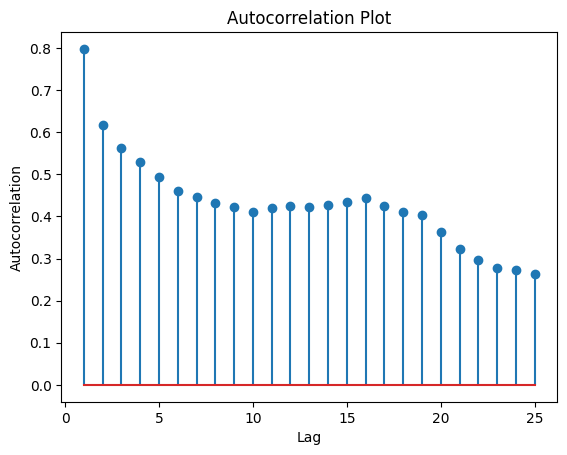

In [ ]:
# Method 1

data = eth_usdt_ts['WETH_USDT']#.dropna()


autocorr = []
for i in range(1, num_lags+1):
    lagged = data.shift(i)
    corr = data.corr(lagged)
    autocorr.append(corr)

plt.stem(range(1,num_lags+1), autocorr)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()

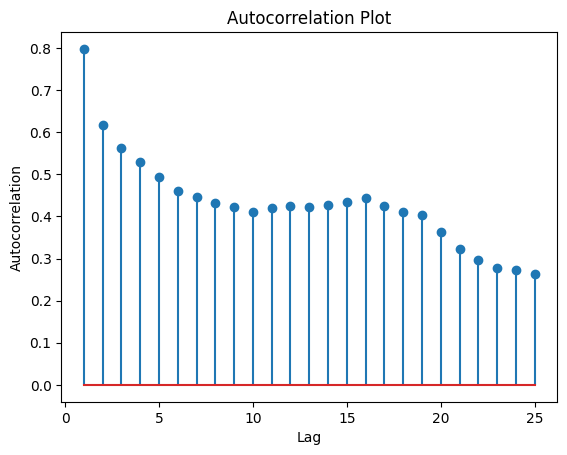

In [ ]:
# Method 2

autocorr = [data.autocorr(i) for i in range(1, num_lags+1)]


plt.stem(range(1,num_lags+1), autocorr)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()

<Axes: title={'center': 'Autocorrelation of Number of Transactions in the Ethereum-Tether Pool'}, xlabel='lags', ylabel='Autocorrelation'>

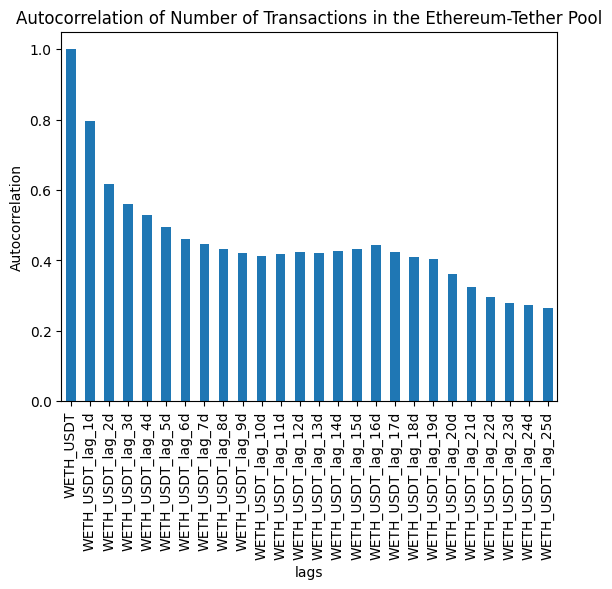

In [ ]:
# Method 1

ts_corr_matrix.iloc[:,0]\
.plot(kind='bar',
      xlabel='lags',
      ylabel='Autocorrelation',
      title='Autocorrelation of Number of Transactions in the Ethereum-Tether Pool')

Text(0.5, 1.0, 'Autocorrelation of Number of Transactions in the Ethereum-Tether Pool')

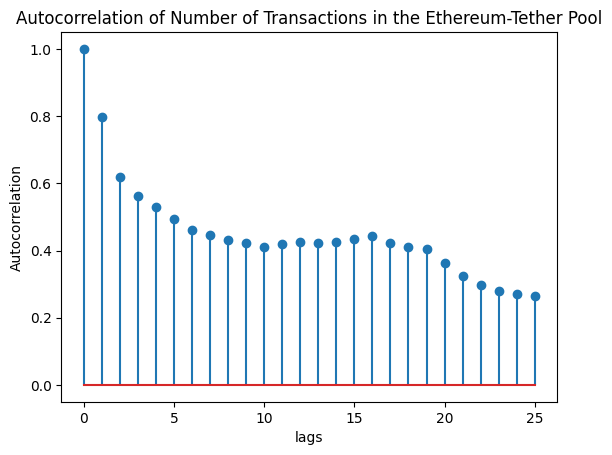

In [ ]:
# Method 1 alternative for a nicer plot

plt.figure()

plt.stem(ts_corr_matrix.iloc[:,0])

plt.xlabel('lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Number of Transactions in the Ethereum-Tether Pool')


(0.0, 1.0)

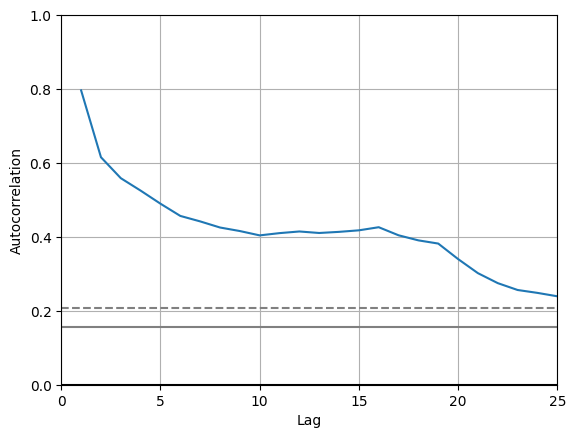

In [ ]:
# Method 2 using a built-in Pandas method

pd.plotting.autocorrelation_plot(eth_usdt_ts.loc[:,'WETH_USDT'])
plt.xlim([0, num_lags])
plt.ylim([0,1])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

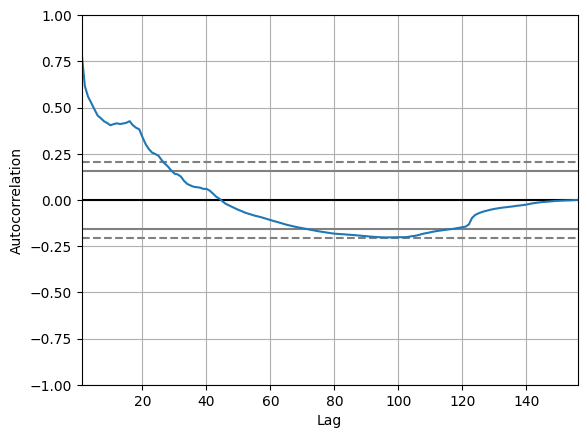

In [ ]:
# Method 2 using a built-in Pandas method

pd.plotting.autocorrelation_plot(eth_usdt_ts.loc[:,'WETH_USDT'])

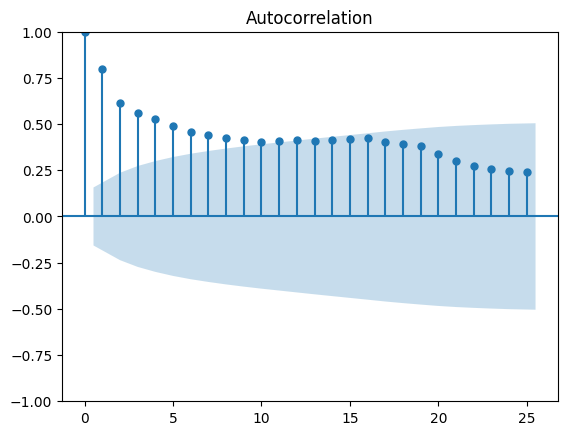

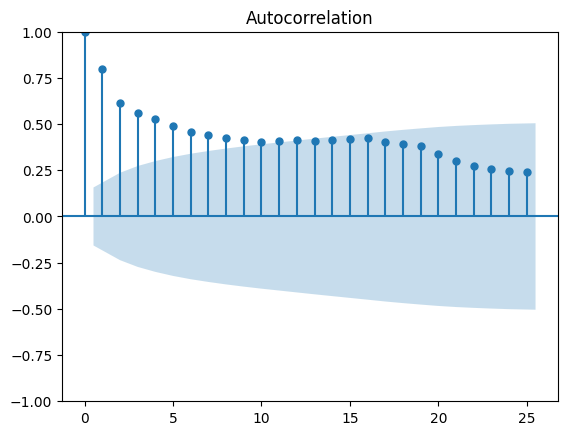

In [ ]:
# Method 3 using a built-in Statsmodels method

sm.graphics.tsa.plot_acf(eth_usdt_ts.loc[:,'WETH_USDT'], lags=num_lags)

## Does one pool's previous total transactions influence its own future total transactions?

<br>
<font size="+1">
  <ul>
    <li>Let $Y_{i t}$ be the total number of transactions in pool $i$ at time $t$.</li>
    <br>
    <li>We're trying to investigate the question: <font color="blue">Does the <b>history</b> of the total number of transactions in a pool $i$ influence its future total number of transactions?</font></li>
    <br>
    <li>As an example, we will investigate this time-series relationship for the Tether-Ethereum pool.</li>
    <br>
    <li>To formalize this relationship, we will need to use a (predictive) linear regression model.</li>
    <br>
    <font color="red"><li>It will be a good idea to test this realtionship with and without winsorized data in order to see the impact of outliers.</li></font>
    <br>
  </ul>
</font>

$\square$

<br>
<font size="+1">
    <ul>
        <li>Again, we will be using <a href="https://www.statsmodels.org/stable/index.html">Statsmodels</a> (recalling <a href="https://unit8co.github.io/darts/">DARTS</a> might be better for time series).</li>
        <br>
    </ul>
</font>

In [ ]:
import statsmodels.api as sm

### Regression Using Lagged Data

<font size="+1">
    <ul>
        <li>Consider the difference between a contemporaneous/explanatory regression and a predictive regression.</li>
        <br>
        <ul>
            <li>
            $
            y_t = a + b X_t +\varepsilon_t
            $
            </li>
            <br>
            <li>
            $
            y_t = a + bX_{t-1} +\varepsilon_t
            $
            </li>
            <br>
        </ul>
        <li>This is subtle, important, and rarely discussed in most statistical trainings.</li>
        <br>
    </ul>
</font>

$\square$

In [ ]:
eth_usdt_ts

WETH_USDT  WETH_USDT_lag_1d  WETH_USDT_lag_2d  \
BLOCK_SIGNED_AT_DAY                                                  
2020-05-19                 3.0               NaN               NaN   
2020-05-20                 4.0               3.0               NaN   
2020-05-21                 4.0               4.0               3.0   
2020-05-22                14.0               4.0               4.0   
2020-05-23                17.0              14.0               4.0   
...                        ...               ...               ...   
2020-10-17              8168.0            9499.0            8853.0   
2020-10-18              7336.0            8168.0            9499.0   
2020-10-19              8917.0            7336.0            8168.0   
2020-10-20             10061.0            8917.0            7336.0   
2020-10-21              7373.0           10061.0            8917.0   

                     WETH_USDT_lag_3d  WETH_USDT_lag_4d  WETH_USDT_lag_5d  \
BLOCK_SIGNED_AT_DAY                                                         
2020-05-19                        NaN               NaN               NaN   
2020-05-20                        NaN               NaN               NaN   
2020-05-21                        NaN               NaN               NaN   
2020-05-22                        3.0               NaN               NaN   
2020-05-23                        4.0               3.0               NaN   
...                               ...               ...               ...   
2020-10-17                     8930.0           10933.0           10166.0   
2020-10-18                     8853.0            8930.0           10933.0   
2020-10-19                     9499.0            8853.0            8930.0   
2020-10-20                     8168.0            9499.0            8853.0   
2020-10-21                     7336.0            8168.0            9499.0   

                     WETH_USDT_lag_6d  WETH_USDT_lag_7d  WETH_USDT_lag_8d  \
BLOCK_SIGNED_AT_DAY                                                         
2020-05-19                        NaN               NaN               NaN   
2020-05-20                        NaN               NaN               NaN   
2020-05-21                        NaN               NaN               NaN   
2020-05-22                        NaN               NaN               NaN   
2020-05-23                        NaN               NaN               NaN   
...                               ...               ...               ...   
2020-10-17                     9928.0           11410.0           12420.0   
2020-10-18                    10166.0            9928.0           11410.0   
2020-10-19                    10933.0           10166.0            9928.0   
2020-10-20                     8930.0           10933.0           10166.0   
2020-10-21                     8853.0            8930.0           10933.0   

                     WETH_USDT_lag_9d  ...  WETH_USDT_lag_16d  \
BLOCK_SIGNED_AT_DAY                    ...                      
2020-05-19                        NaN  ...                NaN   
2020-05-20                        NaN  ...                NaN   
2020-05-21                        NaN  ...                NaN   
2020-05-22                        NaN  ...                NaN   
2020-05-23                        NaN  ...                NaN   
...                               ...  ...                ...   
2020-10-17                    13100.0  ...            10565.0   
2020-10-18                    12420.0  ...            13474.0   
2020-10-19                    11410.0  ...            10808.0   
2020-10-20                     9928.0  ...            12962.0   
2020-10-21                    10166.0  ...            12404.0   

                     WETH_USDT_lag_17d  WETH_USDT_lag_18d  WETH_USDT_lag_19d  \
BLOCK_SIGNED_AT_DAY                                                            
2020-05-19                         NaN                NaN                NaN   
2020-05-20          

In [ ]:
# Drop the nulls from the lagging variables

eth_usdt_ts.dropna(inplace=True)

In [ ]:
# sm.OLS(y, X)
fitted_reg_model = \
sm.OLS(eth_usdt_ts['WETH_USDT'],
       sm.add_constant(eth_usdt_ts[[f'WETH_USDT_lag_{lag}d' for lag in range(1,num_lags+1)]]))\
.fit()

In [ ]:
print(fitted_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              WETH_USDT   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     7.815
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           1.38e-14
Time:                        07:19:39   Log-Likelihood:                -1332.2
No. Observations:                 131   AIC:                             2716.
Df Residuals:                     105   BIC:                             2791.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               988.0757    839.21

In [ ]:
fitted_reg_model.params

const                988.075700
WETH_USDT_lag_1d       0.800792
WETH_USDT_lag_2d      -0.262517
WETH_USDT_lag_3d       0.187561
WETH_USDT_lag_4d      -0.018420
WETH_USDT_lag_5d       0.044875
WETH_USDT_lag_6d      -0.027739
WETH_USDT_lag_7d       0.058576
WETH_USDT_lag_8d      -0.038913
WETH_USDT_lag_9d       0.060962
WETH_USDT_lag_10d     -0.052535
WETH_USDT_lag_11d      0.062475
WETH_USDT_lag_12d      0.005284
WETH_USDT_lag_13d     -0.000764
WETH_USDT_lag_14d      0.044351
WETH_USDT_lag_15d     -0.020102
WETH_USDT_lag_16d      0.106302
WETH_USDT_lag_17d     -0.058370
WETH_USDT_lag_18d      0.035935
WETH_USDT_lag_19d      0.063412
WETH_USDT_lag_20d     -0.067873
WETH_USDT_lag_21d      0.009452
WETH_USDT_lag_22d     -0.017890
WETH_USDT_lag_23d     -0.029604
WETH_USDT_lag_24d      0.024194
WETH_USDT_lag_25d     -0.014861
dtype: float64

<ipython-input-133-7cf2a86aed90>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fitted_reg_model.params[0] +
<ipython-input-133-7cf2a86aed90>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fitted_reg_model.params[1]*eth_usdt_ts['WETH_USDT_lag_1d'])


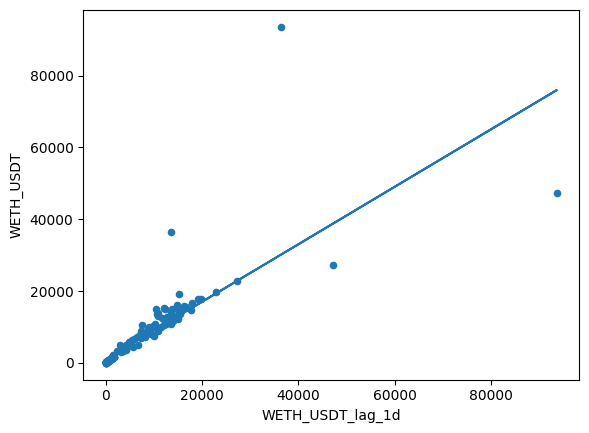

In [ ]:
eth_usdt_ts.plot.scatter(x='WETH_USDT_lag_1d', y='WETH_USDT')

plt.plot(eth_usdt_ts['WETH_USDT_lag_1d'],
        fitted_reg_model.params[0] +
         fitted_reg_model.params[1]*eth_usdt_ts['WETH_USDT_lag_1d'])

In [ ]:
# sm.OLS(y, X)
fitted_reg_model = \
sm.OLS(eth_usdt_ts['WETH_USDT'],
       sm.add_constant(eth_usdt_ts['WETH_USDT_lag_1d']))\
.fit()

In [ ]:
print(fitted_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              WETH_USDT   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     201.7
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           3.79e-28
Time:                        07:19:39   Log-Likelihood:                -1339.4
No. Observations:                 131   AIC:                             2683.
Df Residuals:                     129   BIC:                             2688.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1762.5590    724.615  

In [ ]:
fitted_reg_model.params

const               1762.558992
WETH_USDT_lag_1d       0.779428
dtype: float64

In [ ]:
eth_usdt_ts['WETH_USDT']

BLOCK_SIGNED_AT_DAY
2020-06-13       20.0
2020-06-14       27.0
2020-06-15       19.0
2020-06-16       55.0
2020-06-17       34.0
               ...   
2020-10-17     8168.0
2020-10-18     7336.0
2020-10-19     8917.0
2020-10-20    10061.0
2020-10-21     7373.0
Name: WETH_USDT, Length: 131, dtype: float64

<ipython-input-138-7cf2a86aed90>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fitted_reg_model.params[0] +
<ipython-input-138-7cf2a86aed90>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fitted_reg_model.params[1]*eth_usdt_ts['WETH_USDT_lag_1d'])


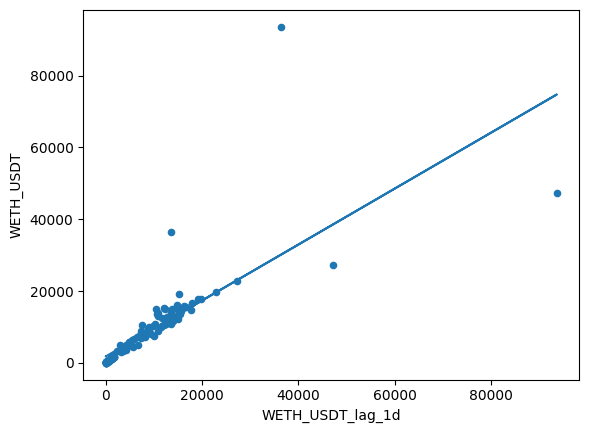

In [ ]:
eth_usdt_ts.plot.scatter(x='WETH_USDT_lag_1d', y='WETH_USDT')

plt.plot(eth_usdt_ts['WETH_USDT_lag_1d'],
        fitted_reg_model.params[0] +
         fitted_reg_model.params[1]*eth_usdt_ts['WETH_USDT_lag_1d'])

$\rule{800pt}{20pt}$

$\rule{800pt}{20pt}$

# Miscellaneous: NOT NECESSARY TO KNOW

## Classical Linear Regression Model</h1>
<br>
<font size="+1">
  <ul>
    <li>Ch 3 of Brooks</li>
    <br>
  </ul>
</font>

$\square$

### What is a Regression Model?
<br>
<font size="+1">
  <ul>
    <li>Regression analysis is one of the most important tools for descriptive analytics.</li>
    <br>
    <li>Regression is used to investigate the joint linearly relationship $$(X_1, \dots, X_p, Y)$$ between a set of independent / regressors / causal / explanatory variables and a dependent / regressand / effect / explained variable.</li>
    <br>
  </ul>
</font>

$\square$

### Regression vs Correlation
<br>
<font size="+1">
  <ul>
    <li>Regression vs Correlation</li>
    <br>
  </ul>
</font>

$\square$

## Classical Linear Regression Model: Assumptions and Diagnostic Tests

Ch 5 of Brooks

## Further Development and Analysis of the Classical Linear Regression Model

Ch 4 of Brooks

## Regression with Time Series Data

Ch 12 of Brooks

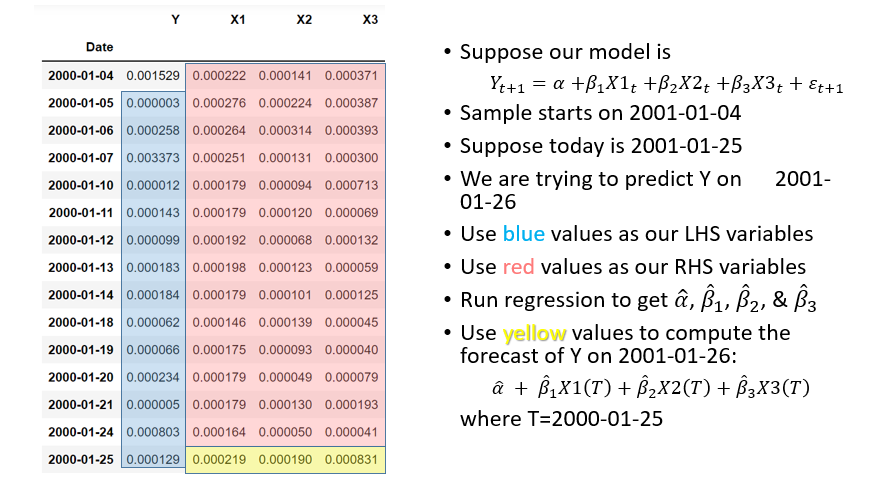

In [ ]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'OOS_backtest.png'))

## <a href="https://en.wikipedia.org/wiki/Winsorizing">Winsorization</a>
<br>
<font size="+1">
    <ul>
        <li>Winsorization, named after the biostatistician Charles Winsor from the early 1900s, is a <i>transformation</i> of a sequence of numbers (or a random variable) that limits extreme values in order to <b>reduce the effect of possibly spurious outliers</b>.</li>
        <br>
        <ul>
            <li>The outliers may be spurious if they are caused by chance or confounding, that is, caused by something else or some lurking variable.</li>
            <br>
        </ul>
        <li>Winsorization is equivalent to <i>clipping</i> in signal processing or truncation
            $$\tilde{X} = c_1 \mathbb{1}_{\{X < c_1\}} + X \mathbb{1}_{\{c_1 \leq X \leq c_2\}} + c_2 \mathbb{1}_{\{X > c_2\}}.$$</li>
        <br>
        <li>This is different than dropping, removing, or excluding observations that are abnormally or unexpectedly large.</li>
        <br>
        <li>Mathematically, this can be written as $$\tilde{X}^p = F^{\leftarrow}(p) \mathbb{1}_{\{X < F^{\leftarrow}(p)\}} + X \mathbb{1}_{\{F^{\leftarrow}(p) \leq X \leq F^{\leftarrow}(1-p)\}} + F^{\leftarrow}(1-p) \mathbb{1}_{\{X > F^{\leftarrow}(1-p)\}},$$ where $F^{\leftarrow}$ is the inverse CDF, when it exists, or the <a href="https://en.wikipedia.org/wiki/Quantile_function">quantile function</a>, and $$F^{\leftarrow}(p) := \inf\{y | F(y) \geq p \}.$$
        <li><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html">Scipy's Winsorization implementation</a> doesn't play too well with Pandas objects</li>
        <br>
        <li>Note, we could also construct the function from scratch using the Pandas <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.clip.html">clip</a> method.</li>
        <br>
        <li>We will do a cross-sectional winsorization at every point in time.</li>
        <br>
    </ul>
</font>

$\square$

In [ ]:
from scipy.stats.mstats import winsorize

# Winsorize the data at 0 if the variable is positive and 97.5 percentile
# data.apply(lambda x: x.clip(lower=0.0, upper=x.quantile(0.975)))

## Average blocks per day
<br>
<font size="+1">
    <ul>
        <li><i>Note:</i> Average blocks per day is an important measure of the rate at which new blocks are being added to the blockchain in question.</li>
        <br>
        <li>The Bitcoin blockchain has a target block rate of every 10 minutes leading to 1440 expected number of blocks being created, per day.</li>
        <br>
        <li>The Ethereum blockchain has a target block rate of every 15 seconds leading to 5760 expected number of blocks being created, per day.</li>
        <br>
    </ul>
</font>


## Thought Organization
<br>
<font size="+1">
    <ul>
        <li>At this point we have made some interesting observations, but the story is scattered! We need a clear objective to investigate, and clear answers, figures, and tables which illustrate our response to the objective.</li>
        <br>
        <li>We need to organize our thoughts, taxonomy of Uniswap and DEX operations, as well as our empirical observations.</li>
        <br>
    </ul>
</font>

## Study of Uniswap Liquidity
<br>
<font size="+1">
Generally, we believe "liquidity" is a desirable property of healthy markets. We are often interested in designing markets that are liquid. To create such a design, we must understand what causes liquidity, and what mechanisms support or encourage liquidity among securities in a market.
<br>
<br>
"Liquidity has been recognized as an important determinant of the efficient working of a market."
<br>
<br>
As a vague concept, one way to think of liquidity is three-fold. An asset can be considered <i>liquid</i> if,
    <br>
<ul>
    <li>it can be traded quickly,</li>
    <br>
    <li>it can be traded in large quantities,</li>
    <br>
    <li>and it can be traded with little impact on the price.</li>
    <br>
</ul>

If we believe this adequately captures the vague notion of liquidity of an asset, then to measure liquidity, we need to accound for three dimensions of the transaciton process:
    <br>
<ul>
    <li>time,</li>
    <br>
    <li>volume,</li>
    <br>
    <li>and price.</li>
    <br>
</ul>

<br>
<br>

"<a href="https://www.jstor.org/stable/1913210?seq=1#metadata_info_tab_contents">Kyle (1985)</a> defines liquidity in terms of:
    <br>
<ul>
    <li>the tightness indicated by
        the bid-ask spread,</li>
    <br>
    <li>the depth corresponding to the amount of one-sided volume
that can be absorbed by the market without inducing a revision of the bid
        and ask quotes,</li>
    <br>
    <li>and resiliency, i.e., the time in which the market returns to its
        equilibrium."</li>
    <br>
</ul>


Furthermore, the multi-dimensionality of the liquidity concept is shown in academic research (both theoretical and empirical), where several strands of the literature can be divided by how one chooses to measure liquidity. These include:
    <br>
<ul>
    <li>measures related to the bid-ask spread,</li>
    <br>
    <li>measures related to the the price impact of volumes,</li>
    <br>
    <li>and the analysis measures related to market depth.</li>
    <br>
</ul>
<br>
<br>
How should we think of this vague notion in the context of decentralized finance applications?
<br>
<br>
For common measures of stock market liquidity, including Amihud liquidity measure and ADV, see <a href="https://breakingdownfinance.com/finance-topics/alternative-investments/amihud-illiquidity-measure/">here</a>.
</font>

### Compute Total Volume Traded
for all the Uniswap pools where we have relevant data.

Note: This question is vague, how can we <i>de-vague</i> this question (make more precise)?



In [ ]:
#what variables/features do we think are relevant?
liquidity_actions_swaps.iloc[0]

BLOCK_HEIGHT                                                            10020001
BLOCK_SIGNED_AT_lp                                     2020-05-07 22:47:25+00:00
EVENT_TYPE_lp                                                               BURN
LOGGED_AMOUNT0                                                          0.003262
LOGGED_AMOUNT1                                                          0.000016
POOL_ADDRESS_lp                       0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc
POOL_DECIMALS_lp                                                            18.0
POOL_NAME_lp                                                          Uniswap V2
POOL_TICKER_SYMBOL_lp                                                     UNI-V2
TOKEN_0_lp                            0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
TOKEN_0_DECIMALS_lp                                                          6.0
TOKEN_0_NAME_lp                                                         USD Coin
TOKEN_0_TICKER_SYMBOL_lp                                                    USDC
TOKEN_1_lp                            0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
TOKEN_1_DECIMALS_lp                                                         18.0
TOKEN_1_NAME_lp                                                    Wrapped Ether
TOKEN_1_TICKER_SYMBOL_lp                                                    WETH
TX_HASH_lp                     0x4113cf142204202124affdbf911b28fcb78ea5bd853e...
BLOCK_SIGNED_AT_DAY_lp                                       2020-05-07 00:00:00
token_pairs_lp                                                         USDC_WETH
ADDRESS_FROM                                                                 NaN
ADDRESS_TO                                                                   NaN
AMOUNT0_IN                                                                   NaN
AMOUNT0_OUT                                                                  NaN
AMOUNT1_IN                                                                   NaN
AMOUNT1_OUT                                                                  NaN
BLOCK_SIGNED_AT_swaps                                                        NaN
EVENT_TYPE_swaps                                                             NaN
POOL_ADDRESS_swaps                                                           NaN
POOL_DECIMALS_swaps                                                          NaN
POOL_NAME_swaps                                                              NaN
POOL_TICKER_SYMBOL_swaps                                                     NaN
TOKEN_0_swaps                                                                NaN
TOKEN_0_DECIMALS_swaps                                                       NaN
TOKEN_0_NAME_swaps                                                           NaN
TOKEN_0_TICKER_SYMBOL_swaps                                                  NaN
TOKEN_1_swaps                                                                NaN
TOKEN_1_DECIMALS_swaps                                                       NaN
TOKEN_1_NAME_swaps                                                           NaN
TOKEN_1_TICKER_SYMBOL_swaps                                                  NaN
TX_HASH_swaps                                                                NaN
BLOCK_SIGNED_AT_DAY_swaps                                                    NaT
token_pairs_swaps                                                            NaN
BLOCK_SIGNED_AT_DAY                                          2020-05-07 00:00:00
event_type                                                                  BURN
token_pairs                                                            USDC_WETH
Name: 0, dtype: object

In [ ]:
#subset the data with the relevant variables
liquidity_actions_swaps.loc[0, ['BLOCK_HEIGHT',
                               'BLOCK_SIGNED_AT_lp',    #BURN, MINT
                               'LOGGED_AMOUNT0',        #BURN, MINT
                               'LOGGED_AMOUNT1',        #BURN_MINT
                               'BLOCK_SIGNED_AT_swaps', #SWAPS
                               'AMOUNT0_IN',            #SWAPS
                               'AMOUNT0_OUT',           #SWAPS
                               'AMOUNT1_IN',            #SWAPS
                               'AMOUNT1_OUT',           #SWAPS
                               'BLOCK_SIGNED_AT_DAY',   #DAY
                               'token_pairs']]          #(TOKEN0, TOKEN1) POOL

BLOCK_HEIGHT                              10020001
BLOCK_SIGNED_AT_lp       2020-05-07 22:47:25+00:00
LOGGED_AMOUNT0                            0.003262
LOGGED_AMOUNT1                            0.000016
BLOCK_SIGNED_AT_swaps                          NaN
AMOUNT0_IN                                     NaN
AMOUNT0_OUT                                    NaN
AMOUNT1_IN                                     NaN
AMOUNT1_OUT                                    NaN
BLOCK_SIGNED_AT_DAY            2020-05-07 00:00:00
token_pairs                              USDC_WETH
Name: 0, dtype: object

In [ ]:
liquidity_actions_swaps.loc[:, ['BLOCK_HEIGHT',
                               'BLOCK_SIGNED_AT_lp',    #BURN, MINT
                               'LOGGED_AMOUNT0',        #BURN, MINT
                               'LOGGED_AMOUNT1',        #BURN_MINT
                               'BLOCK_SIGNED_AT_swaps', #SWAPS
                               'AMOUNT0_IN',            #SWAPS
                               'AMOUNT0_OUT',           #SWAPS
                               'AMOUNT1_IN',            #SWAPS
                               'AMOUNT1_OUT',           #SWAPS
                               'BLOCK_SIGNED_AT_DAY',   #DAY
                               'token_pairs']]          #(TOKEN0, TOKEN1) POOL

## At this point, we might consider renaming the colums for clarity

BLOCK_HEIGHT         BLOCK_SIGNED_AT_lp LOGGED_AMOUNT0  \
0            10020001  2020-05-07 22:47:25+00:00       0.003262   
1            10022981  2020-05-08 09:43:59+00:00       0.014189   
2            10053453  2020-05-13 03:18:50+00:00       0.781284   
3            10060873  2020-05-14 06:48:21+00:00       0.995309   
4            10064415  2020-05-14 19:58:48+00:00       0.010197   
...               ...                        ...            ...   
2297969      11099999                        NaN            NaN   
2297970      11099999                        NaN            NaN   
2297971      11100000                        NaN            NaN   
2297972      11100000                        NaN            NaN   
2297973      11100000                        NaN            NaN   

        LOGGED_AMOUNT1      BLOCK_SIGNED_AT_swaps   AMOUNT0_IN AMOUNT0_OUT  \
0             0.000016                        NaN          NaN         NaN   
1              0.00007                        NaN          NaN         NaN   
2             0.006539  2020-05-13 03:18:50+00:00     0.781284         0.0   
3             0.004114                        NaN          NaN         NaN   
4              0.00005  2020-05-14 19:58:48+00:00     0.010197         0.0   
...                ...                        ...          ...         ...   
2297969            NaN  2020-10-21 21:13:38+00:00   751.977882         0.0   
2297970            NaN  2020-10-21 21:13:38+00:00          0.0      1000.0   
2297971            NaN  2020-10-21 21:13:40+00:00     0.653051         0.0   
2297972            NaN  2020-10-21 21:13:40+00:00  2477.669307         0.0   
2297973            NaN  2020-10-21 21:13:40+00:00     0.460984         0.0   

        AMOUNT1_IN AMOUNT1_OUT BLOCK_SIGNED_AT_DAY token_pairs  
0              NaN         NaN          2020-05-07   USDC_WETH  
1              NaN         NaN          2020-05-08   USDC_WETH  
2              0.0    0.005757          2020-05-13   USDC_WETH  
3              NaN         NaN          2020-05-14   USDC_WETH  
4              0.0     0.00005          2020-05-14    DAI_WETH  
...            ...         ...                 ...         ...  
2297969        0.0    1.951459          2020-10-21   USDC_WETH  
2297970   2.610745         0.0          2020-10-21   USDC_WETH  
2297971        0.0       250.0          2020-10-21   WETH_USDT  
2297972        0.0    6.429781          2020-10-21   USDC_WETH  
2297973        0.0  176.472916          2020-10-21   WETH_USDT  

[2297974 rows x 11 columns]

In [ ]:
#name a new sub-dataframe
liquidity_actions_swaps_sub = liquidity_actions_swaps.loc[:, ['BLOCK_HEIGHT',
                               'BLOCK_SIGNED_AT_lp',    #BURN, MINT
                               'LOGGED_AMOUNT0',        #BURN, MINT
                               'LOGGED_AMOUNT1',        #BURN_MINT
                               'BLOCK_SIGNED_AT_swaps', #SWAPS
                               'AMOUNT0_IN',            #SWAPS
                               'AMOUNT0_OUT',           #SWAPS
                               'AMOUNT1_IN',            #SWAPS
                               'AMOUNT1_OUT',           #SWAPS
                               'BLOCK_SIGNED_AT_DAY',   #DAY
                               'token_pairs']]          #(TOKEN0, TOKEN1) POOL

### How can we define volume for a given transaction?


What are the units of this quantity?

### Are we more interested in "liquidity" per block-height, or per day?

Not sure.

<h2>Compute Percentage Growth of Liquidity</h2>


<h3>What is growth of a variable?</h3>

Let $X$ be some quantity that evolves over time.

Absolute, as opposed to percent or relative, growth is defined $X_t - X_{t-1}$. Dividing this number by the quantity's value at the start of the period $\frac{X_t - X_{t-1}}{X_{t-1}}$ is defined as the relative or percent growth of the quantity $X$. Another common proxy for percent growth is simply $\frac{X_t}{X_{t-1}}$.








<h3>What is liquidity?</h3>

In general, liquidity refers to .....

Specifically in the context of Uniswap smart contracts, liquidity refers to the total amount of reserves in a pool at a given point in time.

What are the units of this quantity?

<h3>How to present the percent growth of liquidity?</h3>

We need to specify a time horizon!

<h2>What Are The Most Liquid Pools?</h2>

For the second


<h2>Clarifying Questions</h2>

<ol>
    <li>Whats the difference between SWAP price and secondary market price?</li>
    <li>Stable coins are Tether and USD, how stable are they actually? Can we compute the price relative to each other, as opposed to Ether?</li>
    <li>How can we deal with outliers of prices?</li>
    <li>Why is amount in slightly larger than amount out? Could this be due to fees?</li>
</ol>


<h2>Computing Prices</h2>
See <a href="https://www.covalenthq.com/docs/learn/casestudies/uniswap-pancake-amm-oracle">here</a>.

We first notice that <i>prices</i> are exchange <i>rates</i>.

For example, if we say 1 gallon of milk costs 4 US dollars, then the exchange rate, or price, for the milk would be $0.25 \frac{milk}{USD}$, where the numerator is what we give up and the denominator is what we receive. So this rate would be from the point of view of the seller of milk. They have to give up one quarter of milk to receive one US dollar. On the other hand, the inverse rate of $4 \frac{USD}{milk}$ is from the point of view of the seller of US dollars. They have to give up four US dollars to receive one full milk.

This rate is what we think of as a <i>price</i>.

We'll call the tuple $(\text{Token } 0, \text{Token } 1)$ a <i>token pair</i>.



<h3> Can we calculate "prices" for every swap transaction?</h3>

Think about ways to collect this information, as well as how to display and convey the information.

Further, consider if we want the daily percentage averaged over time, or the pooled average. This is sometimes an important distinction in time series.



<b>Claim:</b> We need the relative price to compute the model implied theoretical impermanent loss.

<b>Q:</b> How do we get the trading curve?

<b>Q:</b> How do we get secondary market prices at the timestamps in our data sets?



<b>Claim:</b> If no arbitrage, then model implied theoretical IL (opportunity cost calculated from exchange rates in the pool) should equal the observed IL calculated from secondary market prices.

That is,
$$
\text{theoretical IL } \neq \text{ observed IL } \implies  \exists \text{ arbitrage }.
$$



<b>Claim:</b> We need secondary market prices to compute observed impermanent loss.



<h2>Computing Quantities</h2>


<h2>Computing Impermanent Loss</h2>

<b>Impermanent Loss $\iff$ Opportunity Cost</b>

We want to calculate the <i>impermanent</i> loss for a given wallet. For starters, we're only interested in wallets that provide liquidity once for the entire sample so we can calculate a <i>pure</i> impermanent loss. That is, we want to calculate the part of the liquidity providers return that is negative due to the opportunity cost of their investment in the pool.


<ol>
    <li>Find a wallet address that provides liquidity (mints) at the begining of the sample.</li>
    <li>Find the quantities associated with the mint at the beginning of the sample. How much liquidity did the LP provide?</li>
    <li>Find the prices of the coins from the secondary market using the Covalent API.</li>
    <li>Look at the end of the sample pool ownership data set.</li>
    <li>Find the wallet address from step one in the step four data set.</li>
    <li>Find the final quantities the address owns in the pool at the end of the sample.</li>
    <li>Compute the theoretical quantities (amounts) which we get from the trading curve.</li>
</ol>

<b>Warning:</b> Need to ensure the wallet didn't make any swaps, burns, or mints between the beginning and ending of the sample.

<i>This is calculating the drag on the return, that is, the negative part of the return, of a simple "buy and hold" strategy as a liquidity provider.</i>

<b>Q:</b> Does theoretical IL match empirical IL?

<h3>Computing Theoretical Impermanent Loss</h3>

<h3>Computing Empirical Impermanent Loss</h3>

<h2>Computing Returns</h2>

Liquidity providers receive a fee from people that are conducting swaps. There is a 30 bps (0.3%) transfer fee that Uniswap charges to the swapper that is then split among the LPs in that specific pool, based on how much of the pool they're providing.

LPs lose control of the ratio they own between the token and ETH.

<b>Q:</b> Can we calculate the returns of the LPs in the pool?

<b>Q:</b> How can we model the returns of the LPs in the pool?





<h3>Computing Returns of LPs</h3>

<h3>Computing Returns of Arbitrageurs</h3>


<h2>Incomplete - Decentralized Exchanges</h2>
<br>

<h3>Infrastructure</h3>

<h3>Token Listing</h3>

<h3>Custody and Counterparty Risk</h3>

<h3>Exchange Rate</h3>

<h3>Know Your Customer (KYC)</h3>

<h3>Anti Money Laundering (AML)</h3>

<h3>Scalability</h3>

<h2>Incomplete - Application of Blockchain Decentralized Database Technology</h2>
<br>



<h2>Incompmlete - Particular Example of a Business Built On Web 3.0 Ideas</h2>
<br>

<h3>Decentralized Game Development - Forte</h3>
<br>
<font size="+1">
    <ul>
        <li>As innovation continues to thrive in the gaming industry, it is no surprise that the next phase of gaming is being developed in a decentralized fashion where players can become content providers.</li>
        <br>
        <li>In blockchain-enabled games, players can sell anything after they buy, rather than making pure entertainment expenditures, without a secondary market where players can buy or sell.</li>
        <br>
        <li>Forte is an example of a leading start-up company with more than 900 million USD raised to-date focused on </li>
        <br>
        <ul>
            <li>designing a platform that provides solutions and services to game publishers built specifically for blockchain token economies and the exchange of digital and virtual assets,</li>
            <br>
            <li>provides game publishers built-in compliance and security products, ensuring global frameworks for regulated activity including money transmittal, anti-money laundering, tax compliance, and IP protection in order to protect both players and publishers’ businesses and intellectual properties,</li>
            <br>
            <li>enabling game publishers customizability and interoperability with multiple blockchains.</li>
            <br>
            <li>Game publishers start off with Forte to introduce NFTs and other digital assets both inside and outside their core games and apps.</li>
            <br>
            <li>Next, the game publishers shift to long-term business models through revenue streams dependent on in-game economies and player-to-player marketplaces.</li>
            <br>
        </ul>
        <li>Forte makes money by acting as a decentralized market maker.</li>
        <br>
    </ul>
</font>

<br>
<br>

<h3>Decentralized Exchanges for Game Development - Forte</h3>
<br>
<font size="+1">
    <ul>
        <li>A decentralized exchange is an exchange where anyone can create a facility for people to buy and sell on demand (i.e. a market) and provide liquidity to that market for others to buy or sell using the provided liquidity.</li>
        <br>
        <li>This allows markets to get started with fewer frictions than in a centralized exchange, which typically requires stringent and expensive approval processes.</li>
        <br>
        <li>Game developers prefer decentralized exchanges because they provide a solution for anyone to create a new market and provide liquidity to that market, which is typically the developers and early users of the game.</li>
        <br>
        <li>Decentralized exchanges lower the barriers to entry and allow for anyone to participate and grow the game-based markets.</li>
        <br>
    </ul>
</font>

<br>
<br>

<h2>Incomplete - Web3 Economics: Turning Investment Into Revenue</h2>
<br>
<font size="+1">
    <ul>
                <li>The move is to combine (1) Web3 economics (every product is an investment) with (2) the basic trade I have sketched out here (turn investment capital into revenue). Here is how that move might work:</li>
        <br>
        <ul>
            <li>You start a platform business on Web3, crypto, blockchains, etc. It has a “governance token,” which is a little bit like a share of stock but you get to say it’s not a security. You charge a fee of 2\% for people who use the platform.</li>
            <br>
            <li>Holders of the governance token might have some undefined future economic right to those fees. </li>
            <br>
            <li>You give people governance tokens for using your platform. These are rewards to incentivize early adopters, and they decline over time on an explicit schedule: People who use the platform a lot on the first week get a lot of governance tokens, people who use it a lot the second week get fewer, people who use it in the sixth month get even fewer, etc.</li>
            <br>
            <li>There is an exchange of money for tokens, but indirectly. People use your platform, they pay you (in dollars, Ether, etc.) to use the platform, and you pay them (in governance tokens) for using the platform. Also, though, they get to do whatever it is they do on the platform. In theory this could be renting out houses or cars or whatever, though in practice most crypto platform businesses are about trading crypto. Let’s say your business is an exchange for trading non-fungible tokens. People trade NFTs on your platform, they pay you a fee for each trade, and (early on) you give them governance tokens for each trade.</li>
            <br>
            <li>So each early user of the platform is also an investor, and the more they use it the more they are investing.</li>
            <br>
            <li>They can sell the governance tokens freely because all of this stuff is effectively unregulated.</li>
            <br>
            <li>How much are the governance tokens worth? It is hard to say, but they are sort of like shares of stock. Their value is some increasing function of the expected future fee revenues of your platform, plus they have some intangible meme-y value based on how much hype your platform is getting.</li>
            <br>
            <li>The more trading there is on your platform, the more fees you collect and the more successful your business looks, and the more your governance token is worth, both because its expected cash flows are higher and because it gets more hype and attention.</li>
            <br>
            <li>So people rush to your platform to trade as much as possible, which pumps up the value of the governance token, and they cheerfully pay you the 2\% fee to get governance tokens that they can sell at an immediate profit.</li>
            <br>
            <li>These people do not necessarily want the NFTs that are being sold on your platform, so they trade with themselves. They set up two crypto wallets and sell NFTs from one to the other, creating fake volume, “wash trades.” The trades aren’t real, the trades are just (1) an excuse to pay you a 2\% fee on a large notional in exchange for a lot of valuable governance tokens and (2) a way to make your platform look popular so that the governance tokens become valuable and they can sell them at a profit.</li>
            <br>
            <li>And people buy the governance tokens because (1) your platform is popular, (2) it is growing fast, (3) it is making money, and (4) it is getting a lot of hype — exactly the reasons a venture capitalist would have invested in your platform in the Web2 version.</li>
            <br>
            <li>Eventually you stop handing out so many governance tokens (the rewards decline on a set schedule, see Step 3), and people stop doing huge wash trades with themselves to build hype and collect governance tokens.</li>
            <br>
            <li>Maybe then your thing collapses, the early wash traders made a fortune, and the people who bought their governance tokens are holding the bag.</li>
            <br>
            <li>Or maybe not! Maybe all the fake trading created enough hype for your platform to attract real trading, and your platform becomes good and people keep using it even after you stop paying them to use it.</li>
            <br>
            <li>The Web3 version effectively combines the user incentives and the venture capitalist incentives from the Web2 version. Whereas the Web2 version of this trade indirectly takes money from venture capitalists and turns it into revenue, so that you can sell more shares to venture capitalists at a high multiple of revenue, the Web3 version directly takes money from user-investors and turns it into revenue, so that you (and they) can sell more governance tokens to more user-investors at an even higher Web3-hype-driven multiple of revenue. Web3 has refined and perfected this trade, in a way that makes it just about plausibly sustainable.</li>
            <br>
        </ul>
    </ul>
</font>